# Point Colaboratory to Google Drive

Point Colaboratory to that folder. To do so, simply run the following cell and follow the easy procedure shown. 


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



Then modify this second cell according to your folder path, similarly to what we have done.

In [2]:
datapath = '/content/gdrive/My Drive/TESI/' 

# Import

In [3]:
!pip install stop_words

  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32911 sha256=f40ecceda4796a3f6be8e29bf3c3b455a56c92c639f5e3e4b45f0d957ac0345b
  Stored in directory: /root/.cache/pip/wheels/fb/86/b2/277b10b1ce9f73ce15059bf6975d4547cc4ec3feeb651978e9
Successfully built stop-words


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import tqdm.notebook as tq
import time
from operator import itemgetter
import random
import datetime 
from pandas.api.types import is_numeric_dtype # used for one-hot encoding
import math

# Text mining
from stop_words import get_stop_words
from string import punctuation 
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from scipy import sparse
from scipy.sparse import hstack, vstack
from nltk.stem import SnowballStemmer

# Sklearn utilities
# from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import KFold, ParameterGrid
from sklearn.metrics import confusion_matrix

# Sklearn models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Neural Netowrk and Deep Learning
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import Dataset, DataLoader
# import torchvision
# from torchvision import transforms

In [ ]:
# # Check if the GPU is available
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# print(f"Training device: {device}")

# Dataset

### Import the dataset

In [5]:
# dataset_path = datapath + 'detworkaudit.csv'
dataset_path = datapath + 'dataset/data-1618311055681.csv'

data = pd.read_csv(dataset_path)

In [ ]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [ ]:
print("Shape of the dataset: {}".format(data.shape))

Shape of the dataset: (26950, 23)


Change name of the variables - not necessary

In [ ]:
# data.columns =['id', 'umid', 'resid', 'jobid', 'jobtaskdt', 'pay', 'workdesk', 
#                'qty', 'jobtaskid', 'note', 'fig_trasferta', 'data_ins', 
#                'description', 'app_ins', 'flg_prepagato', 'custid', 
#                'flg_straordinario', 'flg_status', 'jobregistered', 'nr_fattura',
#                'sede', 'tipo_update', 'changed_on', 'boo2', 'boo3']

In [ ]:
# data.head()

In [ ]:
data_original = data.copy() # backup

# Formatting problems - SOLVED

In this section, I will solve some formatting issues related to the dataset.

In [ ]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
# data["id"] = pd.to_numeric(data["id"])

Problem: some numeric columns are not recognized as such since they present also some strings (probably due to some formatting errors when downloading from the database). 

In [ ]:
# data = data_original.copy() # backup

#### Empty rows - No 

Firstly, find empy rows and remove them

In [ ]:
empty_rows = pd.isnull(data.id)
empty_rows = empty_rows[empty_rows == True].index.tolist()
print(f'Empty rows: {len(empty_rows)}')
print(empty_rows)

Empty rows: 0
[]


In [ ]:
# Check
# data.iloc[empty_rows]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on


In [ ]:
# Remove these rows
# data = data.drop(empty_rows)

In [ ]:
# data.index = list(range(data.shape[0]))

#### Splitted rows - NO

Cerco le righe che sono state divise, guardando quelle che hanno una stringa nella prima colonna (che invece dovrebbe essere un id)

In [ ]:
def isnumeric(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [ ]:
splitted_rows = pd.Series([isnumeric(s) for s in data.id]) == False

In [ ]:
sum(splitted_rows == True)

0

In [ ]:
splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
print(splitted_rows)

[]


In [ ]:
# previous_rows = [s-1 for s in splitted_rows]
# print(previous_rows)

In [ ]:
# splitted_rows = splitted_rows + previous_rows
# splitted_rows = list(set(splitted_rows))
# splitted_rows = sorted(splitted_rows)

In [ ]:
print(splitted_rows)

[]


In [ ]:
# data.iloc[splitted_rows]

Option 1: discard the rows that have been split

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# pd.to_numeric(data.id)

0        3126743
1        3127136
2        3127163
3        3128181
4        3129009
          ...   
18686    3175577
18687    3175571
18688    3175398
18689    3175401
18690    3177481
Name: id, Length: 18691, dtype: int64

In [ ]:
# data["id"] = pd.to_numeric(data["id"])

In [ ]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
# data.head()

#### Other columns - OK

In [ ]:
numerical_columns = ['id', 'umid', 'resid', 'jobid', 'qty', 'jobtaskid', 'custid', 'sede']

In [ ]:
# data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)

In [ ]:
# data.iloc[[4936, 4937]]

In [ ]:
for nc in numerical_columns:
    splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
    print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

The variable id         has   0 values that are not numerical
The variable umid       has   0 values that are not numerical
The variable resid      has   0 values that are not numerical
The variable jobid      has   0 values that are not numerical
The variable qty        has   0 values that are not numerical
The variable jobtaskid  has   0 values that are not numerical
The variable custid     has   0 values that are not numerical
The variable sede       has   0 values that are not numerical


In [ ]:
# splitted_rows = pd.Series([isnumeric(s) for s in data['qty']]) == False

# splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
# print(splitted_rows)

# data.iloc[splitted_rows]

Guardando al dataset, queste righe sono problematiche già da subito: l'errata formattazione è dovuta probabilmente ad una descrizione troppo lunga 

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# for nc in numerical_columns:
#     splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
#     print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

In [ ]:
# splitted_rows = pd.Series([isnumeric(s) for s in data['custid']]) == False

# splitted_rows = splitted_rows[splitted_rows == True].index.tolist()
# print(splitted_rows)

# data.iloc[splitted_rows]

In [ ]:
# data = data.drop(splitted_rows)
# data.index = list(range(data.shape[0]))

In [ ]:
# for nc in numerical_columns:
#     splitted_rows = pd.Series([isnumeric(s) for s in data[nc]]) == False
#     print(f'The variable {nc:10} has {sum(splitted_rows == True):3} values that are not numerical')

In [ ]:
# data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric)

In [ ]:
data.describe()

,id,umid,resid,jobid,qty,jobtaskid,description,custid,sede
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950.000000,26950.000000,0.0,26950.000000,26942.000000
mean,3.158345e+06,16.0,889.308534,1702.88167,4.109388,13793.881224,NaN,4475.111058,4.896073
std,2.225893e+04,0.0,546.618186,1398.45422,2.971256,10670.047203,NaN,5095.886078,1.854603
min,3.018276e+06,16.0,291.000000,4.00000,0.500000,5.000000,NaN,9.000000,0.000000
25%,3.142161e+06,16.0,342.000000,87.00000,1.000000,656.000000,NaN,59.000000,3.000000
50%,3.160078e+06,16.0,384.000000,2750.00000,4.000000,22026.000000,NaN,4187.000000,6.000000
75%,3.179054e+06,16.0,1441.000000,3000.00000,8.000000,22353.000000,NaN,4466.000000,6.000000
max,3.187953e+06,16.0,1477.000000,3295.00000,12.000000,22893.000000,NaN,21250.000000,9.000000


In [ ]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [ ]:
# check
data.qty.value_counts()

8.0     7944
1.0     4287
0.5     3108
4.0     2816
2.0     2734
1.5     1240
3.0     1221
6.0     1067
7.0      544
2.5      507
5.0      491
3.5      309
5.5      179
4.5      178
6.5      163
7.5      150
9.0        6
10.0       3
12.0       1
9.5        1
10.5       1
Name: qty, dtype: int64

In [ ]:
# check 
data.flg_trasferta.value_counts()

False    25883
True      1067
Name: flg_trasferta, dtype: int64

In [ ]:
list(data_original[data_original.id==3144193]['workdesc'])

['Sviluppo workflow User Profiles Definitions: supporto per gestione conflitti, completato validation implementation, fix feedback per codemap lenti; rimosso vecchio "conflict", creato e definito CO KUBIX']

In [ ]:
list(data_original[data_original.id==3160008]['note'])

['in sostituzione a rapportino di scarabelli con la seguente descrizione:\n"QLIK SENSE PREPARAZIONE REPORT CON LISTA LICENZE, ACCOUNT E APP UTILIZZATE"']

Se vado su pdAdmin e faccio la query

`select * from bot.detwork_audit where id = 3144193;`

sul campo workdesk trovo: 

Sviluppo workflow User Profiles Definitions: supporto per gestione conflitti, completato validation implementation, fix feedback per codemap lenti; rimosso vecchio "conflict", creato e definito CO KUBIX

e viene splittato dopo conflict",

Altro esempio di split è

`select * from bot.detwork_audit where id = 3160008;`

in sostituzione a rapportino di scarabelli con la seguente descrizione:
"QLIK SENSE PREPARAZIONE REPORT CON LISTA LICENZE, ACCOUNT E APP UTILIZZATE"

e viene splittato dopo LICENZE,

Quindi non è chiaro il criterio per cui ciò avviene...

CON IL NUOVO DATASET E' TUTTO OK

# Missing values

In [ ]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288


In [ ]:
data.describe(include='all')

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
count,2.695000e+04,26950.0,26950.000000,26950.00000,26950,26950,26950,26950.000000,26950.000000,4066,26950,26950,0.0,26950,26950,26950.000000,26950,26950,26950,17,26942.000000,26950,26950
unique,NaN,NaN,NaN,NaN,400,2,17650,NaN,NaN,2561,2,23389,NaN,1,2,NaN,2,2,2,9,NaN,2,10302
top,NaN,NaN,NaN,NaN,2021-03-26,False,.,NaN,NaN,.,False,2020-11-28 07:53:23.697,NaN,WEB,False,NaN,False,I,False,FVE20-0664,NaN,approvato,2021-01-11 15:01:22.008019
freq,NaN,NaN,NaN,NaN,224,24540,470,NaN,NaN,296,25883,5,NaN,26950,15684,NaN,26038,24850,26908,6,NaN,22702,832
mean,3.158345e+06,16.0,889.308534,1702.88167,NaN,NaN,NaN,4.109388,13793.881224,NaN,NaN,NaN,NaN,NaN,NaN,4475.111058,NaN,NaN,NaN,NaN,4.896073,NaN,NaN
std,2.225893e+04,0.0,546.618186,1398.45422,NaN,NaN,NaN,2.971256,10670.047203,NaN,NaN,NaN,NaN,NaN,NaN,5095.886078,NaN,NaN,NaN,NaN,1.854603,NaN,NaN
min,3.018276e+06,16.0,291.000000,4.00000,NaN,NaN,NaN,0.500000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.142161e+06,16.0,342.000000,87.00000,NaN,NaN,NaN,1.000000,656.000000,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,3.160078e+06,16.0,384.000000,2750.00000,NaN,NaN,NaN,4.000000,22026.000000,NaN,NaN,NaN,NaN,NaN,NaN,4187.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN
75%,3.179054e+06,16.0,1441.000000,3000.00000,NaN,NaN,NaN,8.000000,22353.000000,NaN,NaN,NaN,NaN,NaN,NaN,4466.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN


In [ ]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 26950

MISSING VALUES PER VARIABLE:



id                       0
umid                     0
resid                    0
jobid                    0
jobtaskdt                0
pay                      0
workdesc                 0
qty                      0
jobtaskid                0
note                 22884
flg_trasferta            0
data_ins                 0
description          26950
app_ins                  0
flg_prepagato            0
custid                   0
flg_straordinario        0
flg_status               0
jobregistered            0
nr_fattura           26933
sede                     8
tipo_update              0
changed_on               0
dtype: int64

### Merge note with workdesc

Let's check the variable note

In [ ]:
for i, n in enumerate(data.note[~data.note.isnull()]):
    print(n)

Output streaming troncato alle ultime 5000 righe.
17:45 - 18:15
06:10 - 08:40
05:15 - 05:45
00:20 - 00:50
23:45 - 00:15
21:55 - 22:25
13:45 - 14:45
dalle 18 alle 18.30
Chiamata alle 1.50,fine attività ore 2.16
Chiamata ore 22.57,fine attività ore 00.06
23:10 - 00:10
Inizio ore 19.00,fine ore 20.00
00:50 - 01:20
19:40 - 20:10
Dalle ore 05:30
05:10 - 05:40
04:40 - 05:10
20:45 - 21:15
Attività dalle 18 alle 18.30
SDCS-3378
SDCS-3379
SDCS-3380
SDCS-3354
Presidio VAM, Monitoraggio Foreste
Presidio VAM, Monitoraggio Foreste
SDCS-3300
.
.
.
.
,
.
.
.
.
.
.
.
.
.
.
.
* Fissati 2 appuntamenti con ns CSO (SCHENK ITALIAN WINERIES e TINAZZI)
.
.
.
.
.
.
.
.
.
.
*Fissati due videomeet di presentazione (LUALDI PORTE e CANTINA DI SOAVE)
.
.
Problemi con connessione Internet a casa, dunque il resto della giornata lavoro in sede a Thiene.
.
.
.
.
.
.
.
.
.
*Nuovo Lead interessato (LUALDI S.P.A.) - meeting in corso di schedulazione
.
.
*Fissato videomeeting di presentazione Miriade con MCZ GROUP S.P.A.


Sometimes the resource writes something like: "non sono sicuro della commessa", "commessa da cambiare"... So it could be informative 

In [ ]:
data.note[~data.note.isnull()]

0                                        prima gg gratuita
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128                                      Controllo dei log
                               ...                        
26924    Federica N mi ha detto di mettere l'attività i...
26938                   Formazione affiancamento SQLServer
26939                   - Sophos Central device encryption
26942                        Studio individuale SQL Server
26943    m.zamboni\nConfigurazione account gmail sul pc...
Name: note, Length: 4066, dtype: object

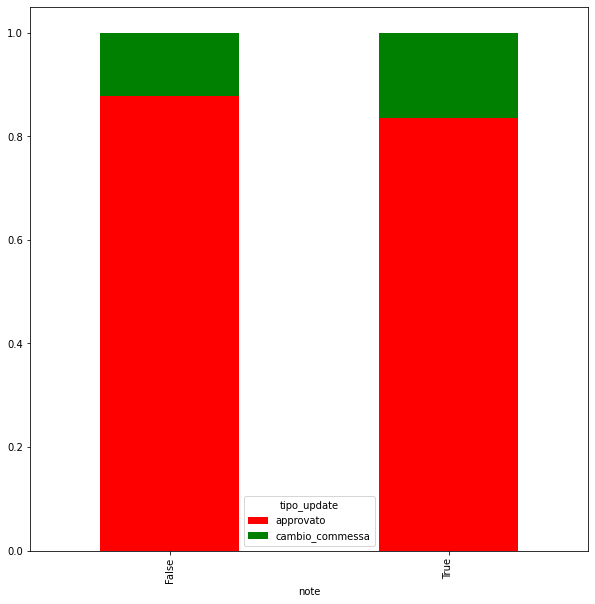

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10,10))
tmp_data = pd.crosstab(data.note.isnull(), data.tipo_update)
tmp_data = tmp_data.apply(lambda x: x/tmp_data.sum(axis=1))
tmp_data.plot.bar(stacked=True, color=['red','green'], grid=False, ax=axes, legend=True)

In [ ]:
sum(data.note.isnull())/len(data.note)

0.8491280148423006

It is not the presence of a note that makes the change more probable. The most resonable strategy is to concatenate the variable note with workdesc, considering that its content may be useful but it is not null only 15% of the times.

In [ ]:
data.workdesc[~data.note.isnull()]

0                                            Affiancamento
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128      SDCS-2817\nULSS 8 Berica - Richiesta intervent...
                               ...                        
26924    installazione e configurazione monitoraggio cl...
26938                   Formazione affiancamento SQLServer
26939                          Sophos Central Academy 2020
26942                        Studio individuale SQL Server
26943                 formazione Gsuite e device aziendali
Name: workdesc, Length: 4066, dtype: object

In [ ]:
data.note[~data.note.isnull()]

0                                        prima gg gratuita
16       Ticket #10350391 - BI: DWH - Verifica utilizzo...
17                              controllo flussi mattutini
124      Ticket #10311130 - R: BI:MIRIADE: SMARTCASH - ...
128                                      Controllo dei log
                               ...                        
26924    Federica N mi ha detto di mettere l'attività i...
26938                   Formazione affiancamento SQLServer
26939                   - Sophos Central device encryption
26942                        Studio individuale SQL Server
26943    m.zamboni\nConfigurazione account gmail sul pc...
Name: note, Length: 4066, dtype: object

In [ ]:
data.workdesc[~data.note.isnull()] = data.workdesc[~data.note.isnull()] + ' ' + data.note[~data.note.isnull()]
data.workdesc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                          Affiancamento prima gg gratuita
1        Giornata in presenza a Borgo Valsugana, implem...
2                                            Sophos AULSS7
3                                            Sophos AULSS7
4        Test e attivazione Journeys ATO UK ed ATO US.\...
                               ...                        
26945                         documentazione flussi kettle
26946                         documentazione flussi kettle
26947                         Documentazione flusso kettle
26948    Upgrade Server QlikVIew\nInstallazione compone...
26949             Sistemazione collegamento al server qlik
Name: workdesc, Length: 26950, dtype: object

In [ ]:
data

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,prima gg gratuita,False,2021-04-07 15:28:16.065,NaN,WEB,False,21206,False,A,False,NaN,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,NaN,True,2021-04-07 10:04:12.244,NaN,WEB,False,21206,False,A,True,NaN,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,NaN,False,2021-04-12 14:53:56.976,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,NaN,False,2021-04-12 14:52:09.489,NaN,WEB,False,4187,False,I,False,NaN,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,NaN,False,2021-04-09 07:10:38.027,NaN,WEB,False,21250,False,I,False,NaN,6.0,approvato,2021-04-12 13:17:12.745288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,16,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,NaN,False,2020-09-16 16:11:45.868,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,16,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,NaN,False,2020-09-14 16:16:15.122,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,16,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,NaN,False,2020-09-10 16:17:17.145,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,16,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,NaN,False,2020-09-10 16:05:34.748,NaN,WEB,False,4212,False,I,False,NaN,6.0,cambio_commessa,2020-09-17 07:59:11.799788


### Drop columns with almost all null values and note

In [ ]:
# Let's remove the columns: description, nr_fattura and note

In [ ]:
data.drop(['description', 'nr_fattura', 'note'], inplace=True, axis=1)

In [ ]:
data.head()

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,False,2021-04-07 15:28:16.065,WEB,False,21206,False,A,False,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,True,2021-04-07 10:04:12.244,WEB,False,21206,False,A,True,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,WEB,False,4187,False,I,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,WEB,False,21250,False,I,False,6.0,approvato,2021-04-12 13:17:12.745288


In [ ]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 26950

MISSING VALUES PER VARIABLE:



id                   0
umid                 0
resid                0
jobid                0
jobtaskdt            0
pay                  0
workdesc             0
qty                  0
jobtaskid            0
flg_trasferta        0
data_ins             0
app_ins              0
flg_prepagato        0
custid               0
flg_straordinario    0
flg_status           0
jobregistered        0
sede                 8
tipo_update          0
changed_on           0
dtype: int64

Now the only variable with missing values is sede

# Data exploration

In [ ]:
# Auxiliary function

def plot_most_freq(variable, k):

    '''plot the frequency of the k most frequent values of a variable'''

    vc = data[variable].value_counts() # count values 

    if k == data[variable].nunique():
        v = vc.values
        i = vc.index
    
    else: 
        v = vc[:k].values
        i = vc[:k].index

    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(range(k), v)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most frequent {variable}')
    ax.set_xticks(np.arange(k))
    ax.set_xticklabels(i)
    plt.show()

### id 

E' semplicemente l'id di un rapportino. Possono esserci più righe corrispondenti allo stesso id nel caso in cui un rapportino venisse modificato. Esempio: 

In [ ]:
data.id.value_counts()

3159682    5
3184972    5
3184966    5
3163305    5
3156853    5
          ..
3144326    1
3152790    1
3181192    1
3179145    1
3145728    1
Name: id, Length: 23392, dtype: int64

In [ ]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 20135
Quante volte lo stesso rapportino è stato inserito più di una volta: 3257


Esempio di rapportino inserito 5 volte:

In [ ]:
data[data.id == 3156853]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
11181,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,WEB,True,4466,False,A,False,6.0,cambio_commessa,2021-01-21 13:53:30.738821
16462,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 15:45:28.236287
16463,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22146,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 15:45:25.840924
17665,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281
17696,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 08:56:02.307538


In [ ]:
data[data.id == 3163305]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
8307,3163305,16,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 14:45:04.80245
8310,3163305,16,319,2959,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22285,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 14:14:56.437101
8314,3163305,16,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,WEB,True,4439,False,A,False,6.0,cambio_commessa,2021-02-04 13:39:32.238067
14243,3163305,16,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,WEB,True,4439,False,I,False,6.0,approvato,2020-12-24 15:30:33.843798
14246,3163305,16,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,WEB,True,4439,False,I,False,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [ ]:
data[data.flg_status!='A'][data.id == 3156853]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
16462,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 15:45:28.236287
16463,3156853,16,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22146,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 15:45:25.840924
17665,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281
17696,3156853,16,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,WEB,True,4466,False,I,False,6.0,approvato,2020-11-30 08:56:02.307538


In [ ]:
data[data.id == 3156853]['workdesc']#[11181]

11181    Meeting per struttura LOG del sistema non son ...
16462    Meeting per struttura LOG del sistema non son ...
16463    Meeting per struttura LOG del sistema non son ...
17665    Meeting per struttura LOG del sistema non son ...
17696    Meeting per struttura LOG del sistema non son ...
Name: workdesc, dtype: object

In [ ]:
# Rapportini presenti solo una volta nel dataset
singoli = data.id.value_counts()[data.id.value_counts() == 1]

In [ ]:
# Calcolo l'id dei rapportini singoli
singoli.index

Int64Index([3183974, 3186023, 3138968, 3175041, 3186071, 3140969, 3173753,
            3065196, 3134010, 3171704,
            ...
            3135467, 3183964, 3165976, 3168898, 3172996, 3144326, 3152790,
            3181192, 3179145, 3145728],
           dtype='int64', length=20135)

In [ ]:
# Guardo il tipo_update dei rapportini singoli
data.tipo_update[data.id.isin(singoli.index)].value_counts()

approvato          19360
cambio_commessa      775
Name: tipo_update, dtype: int64

In [ ]:
data_singoli = data[data.id.isin(singoli.index)] #[data.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa = data_singoli[data_singoli.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,WEB,False,4187,False,I,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
125,3187633,16,1455,81,2021-04-09,False,Formazione propedeutica a conseguimento certif...,3.0,24,False,2021-04-09 12:04:05.442,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-04-09 13:10:03.295586
126,3187638,16,354,3197,2021-03-05,False,gestione progetto cloud,8.0,22705,False,2021-04-09 12:09:04.332,WEB,True,4466,False,I,False,6.0,cambio_commessa,2021-04-09 12:22:37.272337
127,3187637,16,354,3197,2021-03-04,False,gestione progetto cloud,8.0,22705,False,2021-04-09 12:08:38.854,WEB,True,4466,False,I,False,6.0,cambio_commessa,2021-04-09 12:22:32.34099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19298,3119032,16,369,93,2020-08-05,False,Call con ExtremeNetwork più approfondimento di...,2.0,147,False,2020-08-05 14:36:37.297,WEB,False,4187,False,A,False,6.0,cambio_commessa,2020-11-12 17:18:27.801814
19442,3108076,16,367,98,2020-06-24,False,DRUPAL PER TROUBLESHOOTING CON APACHE PER CLIE...,0.5,268,False,2020-07-01 14:42:13.897,WEB,False,4187,False,A,False,6.0,cambio_commessa,2020-11-05 22:24:06.9235
19443,3111531,16,320,98,2020-07-14,False,pam orderdb jira,2.0,268,False,2020-07-14 08:49:39.167,WEB,False,4187,False,A,False,6.0,cambio_commessa,2020-11-05 22:23:35.486129
22647,3136698,16,1445,3006,2020-10-05,False,"SDCS-1327 eliminazione utenti GSUITE, controll...",0.5,22352,False,2020-10-05 10:09:33.921,WEB,False,59,False,I,False,6.0,cambio_commessa,2020-10-19 09:53:45.626679


In [ ]:
rapportini_singoli_cambio_commessa.to_csv(datapath + 'dataset/rapportini_singoli_cambio_commessa.csv', index=False)

In [ ]:
data_original[data_original.id == 3132463]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,note,flg_trasferta,data_ins,description,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,nr_fattura,sede,tipo_update,changed_on
25909,3132463,16,354,81,2020-09-25,False,formazione su aws generale con tommaso panozzo,4.0,24,NaN,False,2020-09-25 15:59:43.364,NaN,WEB,False,4187,False,I,False,NaN,2.0,cambio_commessa,2020-09-25 16:01:43.254563


### umid -> CANC

Questa variabile rappresenta la "unità di misura ma è sempre ore". -> rimuovere

In [ ]:
data.umid.nunique() # calcora quanti valori distinti assume una variabile 

1

In [ ]:
data.umid.value_counts()

16    26950
Name: umid, dtype: int64

### resid = persona -> OK

Questa è la risorsa, la persona

In [ ]:
data.resid.nunique()

97

In [ ]:
data.resid.value_counts()

1445    1617
367     1040
320      766
339      715
369      700
        ... 
1417      27
1415      11
306        5
1476       4
1477       4
Name: resid, Length: 97, dtype: int64

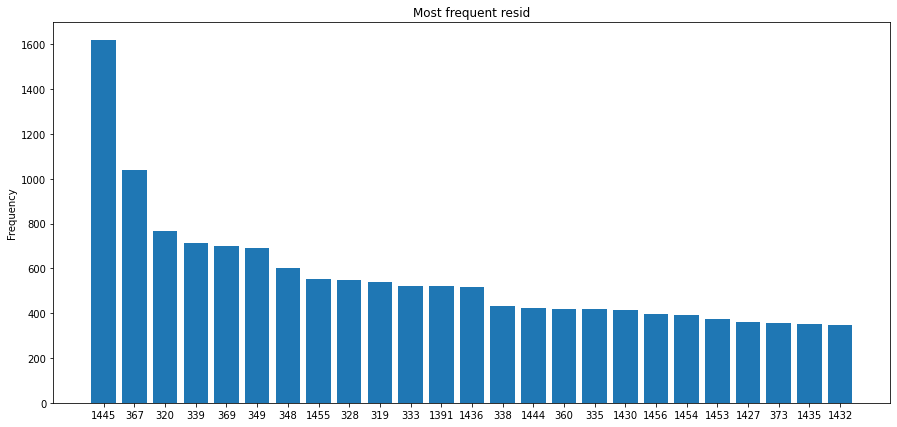

In [ ]:
plot_most_freq('resid', 25)

### jobid = commessa - OK



In [ ]:
data

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
0,3187265,16,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,False,2021-04-07 15:28:16.065,WEB,False,21206,False,A,False,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,16,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,True,2021-04-07 10:04:12.244,WEB,False,21206,False,A,True,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,16,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,WEB,False,4187,False,I,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,16,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,WEB,False,4187,False,I,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,16,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,WEB,False,21250,False,I,False,6.0,approvato,2021-04-12 13:17:12.745288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,16,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,WEB,False,4212,False,I,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,16,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,WEB,False,4212,False,I,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,16,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,WEB,False,4212,False,I,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,16,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,WEB,False,4212,False,I,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


In [ ]:
data.jobid.nunique()

357

In [ ]:
data.jobid.value_counts()

81      2531
280     2481
2897    1892
2848    1813
83      1642
        ... 
2971       1
3051       1
3136       1
2986       1
32         1
Name: jobid, Length: 357, dtype: int64

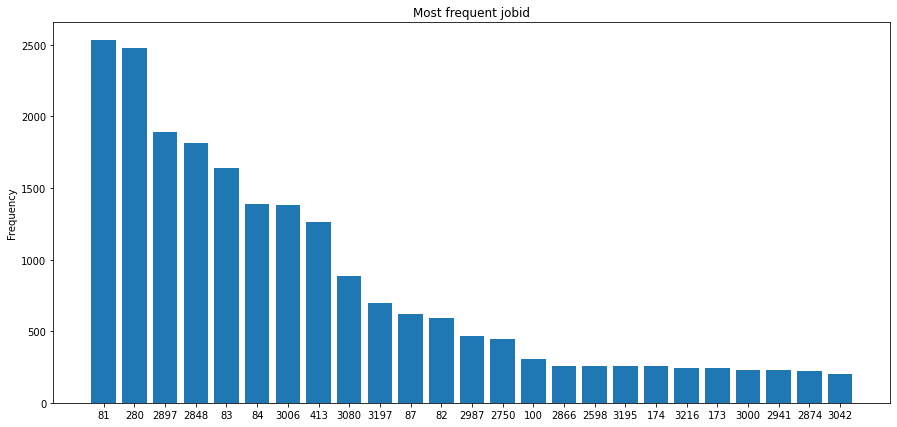

In [ ]:
plot_most_freq('jobid', 25)

### pay = flag fatturare -> OK

In [ ]:
data.pay.nunique()

2

In [ ]:
data.pay.value_counts()

False    24540
True      2410
Name: pay, dtype: int64

OSS: solo in 3 casi sia pay sia prepagato sono entrambi veri

In [ ]:
np.sum(np.logical_and(data.pay == True, data.flg_prepagato == True))

3

In [ ]:
data[np.logical_and(data.pay == True, data.flg_prepagato == True)]

,id,umid,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,app_ins,flg_prepagato,custid,flg_straordinario,flg_status,jobregistered,sede,tipo_update,changed_on
17576,3154473,16,337,3149,2020-11-25,True,"fix puppeteer per DRES, aggiornamento sfeamt06",8.0,22614,False,2020-11-25 16:23:25.453,WEB,True,4370,False,I,False,6.0,approvato,2020-11-30 09:25:22.963357
17577,3154479,16,337,3149,2020-11-24,True,"Fix problema auth multifactor per kb.otb.net, ...",8.0,22614,False,2020-11-25 16:24:34.061,WEB,True,4370,False,I,False,6.0,approvato,2020-11-30 09:25:22.963357
17578,3154482,16,337,3149,2020-11-18,True,investigato problema auth multifactor per kb.o...,8.0,22614,False,2020-11-25 16:24:59.864,WEB,True,4370,False,I,False,6.0,approvato,2020-11-30 09:25:22.963357


### qty = numero ore -> OK

Numero di ore

In [ ]:
n_qty = data.qty.nunique()
n_qty

21

In [ ]:
data.qty.value_counts()

8.0     7944
1.0     4287
0.5     3108
4.0     2816
2.0     2734
1.5     1240
3.0     1221
6.0     1067
7.0      544
2.5      507
5.0      491
3.5      309
5.5      179
4.5      178
6.5      163
7.5      150
9.0        6
10.0       3
12.0       1
9.5        1
10.5       1
Name: qty, dtype: int64

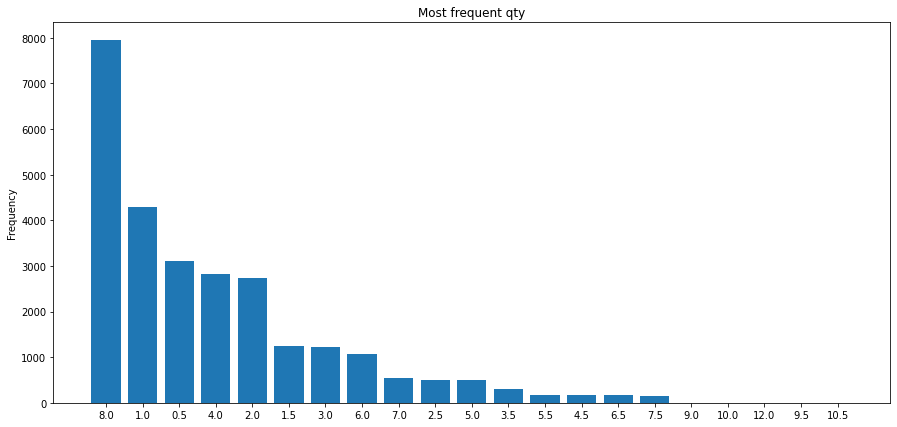

In [ ]:
plot_most_freq('qty', n_qty)

### jobtaskid = sottocommessa -> OK



In [ ]:
data.jobtaskid.nunique()

671

In [ ]:
data.jobtaskid.value_counts()

24       2406
746      1925
22026    1591
26       1316
22352    1003
         ... 
196         1
22665       1
22639       1
22681       1
22536       1
Name: jobtaskid, Length: 671, dtype: int64

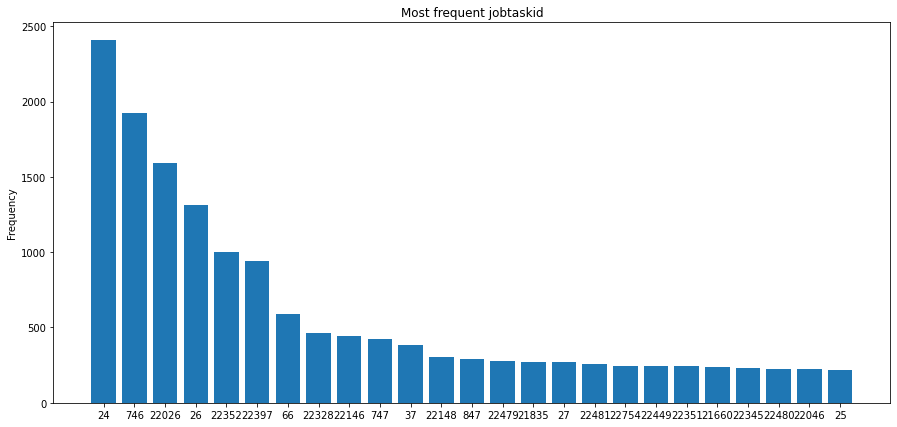

In [ ]:
plot_most_freq('jobtaskid', 25)

### flg_trasferta -> OK

Se l’attività è stata svolta presso il cliente va spuntato il flag Trasferta che automaticamente alimenta il report delle trasferte mensili.
Il flag Trasferta indica  che l’attività è fatta presso la sede del cliente.




In [ ]:
data.flg_trasferta.nunique()

2

In [ ]:
data.flg_trasferta.value_counts()

False    25883
True      1067
Name: flg_trasferta, dtype: int64

### app_ins -> CANC

Penso indichi come è stato inserito il rapportino: sempre via WEB

-> cancellare

In [ ]:
data.app_ins.nunique()

1

In [ ]:
data.app_ins.value_counts()

WEB    26950
Name: app_ins, dtype: int64

### flg_prepagato -> OK

I flag Fatturare e prepagata sono precompilati di default. Se per caso modificate tali flag scrivete nelle note tecniche il motivo per cui è stata fatta la modifica.


In [ ]:
data.flg_prepagato.nunique()

2

In [ ]:
data.flg_prepagato.value_counts()

False    15684
True     11266
Name: flg_prepagato, dtype: int64

### custid = customer id -> OK

In [ ]:
data.custid.nunique()

123

In [ ]:
data.custid.value_counts()

4187     8733
4466     4720
59       4206
10       2481
4243      714
         ... 
4211        1
4253        1
9           1
4263        1
21223       1
Name: custid, Length: 123, dtype: int64

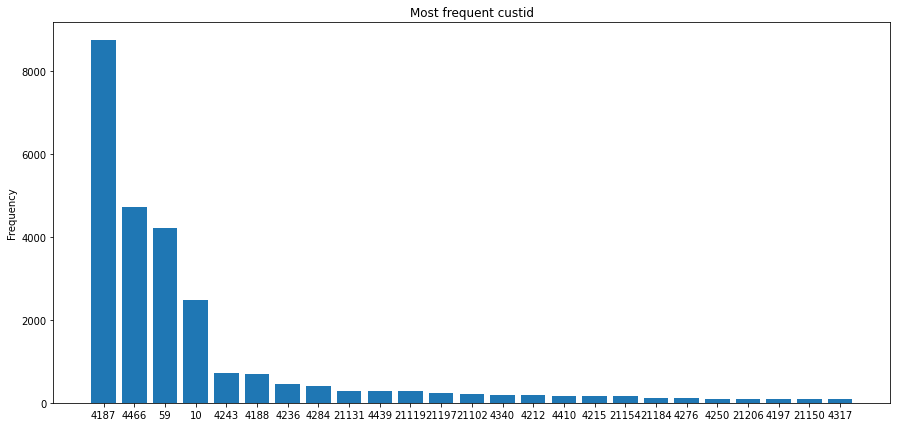

In [ ]:
plot_most_freq('custid', 25)

### flg_straordinario -> OK

In [ ]:
data.flg_straordinario.nunique()

2

In [ ]:
data.flg_straordinario.value_counts()

False    26038
True       912
Name: flg_straordinario, dtype: int64

### flg_status = inserito o approvato

se è inserito o approvato

In [ ]:
data.flg_status.nunique()

2

In [ ]:
data.flg_status.value_counts()

I    24850
A     2100
Name: flg_status, dtype: int64

### jobregistered = ? -> CANC

In [ ]:
data.jobregistered.nunique()

2

In [ ]:
data.jobregistered.value_counts()

False    26908
True        42
Name: jobregistered, dtype: int64

### sede -> OK

In [ ]:
data.sede.nunique()

10

4 "Presidio Regione del Veneto" "Presidio Regione del Veneto" 4

7 "Cliente" "Cliente" 7

8 "Cliente no pranzo" "Cliente no pranzo" 8

9 "Cliente con maggiorazione" "Cliente con maggiorazione" 9

5 "Formazione" "Formazione" 11

6 "Lavoro da casa" "Lavoro da casa" 12

2 "Sede Thiene" "Thiene" 1

1 "Sede Padova" "Padova" 2

3 "Presidio Azienda Zero" "Presidio Azienda Zero" 3

In [ ]:
data.sede.value_counts()

6.0    19018
2.0     4989
1.0     1629
4.0      702
7.0      334
3.0      179
5.0       70
8.0       18
9.0        2
0.0        1
Name: sede, dtype: int64

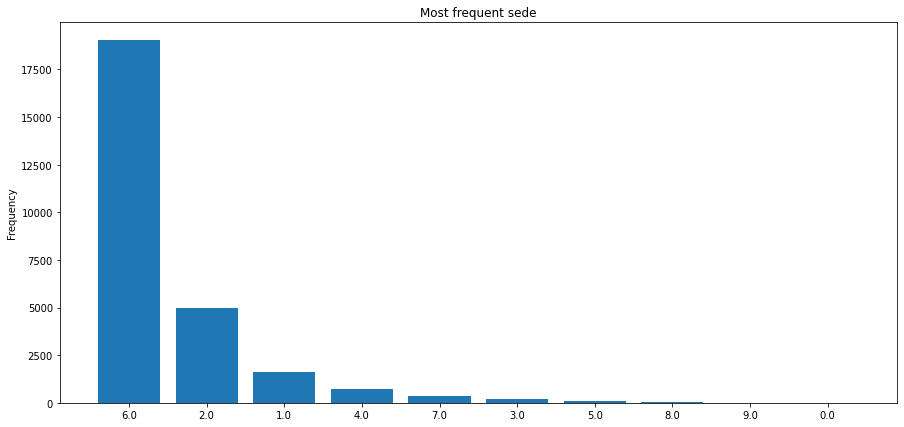

In [ ]:
plot_most_freq('sede', 10)

### tipo_update

In [ ]:
data.tipo_update.nunique()

2

In [ ]:
data.tipo_update.value_counts()

approvato          22702
cambio_commessa     4248
Name: tipo_update, dtype: int64

In [ ]:
data[data.flg_status!='A'].tipo_update.value_counts()

approvato          22702
cambio_commessa     2148
Name: tipo_update, dtype: int64

In [ ]:
2148/22702

0.0946172143423487

# Pre-processing

## Drop useless columns: umid, app_ins e jobregistered

In [ ]:
data1 = data.drop(['umid', 'app_ins', 'jobregistered'], inplace=False, axis=1)

In [ ]:
data1

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
0,3187265,1441,3294,2021-03-31,False,Affiancamento prima gg gratuita,8.0,22891,False,2021-04-07 15:28:16.065,False,21206,False,A,7.0,cambio_commessa,2021-04-12 15:32:50.327955
1,3187244,360,3294,2021-03-31,True,"Giornata in presenza a Borgo Valsugana, implem...",8.0,22891,True,2021-04-07 10:04:12.244,False,21206,False,A,7.0,cambio_commessa,2021-04-12 15:32:35.198809
2,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,I,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,I,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,I,6.0,approvato,2021-04-12 13:17:12.745288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,I,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,I,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,I,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,I,6.0,cambio_commessa,2020-09-17 07:59:11.799788


## Filtro per righe


### 1) Tolgo flg_status = A

In [ ]:
status_a = data1.flg_status == 'A'

In [ ]:
status_a = status_a[status_a == True].index.tolist()

In [ ]:
data1 = data1.drop(status_a)

### 2) group by id e tengo solo l'ultimo approvato (quello più in alto)

In [ ]:
data1

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
2,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,I,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,I,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,I,6.0,approvato,2021-04-12 13:17:12.745288
5,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,I,6.0,approvato,2021-04-12 13:17:10.023332
6,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,I,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,I,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,I,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,I,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,I,6.0,cambio_commessa,2020-09-17 07:59:11.799788


Faccio una prova su un df test

In [ ]:
df = pd.DataFrame({'id': ['11', '11', '22', '11', '11', '22', '11', '11', '22', '22'],
                   'tipo_update' : ['approvato', 'cambio', 'cambio','approvato', 'approvato', 'approvato','cambio', 'approvato', 'approvato', 'approvato'],})


In [ ]:
df

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
3,11,approvato
4,11,approvato
5,22,approvato
6,11,cambio
7,11,approvato
8,22,approvato
9,22,approvato


In [ ]:
df_group = df.groupby(['id'])

In [ ]:
for name, group in df_group:
    print(name)
    print(group)

11
   id tipo_update
0  11   approvato
1  11      cambio
3  11   approvato
4  11   approvato
6  11      cambio
7  11   approvato
22
   id tipo_update
2  22      cambio
5  22   approvato
8  22   approvato
9  22   approvato


In [ ]:
da_rimuovere = []
for name, group in df_group:
    
    app = group.tipo_update == 'approvato'
    app = app[app == True].index.tolist()
    if app:
        app.pop(0)
        da_rimuovere += app

    print(app)

[3, 4, 7]
[8, 9]


In [ ]:
da_rimuovere

[3, 4, 7, 8, 9]

In [ ]:
df.drop(da_rimuovere)

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
5,22,approvato
6,11,cambio


Ora lo faccio nel dataset data1

In [ ]:
data1_group = data1.groupby(['id'])

In [ ]:
da_rimuovere = []
for name, group in data1_group:
    
    app = group.tipo_update == 'approvato'
    app = app[app == True].index.tolist()
    if app:
        app.pop(0)
        da_rimuovere += app

In [ ]:
len(da_rimuovere)

91

In [ ]:
data1 = data1.drop(da_rimuovere)

In [ ]:
data1.id.value_counts()

3184971    5
3184967    5
3184972    5
3184966    5
3184869    4
          ..
3183560    1
3152841    1
3181515    1
3153297    1
3145728    1
Name: id, Length: 22627, dtype: int64

In [ ]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data1.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data1.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 20620
Quante volte lo stesso rapportino è stato inserito più di una volta: 2007


Check sugli esempi considerati anche prima (sotto-sezione id)

In [ ]:
data1[data1.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
16462,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,approvato,2020-11-30 15:45:28.236287
16463,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22146,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,cambio_commessa,2020-11-30 15:45:25.840924
17665,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [ ]:
data1[data1.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
14243,3163305,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,approvato,2020-12-24 15:30:33.843798
14246,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [ ]:
# check di aver tolto tutti i rapportini con flag_status approvato
data1.flg_status.value_counts()

I    24759
Name: flg_status, dtype: int64

In [ ]:
data2 = data1.drop('flg_status', inplace=False, axis=1)
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
2,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
5,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
6,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


In [ ]:
data2.tipo_update.value_counts()

approvato          22611
cambio_commessa     2148
Name: tipo_update, dtype: int64

In [ ]:
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
2,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
3,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
4,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
5,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
6,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26945,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
26946,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
26947,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
26948,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


In [ ]:
data2.to_csv(datapath + 'dataset/data2.csv', index=False)

In [ ]:
data2 = pd.read_csv(datapath + 'dataset/data2.csv')

In [ ]:
data2

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
1,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
2,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
3,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
4,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24755,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24756,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24757,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


### 3) NO! Rimuovo i rapportini singoli con tipo_update = cambio_commessa

Sono rapportini recenti oppure relativi a ticket che son stati cancellati e rimessi, quindi con un nuovo id.

In [ ]:
# Rapportini presenti solo una volta nel dataset
singoli = data2.id.value_counts()[data2.id.value_counts() == 1]

In [ ]:
# Guardo il tipo_update dei rapportini singoli
data2.tipo_update[data2.id.isin(singoli.index)].value_counts()

approvato          20604
cambio_commessa       16
Name: tipo_update, dtype: int64

In [ ]:
data_singoli = data2[data2.id.isin(singoli.index)] #[data.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa = data_singoli[data_singoli.tipo_update == 'cambio_commessa']
rapportini_singoli_cambio_commessa

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
1,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
123,3187633,1455,81,2021-04-09,False,Formazione propedeutica a conseguimento certif...,3.0,24,False,2021-04-09 12:04:05.442,False,4187,False,6.0,cambio_commessa,2021-04-09 13:10:03.295586
124,3187638,354,3197,2021-03-05,False,gestione progetto cloud,8.0,22705,False,2021-04-09 12:09:04.332,True,4466,False,6.0,cambio_commessa,2021-04-09 12:22:37.272337
125,3187637,354,3197,2021-03-04,False,gestione progetto cloud,8.0,22705,False,2021-04-09 12:08:38.854,True,4466,False,6.0,cambio_commessa,2021-04-09 12:22:32.34099
131,3187189,1443,98,2021-04-06,False,Troubleshooting Foreste Troubleshooting Foreste,6.0,268,False,2021-04-06 16:09:31.75,False,4187,False,6.0,cambio_commessa,2021-04-08 08:30:47.833158
139,3187263,367,81,2021-04-07,False,studio python per script aopd fatto da cendron...,1.0,24,False,2021-04-07 15:23:06.3,False,4187,False,6.0,cambio_commessa,2021-04-08 08:27:43.63455
273,3187250,1445,3241,2021-04-07,False,SDCS-34830 ASSEGNAZIONE DELEGHE,0.5,22790,False,2021-04-07 12:31:48.174,True,21119,False,6.0,cambio_commessa,2021-04-07 12:32:28.730954
277,3187166,338,3193,2021-04-06,False,SDCS-3477,1.0,22694,False,2021-04-06 14:27:49.174,True,4453,False,6.0,cambio_commessa,2021-04-07 08:45:29.814039
278,3187194,343,3003,2021-04-06,False,Backup preventivo + Analisi + Creazione nuovo ...,4.0,22348,False,2021-04-06 16:26:48.415,True,4197,False,6.0,cambio_commessa,2021-04-06 16:39:31.870918


In [ ]:
data3 = data2.drop(rapportini_singoli_cambio_commessa.index)

In [ ]:
# Rapportini presenti solo una volta nel dataset
singoli = data3.id.value_counts()[data3.id.value_counts() == 1]

In [ ]:
# Guardo il tipo_update dei rapportini singoli
data3.tipo_update[data2.id.isin(singoli.index)].value_counts()

approvato    20604
Name: tipo_update, dtype: int64

Ora i rapportini singoli sono tutti approvati. OK

In [ ]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
2,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
3,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
4,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
5,3186927,1455,3273,2021-04-01,True,Analisi problematiche di configurazione DNS ev...,0.5,22859,False,2021-04-01 12:43:57.024,False,21250,False,6.0,approvato,2021-04-12 13:17:02.148275
6,3187835,322,3080,2021-04-09,False,UNIFARCO JIRA SERVICE MANAGEMENT,1.5,22479,False,2021-04-09 19:55:08.403,False,4187,False,6.0,approvato,2021-04-12 09:54:10.102765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24755,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24756,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24757,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


In [ ]:
# data3.to_csv(datapath + 'dataset/data3old.csv', index=False)

In [ ]:
data3 = pd.read_csv(datapath + 'dataset/data3.csv')

In [ ]:
data3.head(5)

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
1,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
2,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
3,3186927,1455,3273,2021-04-01,True,Analisi problematiche di configurazione DNS ev...,0.5,22859,False,2021-04-01 12:43:57.024,False,21250,False,6.0,approvato,2021-04-12 13:17:02.148275
4,3187835,322,3080,2021-04-09,False,UNIFARCO JIRA SERVICE MANAGEMENT,1.5,22479,False,2021-04-09 19:55:08.403,False,4187,False,6.0,approvato,2021-04-12 09:54:10.102765


In [ ]:
data3[data3.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
14408,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,True,4466,False,6.0,approvato,2020-11-30 15:45:28.236287
14409,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22146,False,2020-11-28 07:53:23.697,True,4466,False,6.0,cambio_commessa,2020-11-30 15:45:25.840924
15604,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


### 4) group by id e tengo solo il primo cambio commessa (quello più in basso)

In [ ]:
data3 = pd.read_csv(datapath + 'dataset/data2.csv')

In [ ]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
1,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
2,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
3,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
4,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24755,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24756,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24757,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


Faccio una prova su un df test

In [ ]:
df = pd.DataFrame({'id': ['11', '11', '22', '11', '11', '22', '11', '11', '22', '13'],
                   'tipo_update' : ['approvato', 'cambio', 'cambio','approvato', 'approvato', 'approvato','cambio', 'approvato', 'approvato', 'approvato'],})


In [ ]:
df

,id,tipo_update
0,11,approvato
1,11,cambio
2,22,cambio
3,11,approvato
4,11,approvato
5,22,approvato
6,11,cambio
7,11,approvato
8,22,approvato
9,13,approvato


In [ ]:
df_group = df.groupby(['id'])

In [ ]:
for name, group in df_group:
    print(name)
    print(group)

11
   id tipo_update
0  11   approvato
1  11      cambio
3  11   approvato
4  11   approvato
6  11      cambio
7  11   approvato
13
   id tipo_update
9  13   approvato
22
   id tipo_update
2  22      cambio
5  22   approvato
8  22   approvato


In [ ]:
da_rimuovere = []
for name, group in df_group:
    
    app = group.index.tolist()
    if app:
        app.pop()
        da_rimuovere += app

    print(app)

[0, 1, 3, 4, 6]
[]
[2, 5]


In [ ]:
da_rimuovere

[0, 1, 3, 4, 6, 2, 5]

In [ ]:
df.drop(da_rimuovere)

,id,tipo_update
7,11,approvato
8,22,approvato
9,13,approvato


Ora lo faccio nel dataset data3

In [ ]:
data3_group = data3.groupby(['id'])

In [ ]:
da_rimuovere = []
for name, group in data3_group:
    
    app = group.index.tolist()
    if app:
        app.pop()
        da_rimuovere += app

In [ ]:
len(da_rimuovere)

2132

In [ ]:
data3 = data3.drop(da_rimuovere)

In [ ]:
data3.id.value_counts()

3180543    1
3183495    1
3160866    1
3158819    1
3181348    1
          ..
3173783    1
3184024    1
3186073    1
3147162    1
3145728    1
Name: id, Length: 22627, dtype: int64

In [ ]:
print(f'Quante volte lo stesso rapportino è stato inserito solo una volta: {sum(data3.id.value_counts() == 1)}')
print(f'Quante volte lo stesso rapportino è stato inserito più di una volta: {sum(data3.id.value_counts() != 1)}')

Quante volte lo stesso rapportino è stato inserito solo una volta: 22627
Quante volte lo stesso rapportino è stato inserito più di una volta: 0


Check sugli esempi considerati anche prima (sotto-sezione id)

In [ ]:
# data1[data1.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
16462,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22397,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,approvato,2020-11-30 15:45:28.236287
16463,3156853,319,2897,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,22146,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,cambio_commessa,2020-11-30 15:45:25.840924
17665,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,I,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [ ]:
data3[data3.id == 3156853]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
15618,3156853,319,413,2020-11-26,False,Meeting per struttura LOG del sistema non son ...,2.0,1020,False,2020-11-28 07:53:23.697,True,4466,False,6.0,cambio_commessa,2020-11-30 09:00:30.903281


In [ ]:
# data1[data1.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,flg_status,sede,tipo_update,changed_on
14243,3163305,319,3102,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,8.0,22532,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,approvato,2020-12-24 15:30:33.843798
14246,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,I,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [ ]:
data3[data3.id == 3163305]

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
12309,3163305,319,2957,2020-12-14,False,https://miriade.atlassian.net/browse/SDCD-2381...,6.0,22277,False,2020-12-21 20:56:03.52,True,4439,False,6.0,cambio_commessa,2020-12-24 15:26:33.077605


In [ ]:
data3.tipo_update.value_counts()

approvato          20604
cambio_commessa     2023
Name: tipo_update, dtype: int64

In [ ]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
1,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
2,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
3,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
4,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24755,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24756,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24757,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


In [ ]:
data3.to_csv(datapath + 'dataset/data3.csv', index=False)

In [ ]:
data3 = pd.read_csv(datapath + 'dataset/data3.csv')

In [ ]:
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187953,339,98,2021-04-11,False,Sophos AULSS7,5.5,268,False,2021-04-12 14:53:56.976,False,4187,False,2.0,cambio_commessa,2021-04-12 15:11:28.801279
1,3187951,339,98,2021-04-10,False,Sophos AULSS7,6.0,268,False,2021-04-12 14:52:09.489,False,4187,False,6.0,cambio_commessa,2021-04-12 15:11:06.485839
2,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
3,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
4,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24755,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24756,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24757,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


## Manual feature engineering

Colonne da rimuovere id, changed_on

In [ ]:
data = data3[['workdesc', 'jobid', 'jobtaskid', 'resid', 'custid', 'qty', 'sede', 'jobtaskdt', 'data_ins', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,2021-04-11,2021-04-12 14:53:56.976,False,False,False,False,cambio_commessa
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,2021-04-10,2021-04-12 14:52:09.489,False,False,False,False,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,2021-04-09,2021-04-09 07:10:38.027,False,True,False,False,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,2021-04-08,2021-04-08 13:49:02.197,False,True,False,False,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,2021-04-06,2021-04-06 10:56:25.451,False,True,False,False,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,2020-09-16,2020-09-16 16:11:45.868,False,True,False,False,cambio_commessa
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,2020-09-11,2020-09-14 16:16:15.122,False,True,False,False,cambio_commessa
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,2020-09-08,2020-09-10 16:17:17.145,False,True,False,False,cambio_commessa
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,2020-09-10,2020-09-10 16:05:34.748,False,True,False,False,cambio_commessa


### Day

Here I add to the database the variable day, which represents the day in relative terms: I compute how many days have passed since 2020-07-01, date in which the rapportini started to be used at full capacity (there are three days with rapportini before that day, probably some tests -> I can remove them)

In [ ]:
old_rows = data[data.jobtaskdt=='2019-08-29'].index.tolist()
old_rows += data[data.jobtaskdt=='2020-05-05'].index.tolist()
old_rows += data[data.jobtaskdt=='2020-06-19'].index.tolist()

In [ ]:
old_rows

[17317, 24221, 8498]

In [ ]:
data = data.drop(old_rows)

In [ ]:
print(sorted(data.jobtaskdt.unique()))

['2020-07-01', '2020-07-02', '2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-03', '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-10', '2020-08-12', '2020-08-13', '2020-08-14', '2020-08-18', '2020-08-24', '2020-08-25', '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08', '2020-09-09', '2020-09-10', '2020-09-11', '2020-09-12', '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16', '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20', '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-26', '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020

In [ ]:
def date_to_days(d):
    d1 = pd.to_datetime(d, format='%Y-%m-%d')
    diff = d1 - pd.to_datetime('2020-07-01', format='%Y-%m-%d')
    return diff.days

In [ ]:
data['day'] = data['jobtaskdt'].apply(lambda x: date_to_days(x))
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,2021-04-11,2021-04-12 14:53:56.976,False,False,False,False,cambio_commessa,284
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,2021-04-10,2021-04-12 14:52:09.489,False,False,False,False,cambio_commessa,283
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,2021-04-09,2021-04-09 07:10:38.027,False,True,False,False,approvato,282
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,2021-04-08,2021-04-08 13:49:02.197,False,True,False,False,approvato,281
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,2021-04-06,2021-04-06 10:56:25.451,False,True,False,False,approvato,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,2020-09-16,2020-09-16 16:11:45.868,False,True,False,False,cambio_commessa,77
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,2020-09-11,2020-09-14 16:16:15.122,False,True,False,False,cambio_commessa,72
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,2020-09-08,2020-09-10 16:17:17.145,False,True,False,False,cambio_commessa,69
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,2020-09-10,2020-09-10 16:05:34.748,False,True,False,False,cambio_commessa,71


### Add variable delay

Idea: when inserting a rapportino of 20 days before, it could be more likely to make an error. So I can create the variable delay representing the elapsed days (difference) between the jobtaskdt and data_ins.

In [ ]:
data['day1'] = data['data_ins'].apply(lambda x: date_to_days(x))
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,2021-04-11,2021-04-12 14:53:56.976,False,False,False,False,cambio_commessa,284,285
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,2021-04-10,2021-04-12 14:52:09.489,False,False,False,False,cambio_commessa,283,285
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,2021-04-09,2021-04-09 07:10:38.027,False,True,False,False,approvato,282,282
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,2021-04-08,2021-04-08 13:49:02.197,False,True,False,False,approvato,281,281
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,2021-04-06,2021-04-06 10:56:25.451,False,True,False,False,approvato,279,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,2020-09-16,2020-09-16 16:11:45.868,False,True,False,False,cambio_commessa,77,77
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,2020-09-11,2020-09-14 16:16:15.122,False,True,False,False,cambio_commessa,72,75
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,2020-09-08,2020-09-10 16:17:17.145,False,True,False,False,cambio_commessa,69,71
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,2020-09-10,2020-09-10 16:05:34.748,False,True,False,False,cambio_commessa,71,71


In [ ]:
data['delay'] = data.day1 - data.day
data

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,jobtaskdt,data_ins,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,day,day1,delay
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,2021-04-11,2021-04-12 14:53:56.976,False,False,False,False,cambio_commessa,284,285,1
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,2021-04-10,2021-04-12 14:52:09.489,False,False,False,False,cambio_commessa,283,285,2
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,2021-04-09,2021-04-09 07:10:38.027,False,True,False,False,approvato,282,282,0
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,2021-04-08,2021-04-08 13:49:02.197,False,True,False,False,approvato,281,281,0
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,2021-04-06,2021-04-06 10:56:25.451,False,True,False,False,approvato,279,279,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,2020-09-16,2020-09-16 16:11:45.868,False,True,False,False,cambio_commessa,77,77,0
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,2020-09-11,2020-09-14 16:16:15.122,False,True,False,False,cambio_commessa,72,75,3
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,2020-09-08,2020-09-10 16:17:17.145,False,True,False,False,cambio_commessa,69,71,2
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,2020-09-10,2020-09-10 16:05:34.748,False,True,False,False,cambio_commessa,71,71,0


In [ ]:
data5 = data[['workdesc', 'jobid', 'jobtaskid', 'resid', 'custid', 'qty', 'sede', 'day', 'delay', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data5

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,284,1,False,False,False,False,cambio_commessa
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,283,2,False,False,False,False,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,282,0,False,True,False,False,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,281,0,False,True,False,False,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,279,0,False,True,False,False,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,77,0,False,True,False,False,cambio_commessa
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,72,3,False,True,False,False,cambio_commessa
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,69,2,False,True,False,False,cambio_commessa
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,71,0,False,True,False,False,cambio_commessa


In [ ]:
n_delay = data5.delay.nunique()
n_delay

69

In [ ]:
vc = data5.delay.value_counts()
vc

 0     11415
 1      3078
 3      1105
 2      1083
 4       797
       ...  
 51        2
 55        2
 63        2
 64        1
-8         1
Name: delay, Length: 69, dtype: int64

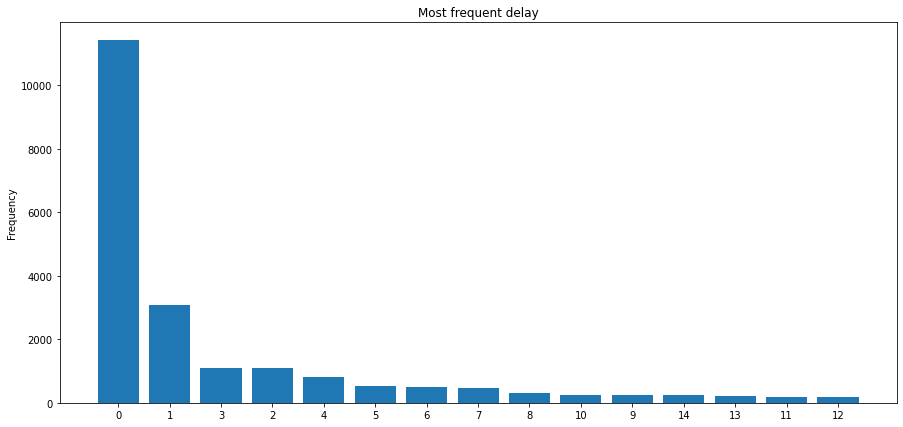

In [ ]:
v = vc[:15].values
i = vc[:15].index
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(15), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Most frequent delay')
ax.set_xticks(np.arange(15))
ax.set_xticklabels(i)
plt.show()

### Area

Here I add to the dataset the variable *area* exploiting the file resid_cleaned.txt

In [6]:
resid_df = pd.read_csv(datapath + 'dataset/resid_cleaned.txt', sep = ' ', header=None)
resid_df.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
1,292,RIS-061,NaN,AMMINISTRAZIONE
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [8]:
resid_df.area.unique()

array(['ACQ', 'AMMINISTRAZIONE', 'BI', 'COMMERCIALE MTK', 'DBA',
       'PRESIDIO', 'MARKETING', 'SISTEMISTI', 'SOA', 'DESIGN', 'HR'],
      dtype=object)

In [10]:
resid_df_update = pd.read_csv(datapath + 'dataset/id-area.csv')#, sep = ' ', header=None)
# resid_df_update.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df_update

,ID,Gruppi Utenti,Area
0,1439,Business Inteligence,NaN
1,1481,Service Design,NaN
2,1408,Amministrazione,NaN
3,328,Database Administrator,NaN
4,1400,Presidio,NaN
...,...,...,...
74,349,Service Design,NaN
75,379,Amministrazione,NaN
76,1457,Developers,NaN
77,1485,Marketing,NaN


In [19]:
aree = resid_df_update['Gruppi Utenti'].unique()
set([a.strip() for a in aree])

{'Acquisti',
 'Amministrazione',
 'Autentica',
 'Business Inteligence',
 'Commerciale',
 'Consulenti Esterni',
 'Database Administrator',
 'Developers',
 'Legal',
 'Marketing',
 'Presidio',
 'Service Design',
 'Sistemisti'}

In [17]:
len(['SOA', 'DESIGN', 'HR'])

11

{'Acquisti' -> ACQ
 'Amministrazione' -> AMMINISTRAZIONE
 'Autentica' -> AMMINISTRAZIONE
 'Business Inteligence' -> BI
 'Commerciale' -> COMMERCIALE MTK
 'Consulenti Esterni',
 'Database Administrator', -> DBA
 'Developers' -> 'SOA'
 'Legal', -> AMMINISTRAZIONE
 'Marketing' -> MARKETING
 'Presidio' -> PRESIDIO
 'Service Design' -> DESIGN
 'Sistemisti' -> SISTEMISTI}

In [ ]:
mapping = resid_df.area
mapping.index = resid_df.resid
mapping

resid
291                 ACQ
292     AMMINISTRAZIONE
296                 ACQ
297                  BI
300                  BI
             ...       
1471                ACQ
1472                ACQ
1475                SOA
1476                DBA
1477                DBA
Name: area, Length: 91, dtype: object

In [ ]:
def resid_to_area(r):
    if r in mapping.index:
        return mapping[r]
    else:
        return 'OTHER'

In [ ]:
data5['area'] = data5['resid'].apply(lambda x: resid_to_area(x))
data5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,area
0,Sophos AULSS7,98,268,339,4187,5.5,2.0,284,1,False,False,False,False,cambio_commessa,SISTEMISTI
1,Sophos AULSS7,98,268,339,4187,6.0,6.0,283,2,False,False,False,False,cambio_commessa,SISTEMISTI
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,21250,1.5,6.0,282,0,False,True,False,False,approvato,BI
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,21250,0.5,6.0,281,0,False,True,False,False,approvato,BI
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,21250,0.5,6.0,279,0,False,True,False,False,approvato,BI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,4212,1.5,6.0,77,0,False,True,False,False,cambio_commessa,BI
24755,documentazione flussi kettle,305,797,1424,4212,4.0,6.0,72,3,False,True,False,False,cambio_commessa,BI
24756,Documentazione flusso kettle,305,797,1424,4212,8.0,6.0,69,2,False,True,False,False,cambio_commessa,BI
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,4212,8.0,6.0,71,0,False,True,False,False,cambio_commessa,BI


### Change dtype

In [ ]:
data5.dtypes

workdesc              object
jobid                  int64
jobtaskid              int64
resid                  int64
custid                 int64
qty                  float64
sede                 float64
day                    int64
delay                  int64
flg_trasferta           bool
pay                     bool
flg_prepagato           bool
flg_straordinario       bool
tipo_update           object
area                  object
dtype: object

At the moment jobid, jobtaskid, resid, custid, sede are numerical values. This could lead to misinterpretations, since they are categorical features (no order between resid 322 and 1455).

I could force this by changing the column type. (this operation is not strictly necessary)

In [ ]:
data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data5.dtypes

workdesc              object
jobid                 object
jobtaskid             object
resid                 object
custid                object
qty                  float64
sede                  object
day                    int64
delay                  int64
flg_trasferta          int64
pay                    int64
flg_prepagato          int64
flg_straordinario      int64
tipo_update           object
area                  object
dtype: object

In [ ]:
data5.describe(include='all')

,workdesc,jobid,jobtaskid,resid,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,area
count,22624,22624,22624,22624,22624,22624.000000,22624,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624,22624
unique,17452,338,627,97,122,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2,12
top,.,280,24,1445,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato,SISTEMISTI
freq,271,2439,2089,1348,7249,NaN,15834,NaN,NaN,NaN,NaN,NaN,NaN,20603,5672
mean,NaN,NaN,NaN,NaN,NaN,4.107032,NaN,168.402272,3.631277,0.039471,0.087518,0.419245,0.032576,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.986137,NaN,64.112051,7.040283,0.194718,0.282598,0.493446,0.177528,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN


In [ ]:
data5 = data5[['workdesc', 'jobid', 'jobtaskid', 'resid', 'area', 'custid', 'qty', 'sede', 'day', 'delay', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario', 'tipo_update']]
data5

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa
24755,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa
24756,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa
24757,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa


In [ ]:
data5.to_csv(datapath + 'dataset/data_text.csv', index=False)

## Remove duplicates

In [ ]:
data5 = pd.read_csv(datapath + 'dataset/data_text.csv')
data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data5[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data5[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

In [ ]:
data5.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,22624,22624,22624,22624,22624,22624,22624.000000,22624,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624.000000,22624
unique,17452,338,627,97,12,122,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,271,2439,2089,1348,5672,7249,NaN,15834,NaN,NaN,NaN,NaN,NaN,NaN,20603
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.107032,NaN,168.402272,3.631277,0.039471,0.087518,0.419245,0.032576,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.986137,NaN,64.112051,7.040283,0.194718,0.282598,0.493446,0.177528,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


In [ ]:
data6 = data5[~data5.duplicated()]
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22619,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa
22620,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa
22621,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa
22622,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa


In [ ]:
data6.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,22585,22585,22585,22585,22585,22585,22585.000000,22585,22585.000000,22585.000000,22585.000000,22585.000000,22585.000000,22585.000000,22585
unique,17452,338,627,97,12,122,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,263,2438,2085,1347,5667,7237,NaN,15822,NaN,NaN,NaN,NaN,NaN,NaN,20566
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.103786,NaN,168.427718,3.628160,0.039451,0.087669,0.419748,0.032632,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.985239,NaN,64.110392,7.040277,0.194670,0.282819,0.493528,0.177676,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


In [ ]:
data6.to_csv(datapath + 'dataset/data6.csv', index=False)

# Exploration after pre-processing

In [ ]:
data6 = pd.read_csv(datapath + 'dataset/data6.csv')
data6[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data6[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data6[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data6[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)

In [ ]:
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa
22581,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa
22582,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa
22583,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa


In [ ]:
data6.describe(include='all')

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
count,22585,22585,22585,22585,22585,22585,22585.000000,22585,22585.000000,22585.000000,22585.000000,22585.000000,22585.000000,22585.000000,22585
unique,17452,338,627,97,12,122,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,2
top,.,280,24,1445,SISTEMISTI,4187,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,approvato
freq,263,2438,2085,1347,5667,7237,NaN,15822,NaN,NaN,NaN,NaN,NaN,NaN,20566
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.103786,NaN,168.427718,3.628160,0.039451,0.087669,0.419748,0.032632,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,2.985239,NaN,64.110392,7.040277,0.194670,0.282819,0.493528,0.177676,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,0.000000,-8.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,226.000000,4.000000,0.000000,0.000000,1.000000,0.000000,NaN


### Missing values

In [ ]:
# Check how missing values are distributed across each variable (i.e., column)
print(f'Total number of rows: {data6.shape[0]}')
print()
print('MISSING VALUES PER VARIABLE:\n')
data6.apply(lambda x: sum(x.isnull())) # apply applies the function column-wise

Total number of rows: 22585

MISSING VALUES PER VARIABLE:



workdesc             0
jobid                0
jobtaskid            0
resid                0
area                 0
custid               0
qty                  0
sede                 0
day                  0
delay                0
flg_trasferta        0
pay                  0
flg_prepagato        0
flg_straordinario    0
tipo_update          0
dtype: int64

### Response variable

In [ ]:
data6.tipo_update.value_counts()

approvato          20566
cambio_commessa     2019
Name: tipo_update, dtype: int64

In [ ]:
print(f'Percentuale di cambio_commessa = {100*data6.tipo_update.value_counts()[1]/(data6.tipo_update.value_counts()[0]+data6.tipo_update.value_counts()[1]): .2f}%')
print(f'Percentuale di approvato = {100*data6.tipo_update.value_counts()[0]/(data6.tipo_update.value_counts()[0]+data6.tipo_update.value_counts()[1]): .2f}%')

Percentuale di cambio_commessa =  8.94%
Percentuale di approvato =  91.06%


## Predictive variables

In [ ]:
# Auxiliary function

def plot_most_freq5(variable, k):

    '''plot the frequency of the k most frequent values of a variable'''

    vc = data6[variable].value_counts() # count values 

    if k == data6[variable].nunique():
        v = vc.values
        i = vc.index
    
    else: 
        v = vc[:k].values
        i = vc[:k].index

    fig, ax = plt.subplots(figsize=(15,7))
    ax.bar(range(k), v)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Most frequent {variable}')
    ax.set_xticks(np.arange(k))
    ax.set_xticklabels(i)
    plt.show()

In [ ]:
data6.head()

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

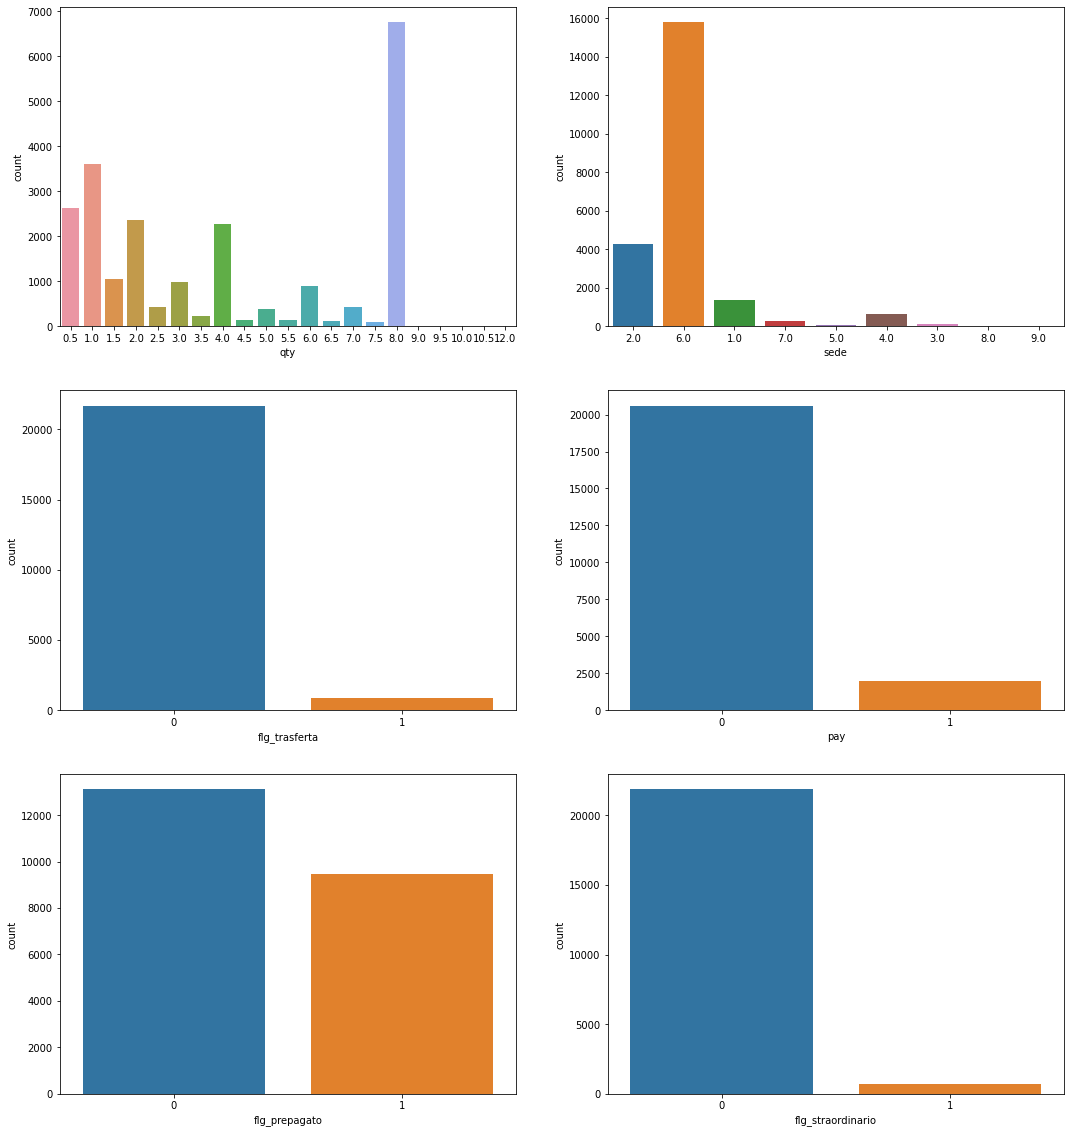

In [ ]:
# For categorical variables, 'countplot' is the way to go
fig, axes = plt.subplots(3, 2, figsize=(18,20))

# Plots
sns.countplot(data6['qty'], ax=axes[0,0])
sns.countplot(data6['sede'], ax=axes[0,1])
sns.countplot(data6['flg_trasferta'], ax=axes[1,0])
sns.countplot(data6['pay'], ax=axes[1,1])
sns.countplot(data6['flg_prepagato'], ax=axes[2,0])
sns.countplot(data6['flg_straordinario'], ax=axes[2,1])

# plt.subplots_adjust(wspace=.5, hspace=.4)

#### jobid = commessa

In [ ]:
data6.jobid.nunique()

338

In [ ]:
data6.jobid.value_counts()

280     2438
81      2175
2848    1757
83      1468
84      1213
        ... 
2811       1
2986       1
3258       1
2630       1
3287       1
Name: jobid, Length: 338, dtype: int64

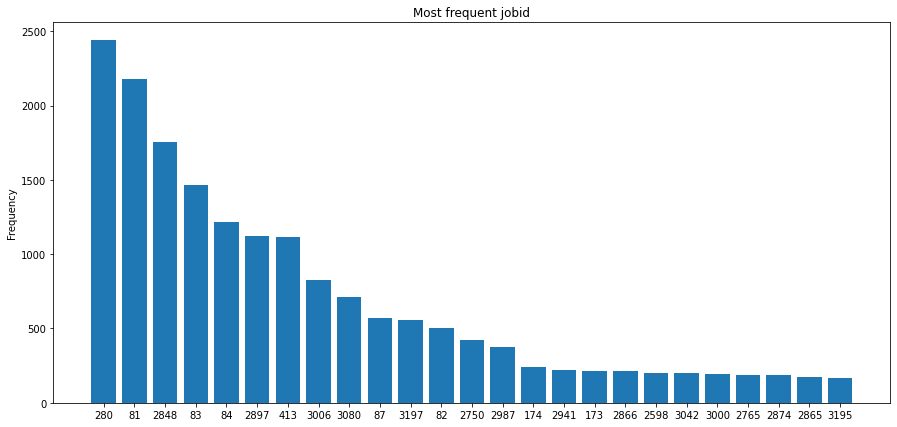

In [ ]:
plot_most_freq5('jobid', 25)

### jobtaskid = sottocommessa



In [ ]:
data6.jobtaskid.nunique()

627

In [ ]:
data6.jobtaskid.value_counts()

24       2085
746      1906
22026    1537
26       1181
22352     588
         ... 
22516       1
22290       1
21288       1
21645       1
22155       1
Name: jobtaskid, Length: 627, dtype: int64

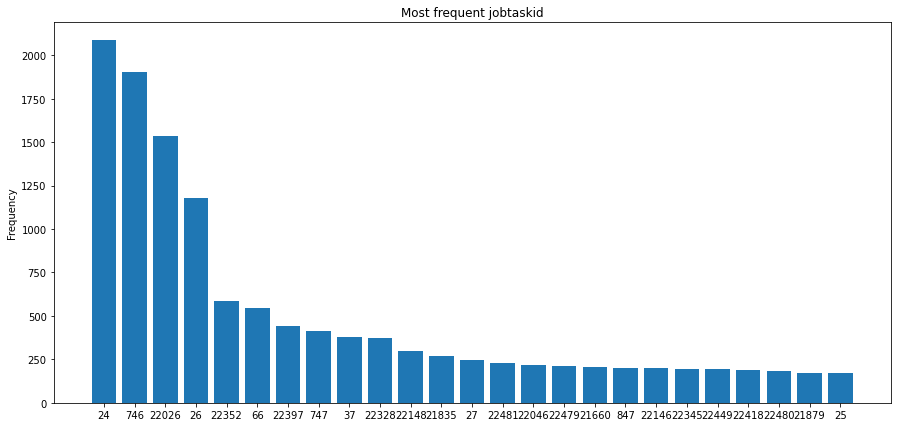

In [ ]:
plot_most_freq5('jobtaskid', 25)

### resid = persona

Questa è la risorsa, la persona

In [ ]:
data6.resid.nunique()

97

In [ ]:
data6.resid.value_counts()

1445    1347
367      858
320      676
369      607
339      558
        ... 
353       16
1415      11
306        5
1477       4
1476       4
Name: resid, Length: 97, dtype: int64

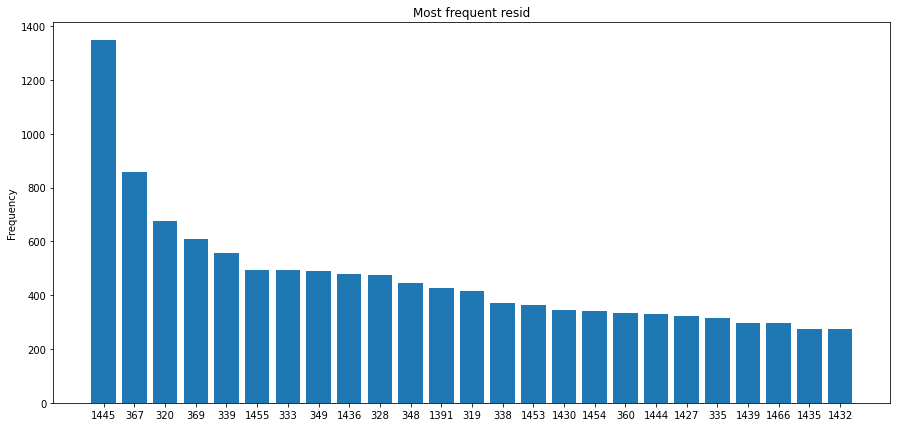

In [ ]:
plot_most_freq5('resid', 25)

In [ ]:
data6.workdesc[data6.resid=='1476']

55                       Capitolo 3 del libro di Oracle 
59           - Allineamento \n- Capitolo 4 Libro Oracle 
149         Studio slide Oracle (corso interno database)
154    Onboarding + Formazione G suite + GDPR + Bot +...
Name: workdesc, dtype: object

### area

In [ ]:
data6.area.nunique()

12

In [ ]:
data6.area.value_counts()

SISTEMISTI         5667
DBA                3707
PRESIDIO           2907
BI                 2705
SOA                2648
OTHER              1024
ACQ                1006
DESIGN              956
MARKETING           854
COMMERCIALE MTK     646
AMMINISTRAZIONE     314
HR                  151
Name: area, dtype: int64

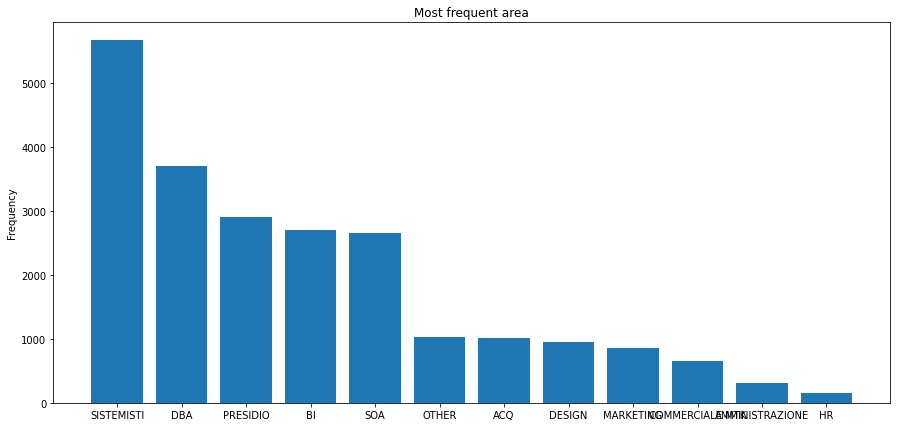

In [ ]:
plot_most_freq5('area', 12)

### custid = customer id

In [ ]:
data6.custid.nunique()

122

In [ ]:
data6.custid.value_counts()

4187     7237
59       3595
4466     3461
10       2438
4243      671
         ... 
4211        1
4294        1
21223       1
4244        1
9           1
Name: custid, Length: 122, dtype: int64

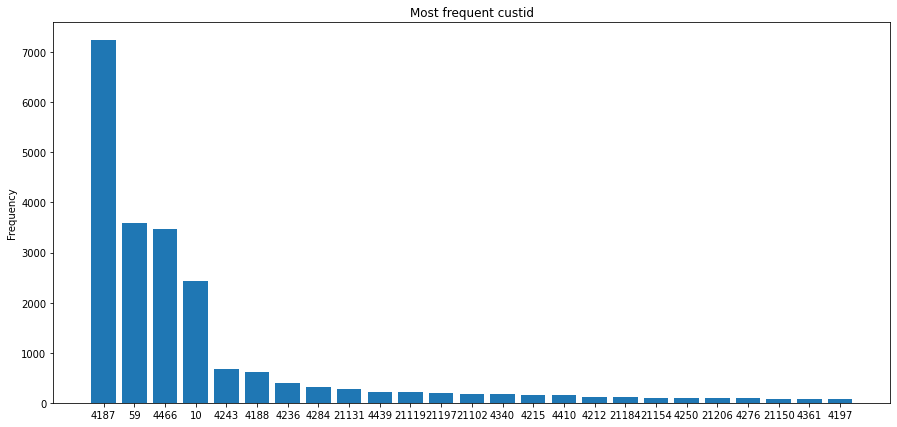

In [ ]:
plot_most_freq5('custid', 25)

### qty = numero ore

Numero di ore

In [ ]:
n_qty = data6.qty.nunique()
n_qty

21

In [ ]:
data6.qty.value_counts()

8.0     6758
1.0     3608
0.5     2637
2.0     2360
4.0     2277
1.5     1045
3.0      995
6.0      900
2.5      441
7.0      424
5.0      391
3.5      240
4.5      135
5.5      133
6.5      122
7.5      109
9.0        4
10.0       3
12.0       1
9.5        1
10.5       1
Name: qty, dtype: int64

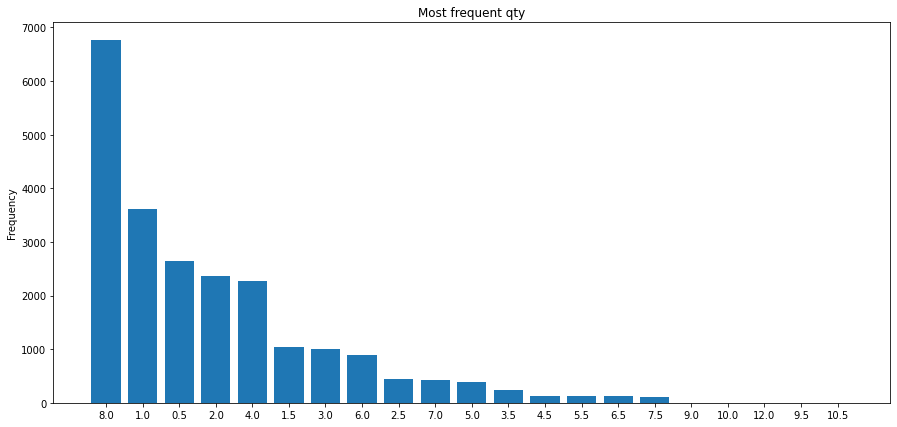

In [ ]:
plot_most_freq5('qty', n_qty)

### sede

In [ ]:
data6.sede.nunique()

9

4 "Presidio Regione del Veneto" "Presidio Regione del Veneto" 4

7 "Cliente" "Cliente" 7

8 "Cliente no pranzo" "Cliente no pranzo" 8

9 "Cliente con maggiorazione" "Cliente con maggiorazione" 9

5 "Formazione" "Formazione" 11

6 "Lavoro da casa" "Lavoro da casa" 12

2 "Sede Thiene" "Thiene" 1

1 "Sede Padova" "Padova" 2

3 "Presidio Azienda Zero" "Presidio Azienda Zero" 3

In [ ]:
data6.sede.value_counts()

6.0    15822
2.0     4271
1.0     1357
4.0      669
7.0      288
3.0      103
5.0       60
8.0       14
9.0        1
Name: sede, dtype: int64

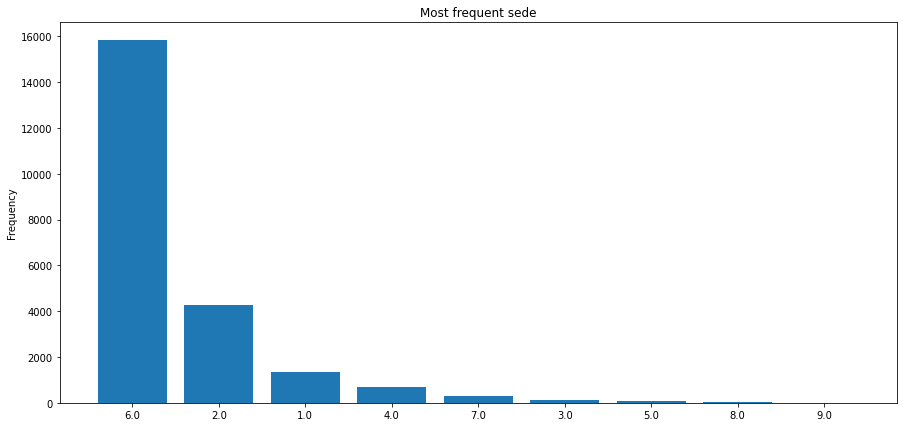

In [ ]:
plot_most_freq5('sede', 9)

### flg_trasferta

Se l’attività è stata svolta presso il cliente va spuntato il flag Trasferta che automaticamente alimenta il report delle trasferte mensili.
Il flag Trasferta indica  che l’attività è fatta presso la sede del cliente.




In [ ]:
data6.flg_trasferta.nunique()

2

In [ ]:
data6.flg_trasferta.value_counts()

0    21694
1      891
Name: flg_trasferta, dtype: int64

### pay = flag fatturare

In [ ]:
data6.pay.nunique()

2

In [ ]:
data6.pay.value_counts()

0    20605
1     1980
Name: pay, dtype: int64

OSS: solo in 3 casi sia pay sia prepagato sono entrambi veri

In [ ]:
np.sum(np.logical_and(data6.pay == True, data6.flg_prepagato == True))

3

In [ ]:
data6[np.logical_and(data6.pay == True, data6.flg_prepagato == True)]

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
14060,"fix puppeteer per DRES, aggiornamento sfeamt06",3149,22614,337,SISTEMISTI,4370,8.0,6.0,147,0,0,1,1,0,approvato
14061,"Fix problema auth multifactor per kb.otb.net, ...",3149,22614,337,SISTEMISTI,4370,8.0,6.0,146,1,0,1,1,0,approvato
14062,investigato problema auth multifactor per kb.o...,3149,22614,337,SISTEMISTI,4370,8.0,6.0,140,7,0,1,1,0,approvato


### flg_prepagato

I flag Fatturare e prepagata sono precompilati di default. Se per caso modificate tali flag scrivete nelle note tecniche il motivo per cui è stata fatta la modifica.


In [ ]:
data6.flg_prepagato.nunique()

2

In [ ]:
data6.flg_prepagato.value_counts()

0    13105
1     9480
Name: flg_prepagato, dtype: int64

### flg_straordinario

In [ ]:
data6.flg_straordinario.nunique()

2

In [ ]:
data6.flg_straordinario.value_counts()

0    21848
1      737
Name: flg_straordinario, dtype: int64

# Exploration part 2

## Distribuzione di alcune variabili e loro relazione con tipo_update

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

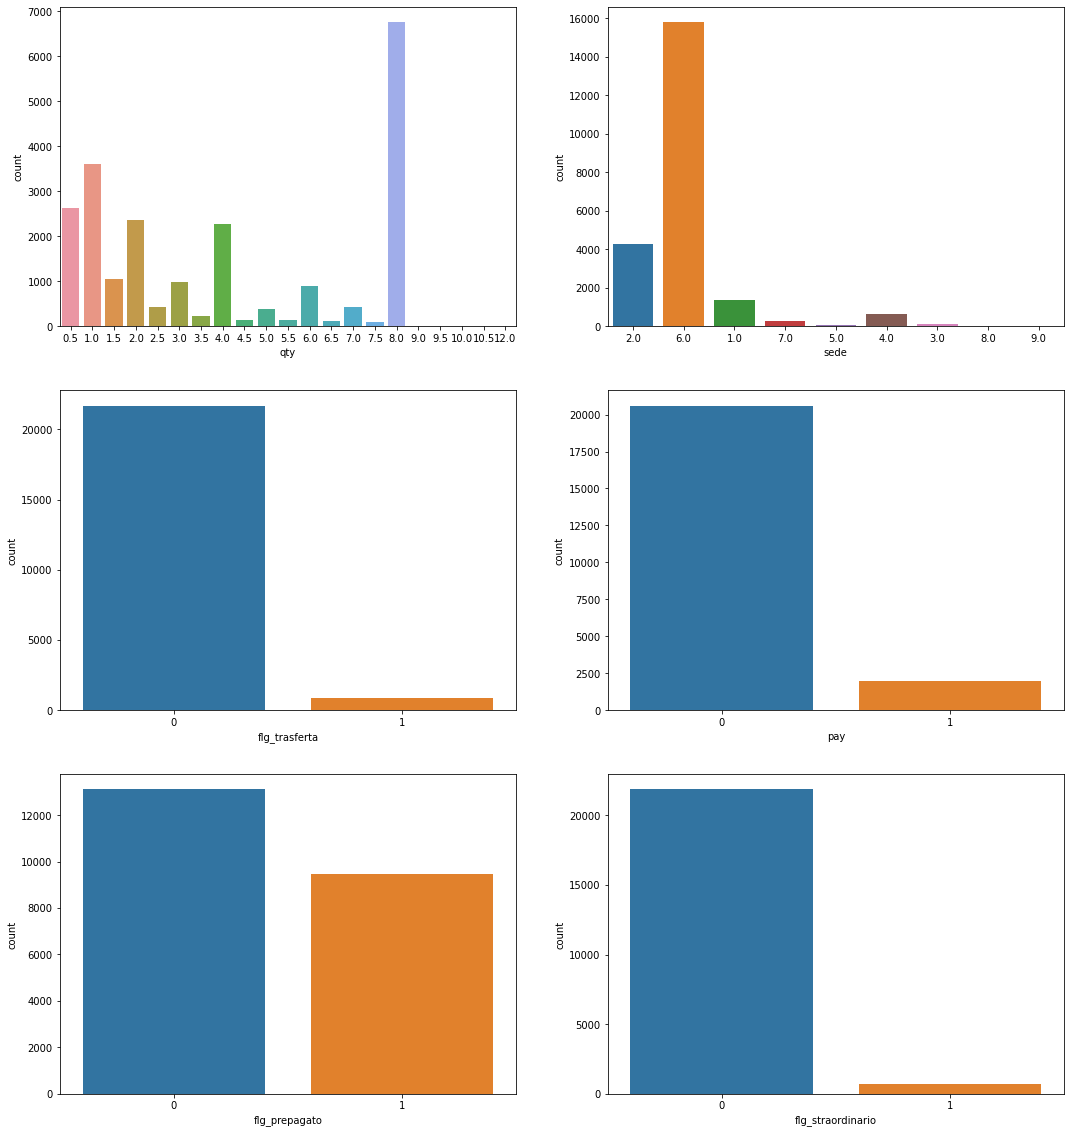

In [ ]:
# For categorical variables, 'countplot' is the way to go
fig, axes = plt.subplots(3, 2, figsize=(18,20))

# Plots
sns.countplot(data6['qty'], ax=axes[0,0])
sns.countplot(data6['sede'], ax=axes[0,1])
sns.countplot(data6['flg_trasferta'], ax=axes[1,0])
sns.countplot(data6['pay'], ax=axes[1,1])
sns.countplot(data6['flg_prepagato'], ax=axes[2,0])
sns.countplot(data6['flg_straordinario'], ax=axes[2,1])

# plt.subplots_adjust(wspace=.5, hspace=.4)

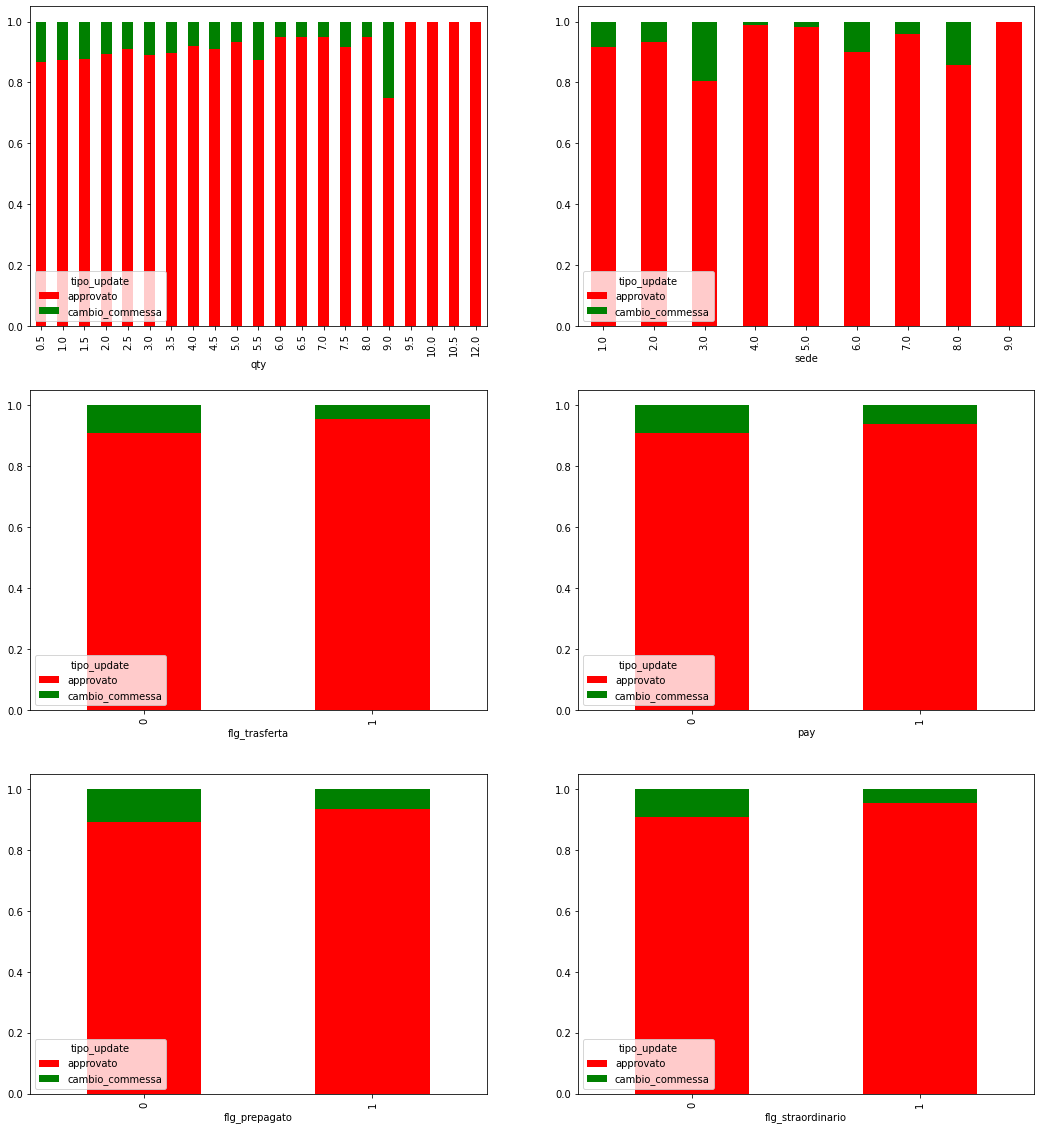

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(18,20))
cols = ['qty', 'sede', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario']
i = 0
for c in cols:
    tmp_data = pd.crosstab(data6.loc[:, c], data6.tipo_update)
    # pandas.crosstab returns an mxn table where m is the number of values for the first argument (x) 
    # and n for the second argument (y)
    # As the second argument is always data6.tipo_update, n = 2 (tipo_update is binary!)
    # e.g., x = 'sede'; y = 'tipo_update'
    # the following apply is used to transform the crosstab into a "normalized" table as follows:
    # each entry in the table displays how the i-th categorical value of x (i.e., i-th row) is distributed across
    # all the possible values of y (i.e., approvato/cambio_commessa)
    tmp_data = tmp_data.apply(lambda x: x/tmp_data.sum(axis=1))
    tmp_data.plot.bar(stacked=True, color=['red','green'], grid=False, ax=axes[i//2, i % 2], legend=True)
    i += 1


*   La variabile qty, non ha cambi_commessa per valori sopra le 9 ore, ma questi sono pochi, quindi non è indicativo
*   Riassumendo, nessuna di queste variabili sembra essere discriminante per la predizione di tipo_update. Tuttavia, potrebberlo esserlo per il task di identificazione della commessa corretta 




## tipo_update ~ resid

In [ ]:
# data4 = pd.read_csv(datapath + 'dataset/data4.csv')
data6

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa
22581,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa
22582,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa
22583,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa


### resource-level analysis

In [ ]:
resid_group = data6.groupby(['resid'])

result = []
for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

result = sorted(result, key=itemgetter(1), reverse=True)
result

[('1471', 0.4318181818181818),
 ('1417', 0.42105263157894735),
 ('330', 0.3359375),
 ('1458', 0.25757575757575757),
 ('1456', 0.21673003802281368),
 ('300', 0.2028301886792453),
 ('339', 0.1881720430107527),
 ('1444', 0.18731117824773413),
 ('1441', 0.17289719626168223),
 ('349', 0.15950920245398773),
 ('1391', 0.15258215962441316),
 ('1424', 0.15178571428571427),
 ('367', 0.15151515151515152),
 ('1445', 0.14847809948032664),
 ('343', 0.14606741573033707),
 ('342', 0.14285714285714285),
 ('1466', 0.13898305084745763),
 ('340', 0.13815789473684212),
 ('319', 0.13526570048309178),
 ('1432', 0.13454545454545455),
 ('372', 0.1340782122905028),
 ('322', 0.13253012048192772),
 ('348', 0.12780269058295965),
 ('1454', 0.12573099415204678),
 ('373', 0.12053571428571429),
 ('1461', 0.11403508771929824),
 ('345', 0.1134020618556701),
 ('1435', 0.11231884057971014),
 ('327', 0.1072961373390558),
 ('1400', 0.10555555555555556),
 ('360', 0.10179640718562874),
 ('1429', 0.10084033613445378),
 ('1462'

In [ ]:
len(result)

97

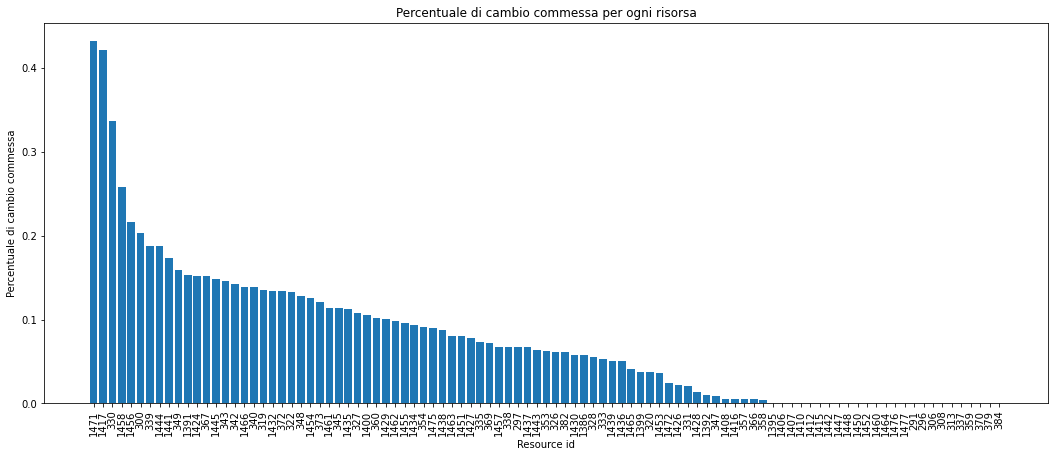

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Percentuale di cambio commessa per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

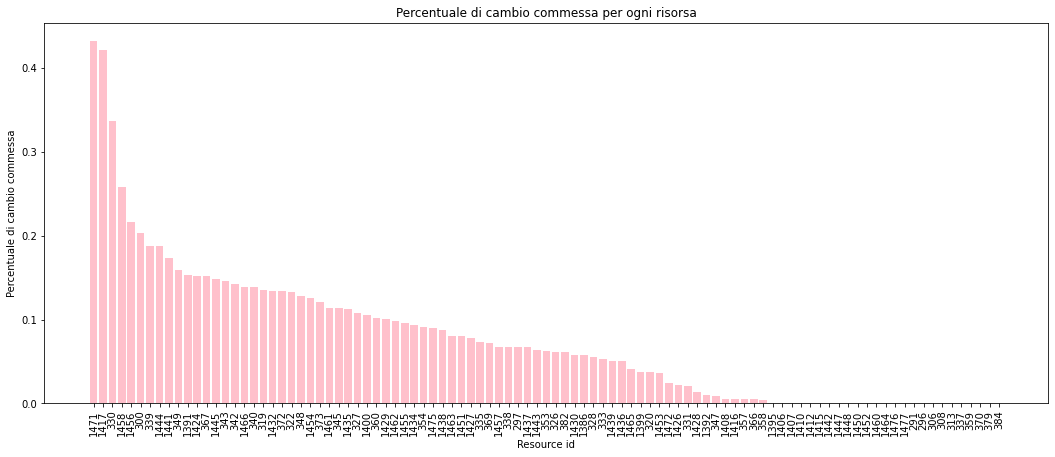

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result], color='pink')
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Percentuale di cambio commessa per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### number of jobid per resource

In [ ]:
resid_group = data6.groupby(['resid'])

result = []
for name, group in resid_group:
    n_jobid = group.jobid.nunique()
    result.append((name, n_jobid))
    # print(name, n_cambio/group.shape[0])

result = sorted(result, key=itemgetter(1), reverse=True)
result

[('339', 67),
 ('367', 67),
 ('369', 58),
 ('319', 55),
 ('320', 45),
 ('327', 44),
 ('1391', 38),
 ('1445', 34),
 ('328', 33),
 ('1432', 32),
 ('322', 32),
 ('338', 32),
 ('300', 31),
 ('348', 31),
 ('360', 31),
 ('1427', 30),
 ('345', 26),
 ('1435', 22),
 ('1424', 21),
 ('1438', 21),
 ('382', 20),
 ('343', 19),
 ('1399', 18),
 ('1455', 18),
 ('340', 18),
 ('349', 17),
 ('1429', 16),
 ('1436', 15),
 ('335', 14),
 ('354', 14),
 ('1451', 13),
 ('373', 13),
 ('1437', 12),
 ('1439', 12),
 ('1456', 12),
 ('326', 12),
 ('1430', 11),
 ('1441', 11),
 ('1458', 11),
 ('1426', 10),
 ('1443', 10),
 ('1457', 10),
 ('297', 10),
 ('333', 10),
 ('1416', 9),
 ('1444', 8),
 ('370', 8),
 ('1434', 7),
 ('1454', 7),
 ('1465', 7),
 ('1466', 7),
 ('1475', 7),
 ('366', 7),
 ('1386', 6),
 ('1461', 6),
 ('372', 6),
 ('1400', 5),
 ('1417', 5),
 ('1453', 5),
 ('353', 5),
 ('331', 4),
 ('342', 4),
 ('1428', 3),
 ('1460', 3),
 ('1464', 3),
 ('358', 3),
 ('1450', 2),
 ('1462', 2),
 ('1463', 2),
 ('1471', 2),
 ('147

In [ ]:
print(f'Numero medio di jobid per risorsa = {np.mean([r[1] for r in result]):.2f}')

Numero medio di jobid per risorsa = 12.78


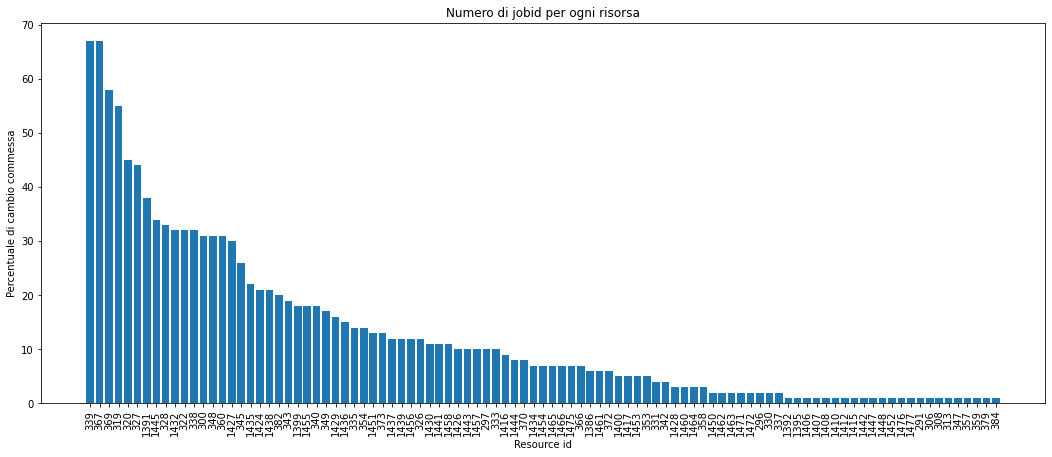

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Resource id')
ax.set_title(f'Numero di jobid per ogni risorsa')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### area-level analysis

Ho salvato il testo della mail "risorse" su un file txt. Qui lo importo come dataframe. Contiene informazioni sull'area e la data d'assunzione.

In [ ]:
resid_df = pd.read_csv(datapath + 'dataset/resid_cleaned.txt', sep = ' ', header=None)
resid_df.columns = ['resid', 'rescode', 'data assunzione', 'area']
resid_df

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
1,292,RIS-061,NaN,AMMINISTRAZIONE
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [ ]:
resid_area = resid_df.groupby(['area'])

areas = {}
for name, group in resid_area:
    areas[name] = list(group.resid)
    
for k,v in areas.items():
    print(f'{k:15} {v}')

ACQ             [291, 296, 313, 384, 1407, 1448, 1464, 1471, 1472]
AMMINISTRAZIONE [292, 379, 1408]
BI              [297, 300, 306, 370, 1391, 1424, 1436, 1439, 1444, 1455]
COMMERCIALE MTK [308, 1395, 1426, 1447]
DBA             [319, 320, 322, 326, 327, 328, 1399, 1427, 1432, 1438, 1460, 1461, 1466, 1476, 1477]
DESIGN          [349, 1430, 1465]
HR              [1410]
MARKETING       [333, 1453]
PRESIDIO        [330, 331, 341, 342, 347, 357, 358, 359, 366, 1386, 1392, 1406, 1416, 1428, 1437, 1442, 1450]
SISTEMISTI      [335, 337, 338, 339, 340, 343, 345, 367, 369, 372, 382, 1400, 1443, 1445, 1458]
SOA             [348, 354, 360, 373, 1412, 1434, 1441, 1456, 1457, 1462, 1463, 1475]


In [ ]:
for k,v in areas.items():
    print(f'{k:15} {len(v)}')

ACQ             9
AMMINISTRAZIONE 3
BI              10
COMMERCIALE MTK 4
DBA             15
DESIGN          3
HR              1
MARKETING       2
PRESIDIO        17
SISTEMISTI      15
SOA             12


NB: nel file resid ci sono id assenti nel dataset e viceversa

In [ ]:
mapping = resid_df.area
mapping.index = resid_df.resid
mapping

resid
291                 ACQ
292     AMMINISTRAZIONE
296                 ACQ
297                  BI
300                  BI
             ...       
1471                ACQ
1472                ACQ
1475                SOA
1476                DBA
1477                DBA
Name: area, Length: 91, dtype: object

In [ ]:
resid_group = data4.groupby(['resid'])

cambio_area = {}
tot_area = {}
check_area = {}
for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    # n_safe = server_group[server_group.TYPE == 0].shape[0]
    # result_area.get(mapping[name], []).append(n_cambio/group.shape[0]))
    
    # if name in [292, 379, 1408]:
    #     print(name)

    if name in mapping.index:
        check_area[mapping[name]] = check_area.get(mapping[name], 0) + 1
        cambio_area[mapping[name]] = cambio_area.get(mapping[name], 0) + n_cambio
        tot_area[mapping[name]] = tot_area.get(mapping[name], 0) + group.shape[0]
    
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
# result

In [ ]:
# Check
for k,v in check_area.items():
    print(f'Area: {k:17} -> number of resources: {v}')

Area: ACQ               -> number of resources: 9
Area: BI                -> number of resources: 10
Area: COMMERCIALE MTK   -> number of resources: 4
Area: DBA               -> number of resources: 15
Area: PRESIDIO          -> number of resources: 16
Area: MARKETING         -> number of resources: 2
Area: SISTEMISTI        -> number of resources: 15
Area: SOA               -> number of resources: 12
Area: DESIGN            -> number of resources: 3
Area: AMMINISTRAZIONE   -> number of resources: 2
Area: HR                -> number of resources: 1


In [ ]:
for k,v in cambio_area.items():
    print(f'Area: {k:17} -> cambio_commessa: {v}')

Area: ACQ               -> cambio_commessa: 20
Area: BI                -> cambio_commessa: 347
Area: COMMERCIALE MTK   -> cambio_commessa: 5
Area: DBA               -> cambio_commessa: 328
Area: PRESIDIO          -> cambio_commessa: 115
Area: MARKETING         -> cambio_commessa: 39
Area: SISTEMISTI        -> cambio_commessa: 754
Area: SOA               -> cambio_commessa: 302
Area: DESIGN            -> cambio_commessa: 107
Area: AMMINISTRAZIONE   -> cambio_commessa: 1
Area: HR                -> cambio_commessa: 0


In [ ]:
for k,v in tot_area.items():
    print(f'Area: {k:17} -> tot: {v}')

Area: ACQ               -> tot: 1039
Area: BI                -> tot: 3052
Area: COMMERCIALE MTK   -> tot: 659
Area: DBA               -> tot: 4035
Area: PRESIDIO          -> tot: 3025
Area: MARKETING         -> tot: 896
Area: SISTEMISTI        -> tot: 6416
Area: SOA               -> tot: 2947
Area: DESIGN            -> tot: 1065
Area: AMMINISTRAZIONE   -> tot: 316
Area: HR                -> tot: 151


In [ ]:
fraction_per_area = {}

for area in cambio_area:
    fraction_per_area[area] = cambio_area[area]/tot_area[area]
fraction_per_area = sorted(fraction_per_area.items(), key=itemgetter(1), reverse=True)
fraction_per_area

[('SISTEMISTI', 0.11751870324189526),
 ('BI', 0.1136959370904325),
 ('SOA', 0.10247709535120461),
 ('DESIGN', 0.10046948356807511),
 ('DBA', 0.08128872366790582),
 ('MARKETING', 0.04352678571428571),
 ('PRESIDIO', 0.03801652892561983),
 ('ACQ', 0.019249278152069296),
 ('COMMERCIALE MTK', 0.007587253414264037),
 ('AMMINISTRAZIONE', 0.0031645569620253164),
 ('HR', 0.0)]

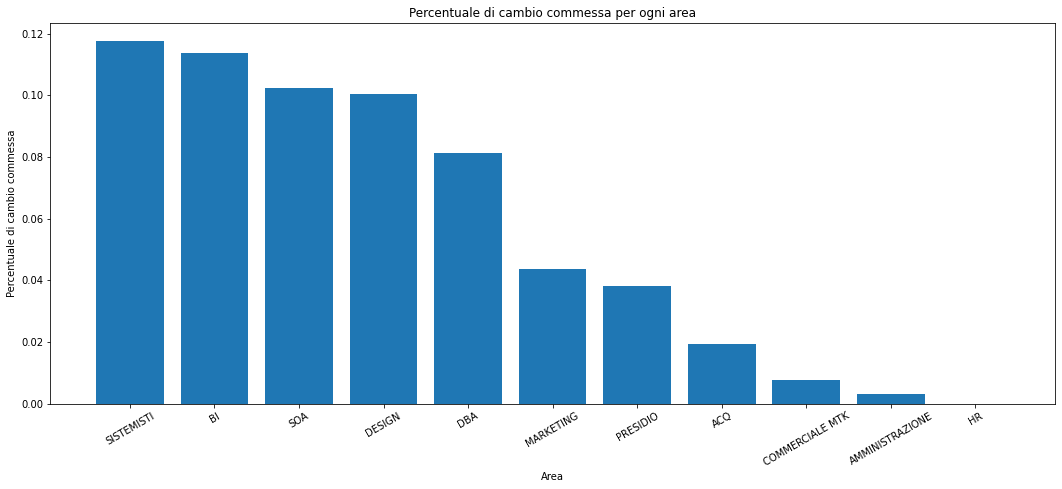

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(fraction_per_area)), [x[1] for x in fraction_per_area])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Area')
ax.set_title(f'Percentuale di cambio commessa per ogni area')
ax.set_xticks(np.arange(len(fraction_per_area)))
ax.set_xticklabels([x[0] for x in fraction_per_area], rotation=30)
plt.show()

#### number of job-id per area

In [ ]:
# resid_group = data4.groupby(['resid'])

commessa_area = {}

for name, group in resid_group:

    if name in mapping.index:
        # print(name)
        # print(group.jobid.unique())
        commessa_area[mapping[name]] = commessa_area.get(mapping[name], []) + list(group.jobid.unique())
    

In [ ]:
len(set([e for a in list(commessa_area.values()) for e in a]))

353

In [ ]:
for a in commessa_area:
    commessa_area[a] = len(set(commessa_area[a]))

In [ ]:
commessa_area

{'ACQ': 5,
 'AMMINISTRAZIONE': 1,
 'BI': 97,
 'COMMERCIALE MTK': 12,
 'DBA': 149,
 'DESIGN': 27,
 'HR': 1,
 'MARKETING': 12,
 'PRESIDIO': 29,
 'SISTEMISTI': 181,
 'SOA': 65}

In [ ]:
commessa_area = sorted(commessa_area.items(), key=itemgetter(1), reverse=True)
commessa_area

[('SISTEMISTI', 181),
 ('DBA', 149),
 ('BI', 97),
 ('SOA', 65),
 ('PRESIDIO', 29),
 ('DESIGN', 27),
 ('COMMERCIALE MTK', 12),
 ('MARKETING', 12),
 ('ACQ', 5),
 ('AMMINISTRAZIONE', 1),
 ('HR', 1)]

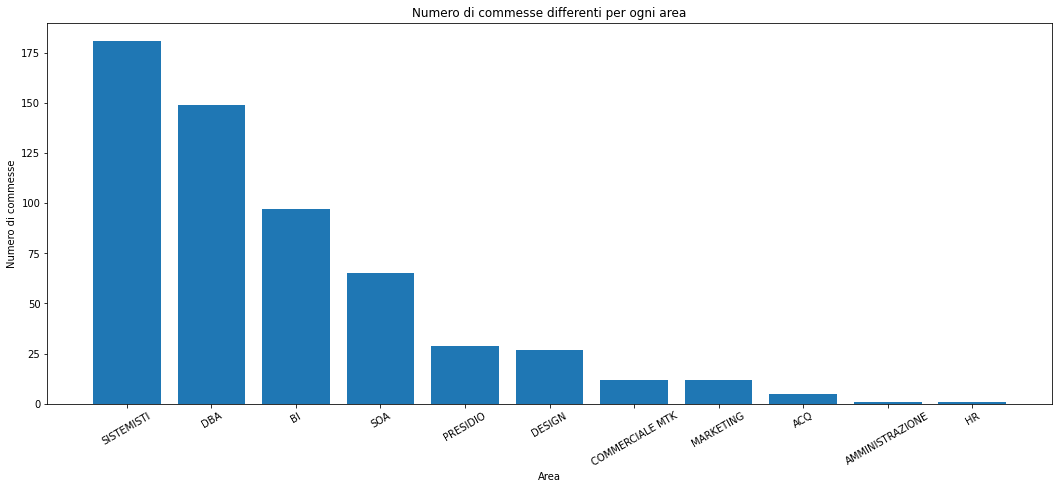

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(commessa_area)), [x[1] for x in commessa_area])
ax.set_ylabel('Numero di commesse')
ax.set_xlabel('Area')
ax.set_title(f'Numero di commesse differenti per ogni area')
ax.set_xticks(np.arange(len(commessa_area)))
ax.set_xticklabels([x[0] for x in commessa_area], rotation=30)
plt.show()

#### number of jobtaskid per area

In [ ]:
# resid_group = data4.groupby(['resid'])

attivita_area = {}

for name, group in resid_group:

    if name in mapping.index:
        # print(name)
        # print(group.jobid.unique())
        attivita_area[mapping[name]] = attivita_area.get(mapping[name], []) + list(group.jobtaskid.unique())
    

In [ ]:
len(set([e for a in list(attivita_area.values()) for e in a]))

652

In [ ]:
for a in attivita_area:
    attivita_area[a] = len(set(attivita_area[a]))

In [ ]:
attivita_area = sorted(attivita_area.items(), key=itemgetter(1), reverse=True)
attivita_area

[('SISTEMISTI', 299),
 ('DBA', 263),
 ('BI', 142),
 ('SOA', 129),
 ('DESIGN', 64),
 ('PRESIDIO', 44),
 ('MARKETING', 31),
 ('COMMERCIALE MTK', 17),
 ('ACQ', 9),
 ('AMMINISTRAZIONE', 2),
 ('HR', 2)]

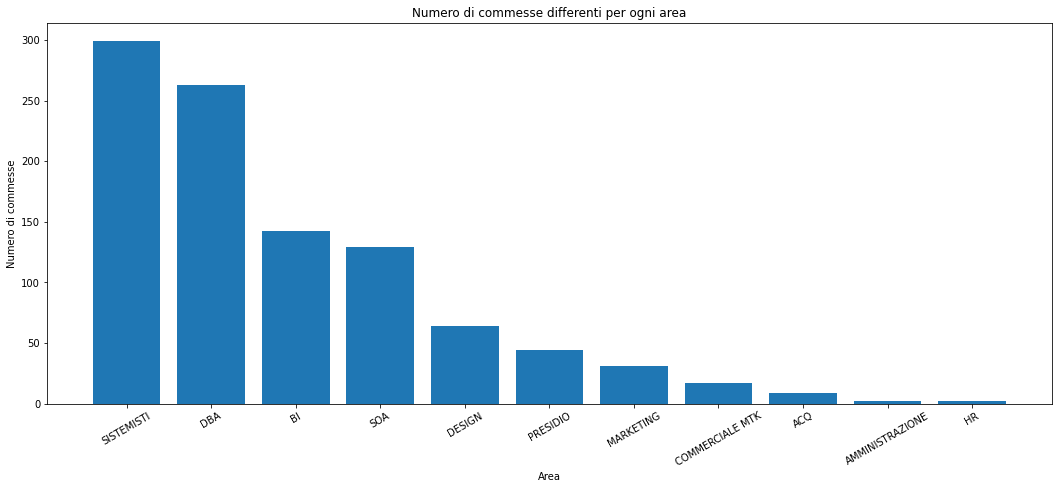

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(attivita_area)), [x[1] for x in attivita_area])
ax.set_ylabel('Numero di commesse')
ax.set_xlabel('Area')
ax.set_title(f'Numero di commesse differenti per ogni area')
ax.set_xticks(np.arange(len(attivita_area)))
ax.set_xticklabels([x[0] for x in attivita_area], rotation=30)
plt.show()

### data assunzione

In [ ]:
resid_df1 = resid_df[resid_df['data assunzione'].notna()]
resid_df1

,resid,rescode,data assunzione,area
0,291,RIS-133,2016-10-17 00:00:00,ACQ
2,296,RIS-159,2017-11-13 00:00:00,ACQ
3,297,RIS-018,2007-07-17 00:00:00,BI
4,300,RIS-104,2015-02-13 00:00:00,BI
5,306,RIS-141,2020-06-01 00:00:00,BI
...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ
88,1475,RIS-0269,2021-02-15 00:00:00,SOA
89,1476,RIS-0270,2021-04-06 10:00:00,DBA


In [ ]:
resid_df1['anno_mese'] = resid_df1['data assunzione'].apply(lambda x: x[:7])
resid_df1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,resid,rescode,data assunzione,area,anno_mese
0,291,RIS-133,2016-10-17 00:00:00,ACQ,2016-10
2,296,RIS-159,2017-11-13 00:00:00,ACQ,2017-11
3,297,RIS-018,2007-07-17 00:00:00,BI,2007-07
4,300,RIS-104,2015-02-13 00:00:00,BI,2015-02
5,306,RIS-141,2020-06-01 00:00:00,BI,2020-06
...,...,...,...,...,...
86,1471,RIS-0267,2021-02-01 00:00:00,ACQ,2021-02
87,1472,RIS-0268,2021-02-01 00:00:00,ACQ,2021-02
88,1475,RIS-0269,2021-02-15 00:00:00,SOA,2021-02
89,1476,RIS-0270,2021-04-06 10:00:00,DBA,2021-04


In [ ]:
resid_df1.anno_mese.unique()

array(['2016-10', '2017-11', '2007-07', '2015-02', '2020-06', '2012-09',
       '2017-12', '2007-03', '2010-02', '2015-01', '2017-02', '2017-09',
       '2021-01', '2008-02', '2011-12', '2015-04', '2018-03', '2015-11',
       '2016-05', '2017-05', '2011-03', '2017-08', '2018-01', '2018-02',
       '2018-04', '2020-09', '2018-07', '2018-05', '2018-06', '2018-08',
       '2018-09', '2018-10', '2019-01', '2019-02', '2019-04', '2019-05',
       '2019-06', '2019-09', '2019-10', '2019-12', '2020-01', '2020-03',
       '2020-10', '2020-05', '2020-08', '2020-07', '2020-12', '2021-02',
       '2021-04', '2021-06'], dtype=object)

In [ ]:
resid_anno_mese = resid_df1.groupby(['anno_mese'])

datas = {}
for name, group in resid_anno_mese:
    datas[name] = list(group.resid)
    
for k,v in datas.items():
    print(f'{k:15} {v}')

2007-03         [319]
2007-07         [297]
2008-02         [335]
2010-02         [320]
2011-03         [348]
2011-12         [338]
2012-09         [308]
2015-01         [322]
2015-02         [300]
2015-04         [339]
2015-11         [342]
2016-05         [343]
2016-10         [291, 349]
2017-02         [327]
2017-05         [345]
2017-08         [354]
2017-09         [328]
2017-11         [296, 347]
2017-12         [313, 330, 331]
2018-01         [357, 358]
2018-02         [359]
2018-03         [340]
2018-04         [360]
2018-05         [369, 370, 372]
2018-06         [373]
2018-07         [367]
2018-08         [379, 382]
2018-09         [384]
2018-10         [1386]
2019-01         [1391]
2019-02         [1392, 1395]
2019-04         [1399]
2019-05         [1400, 1406]
2019-06         [1407, 1408]
2019-09         [1412]
2019-10         [1416]
2019-12         [1424]
2020-01         [1426, 1427, 1428, 1432]
2020-03         [1436, 1437]
2020-05         [1439, 1441, 1442, 1443, 1445]
20

In [ ]:
for k,v in datas.items():
    print(f'{k:15} {len(v)}')

2007-03         1
2007-07         1
2008-02         1
2010-02         1
2011-03         1
2011-12         1
2012-09         1
2015-01         1
2015-02         1
2015-04         1
2015-11         1
2016-05         1
2016-10         2
2017-02         1
2017-05         1
2017-08         1
2017-09         1
2017-11         2
2017-12         3
2018-01         2
2018-02         1
2018-03         1
2018-04         1
2018-05         3
2018-06         1
2018-07         1
2018-08         2
2018-09         1
2018-10         1
2019-01         1
2019-02         2
2019-04         1
2019-05         2
2019-06         2
2019-09         1
2019-10         1
2019-12         1
2020-01         4
2020-03         2
2020-05         5
2020-06         3
2020-07         1
2020-08         2
2020-09         4
2020-10         7
2020-12         1
2021-01         5
2021-02         3
2021-04         1
2021-06         1


In [ ]:
mapping1 = resid_df1.anno_mese
mapping1.index = resid_df1.resid
mapping1

resid
291     2016-10
296     2017-11
297     2007-07
300     2015-02
306     2020-06
         ...   
1471    2021-02
1472    2021-02
1475    2021-02
1476    2021-04
1477    2021-06
Name: anno_mese, Length: 87, dtype: object

In [ ]:
resid_group = data4.groupby(['resid'])

cambio_data = {}
tot_data = {}
check_data = {}

for name, group in resid_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    # n_safe = server_group[server_group.TYPE == 0].shape[0]
    # result_area.get(mapping[name], []).append(n_cambio/group.shape[0]))
    
    # if name in [292, 379, 1408]:
    #     print(name)

    if name in mapping1.index:
        check_data[mapping1[name]] = check_data.get(mapping1[name], 0) + 1
        cambio_data[mapping1[name]] = cambio_data.get(mapping1[name], 0) + n_cambio
        tot_data[mapping1[name]] = tot_data.get(mapping1[name], 0) + group.shape[0]
    
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
# result

In [ ]:
for k,v in cambio_data.items():
    print(f'Data assunzione: {k:8} -> cambio_commessa: {v}')

Data assunzione: 2016-10  -> cambio_commessa: 82
Data assunzione: 2017-11  -> cambio_commessa: 2
Data assunzione: 2007-07  -> cambio_commessa: 6
Data assunzione: 2015-02  -> cambio_commessa: 43
Data assunzione: 2020-06  -> cambio_commessa: 0
Data assunzione: 2012-09  -> cambio_commessa: 0
Data assunzione: 2017-12  -> cambio_commessa: 46
Data assunzione: 2007-03  -> cambio_commessa: 57
Data assunzione: 2010-02  -> cambio_commessa: 27
Data assunzione: 2015-01  -> cambio_commessa: 33
Data assunzione: 2017-02  -> cambio_commessa: 28
Data assunzione: 2017-09  -> cambio_commessa: 27
Data assunzione: 2021-01  -> cambio_commessa: 106
Data assunzione: 2008-02  -> cambio_commessa: 27
Data assunzione: 2011-12  -> cambio_commessa: 26
Data assunzione: 2015-04  -> cambio_commessa: 110
Data assunzione: 2018-03  -> cambio_commessa: 22
Data assunzione: 2015-11  -> cambio_commessa: 26
Data assunzione: 2016-05  -> cambio_commessa: 38
Data assunzione: 2017-05  -> cambio_commessa: 22
Data assunzione: 2011-

In [ ]:
for k,v in tot_data.items():
    print(f'Data assunzione: {k:8} -> tot: {v}')

Data assunzione: 2016-10  -> tot: 713
Data assunzione: 2017-11  -> tot: 413
Data assunzione: 2007-07  -> tot: 95
Data assunzione: 2015-02  -> tot: 255
Data assunzione: 2020-06  -> tot: 269
Data assunzione: 2012-09  -> tot: 136
Data assunzione: 2017-12  -> tot: 458
Data assunzione: 2007-03  -> tot: 471
Data assunzione: 2010-02  -> tot: 703
Data assunzione: 2015-01  -> tot: 282
Data assunzione: 2017-02  -> tot: 261
Data assunzione: 2017-09  -> tot: 501
Data assunzione: 2021-01  -> tot: 1725
Data assunzione: 2008-02  -> tot: 343
Data assunzione: 2011-12  -> tot: 395
Data assunzione: 2015-04  -> tot: 668
Data assunzione: 2018-03  -> tot: 174
Data assunzione: 2015-11  -> tot: 182
Data assunzione: 2016-05  -> tot: 304
Data assunzione: 2017-05  -> tot: 216
Data assunzione: 2011-03  -> tot: 506
Data assunzione: 2017-08  -> tot: 284
Data assunzione: 2018-01  -> tot: 432
Data assunzione: 2018-02  -> tot: 173
Data assunzione: 2018-04  -> tot: 370
Data assunzione: 2020-09  -> tot: 757
Data assunzi

In [ ]:
fraction_per_data = {}

for data in cambio_data:
    fraction_per_data[data] = cambio_data[data]/tot_data[data]
fraction_per_data = sorted(fraction_per_data.items(), key=itemgetter(0), reverse=False)
fraction_per_data

[('2007-03', 0.12101910828025478),
 ('2007-07', 0.06315789473684211),
 ('2008-02', 0.07871720116618076),
 ('2010-02', 0.03840682788051209),
 ('2011-03', 0.11857707509881422),
 ('2011-12', 0.06582278481012659),
 ('2012-09', 0.0),
 ('2015-01', 0.11702127659574468),
 ('2015-02', 0.16862745098039217),
 ('2015-04', 0.16467065868263472),
 ('2015-11', 0.14285714285714285),
 ('2016-05', 0.125),
 ('2016-10', 0.1150070126227209),
 ('2017-02', 0.10727969348659004),
 ('2017-05', 0.10185185185185185),
 ('2017-08', 0.07746478873239436),
 ('2017-09', 0.05389221556886228),
 ('2017-11', 0.004842615012106538),
 ('2017-12', 0.10043668122270742),
 ('2018-01', 0.004629629629629629),
 ('2018-02', 0.0),
 ('2018-03', 0.12643678160919541),
 ('2018-04', 0.0972972972972973),
 ('2018-05', 0.0705765407554672),
 ('2018-06', 0.1111111111111111),
 ('2018-07', 0.13682092555331993),
 ('2018-08', 0.04087193460490463),
 ('2018-09', 0.0),
 ('2018-10', 0.06538461538461539),
 ('2019-01', 0.1497005988023952),
 ('2019-02', 0.

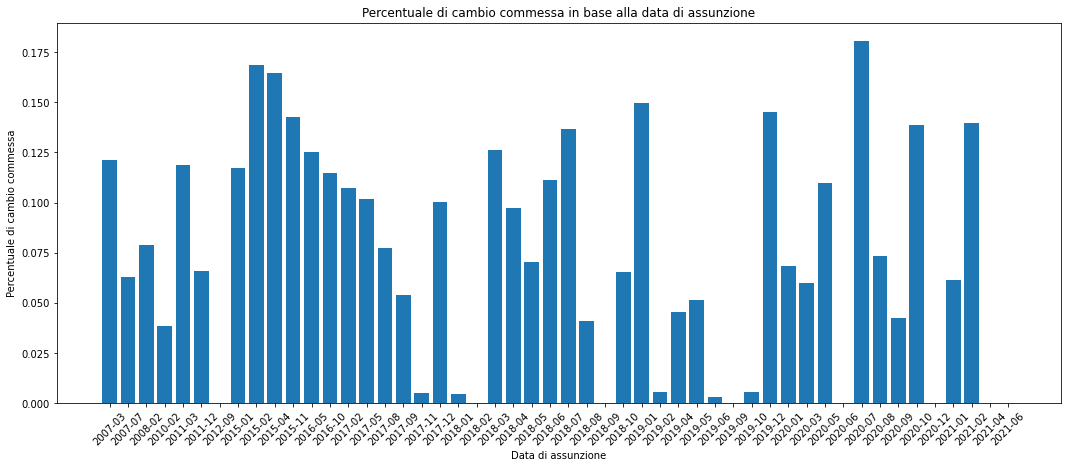

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(fraction_per_data)), [x[1] for x in fraction_per_data])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data di assunzione')
ax.set_title(f'Percentuale di cambio commessa in base alla data di assunzione')
ax.set_xticks(np.arange(len(fraction_per_data)))
ax.set_xticklabels([x[0] for x in fraction_per_data], rotation=45)
plt.show()

Non c'è un pattern particolare in base alla data di assunzione

## tipo_update ~ jobtaskdt

In [ ]:
data3 = pd.read_csv(datapath + 'dataset/data3.csv')
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on
0,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288
1,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332
2,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569
3,3186927,1455,3273,2021-04-01,True,Analisi problematiche di configurazione DNS ev...,0.5,22859,False,2021-04-01 12:43:57.024,False,21250,False,6.0,approvato,2021-04-12 13:17:02.148275
4,3187835,322,3080,2021-04-09,False,UNIFARCO JIRA SERVICE MANAGEMENT,1.5,22479,False,2021-04-09 19:55:08.403,False,4187,False,6.0,approvato,2021-04-12 09:54:10.102765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24738,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034
24739,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262
24740,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322
24741,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788


### month-level

In [ ]:
data3['anno_mese'] = data3['jobtaskdt'].apply(lambda x: x[:7])
data3

,id,resid,jobid,jobtaskdt,pay,workdesc,qty,jobtaskid,flg_trasferta,data_ins,flg_prepagato,custid,flg_straordinario,sede,tipo_update,changed_on,anno_mese
0,3187465,1455,3273,2021-04-09,True,Test e attivazione Journeys ATO UK ed ATO US.\...,1.5,22859,False,2021-04-09 07:10:38.027,False,21250,False,6.0,approvato,2021-04-12 13:17:12.745288,2021-04
1,3187375,1455,3273,2021-04-08,True,Call con team IT del cliente per fix problemat...,0.5,22859,False,2021-04-08 13:49:02.197,False,21250,False,6.0,approvato,2021-04-12 13:17:10.023332,2021-04
2,3187076,1455,3273,2021-04-06,True,Analisi problematica configurazione Pardot Tra...,0.5,22859,False,2021-04-06 10:56:25.451,False,21250,False,6.0,approvato,2021-04-12 13:17:04.794569,2021-04
3,3186927,1455,3273,2021-04-01,True,Analisi problematiche di configurazione DNS ev...,0.5,22859,False,2021-04-01 12:43:57.024,False,21250,False,6.0,approvato,2021-04-12 13:17:02.148275,2021-04
4,3187835,322,3080,2021-04-09,False,UNIFARCO JIRA SERVICE MANAGEMENT,1.5,22479,False,2021-04-09 19:55:08.403,False,4187,False,6.0,approvato,2021-04-12 09:54:10.102765,2021-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24738,3129009,1424,305,2020-09-16,True,documentazione flussi kettle,1.5,797,False,2020-09-16 16:11:45.868,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:26.853034,2020-09
24739,3128181,1424,305,2020-09-11,True,documentazione flussi kettle,4.0,797,False,2020-09-14 16:16:15.122,False,4212,False,6.0,cambio_commessa,2020-09-17 08:00:00.187262,2020-09
24740,3127163,1424,305,2020-09-08,True,Documentazione flusso kettle,8.0,797,False,2020-09-10 16:17:17.145,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:31.63322,2020-09
24741,3127136,1391,305,2020-09-10,True,Upgrade Server QlikVIew\nInstallazione compone...,8.0,797,False,2020-09-10 16:05:34.748,False,4212,False,6.0,cambio_commessa,2020-09-17 07:59:11.799788,2020-09


In [ ]:
data_group = data3.groupby(['anno_mese'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)
result

[('2019-08', 0.5),
 ('2020-05', 0.5),
 ('2020-06', 0.0),
 ('2020-07', 0.06666666666666667),
 ('2020-08', 0.40625),
 ('2020-09', 0.08690580344123651),
 ('2020-10', 0.055184804928131416),
 ('2020-11', 0.07721796276013143),
 ('2020-12', 0.06786651668541432),
 ('2021-01', 0.09078681909885676),
 ('2021-02', 0.10821202966218071),
 ('2021-03', 0.11059342815105444),
 ('2021-04', 0.07142857142857142)]

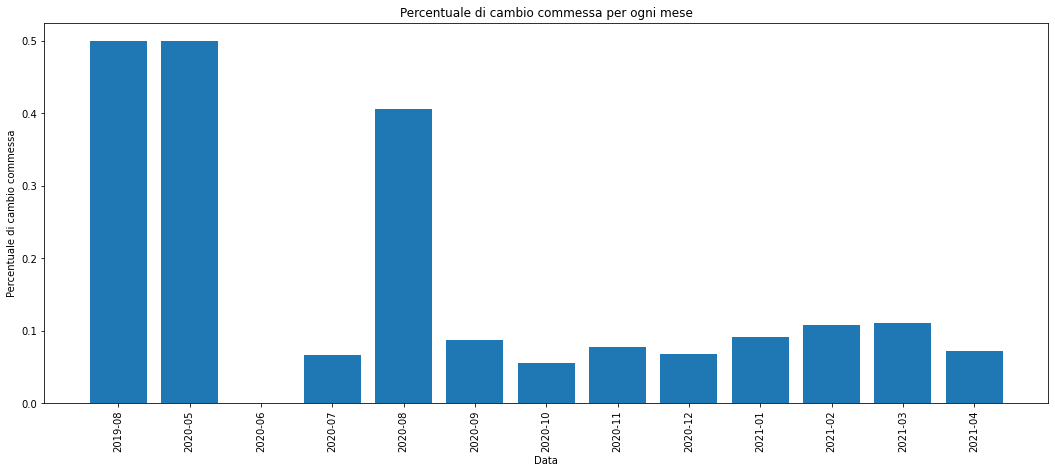

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni mese')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### day-level

In [ ]:
data_group = data3.groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)
result

[('2019-08-29', 0.5),
 ('2020-05-05', 0.5),
 ('2020-06-19', 0.0),
 ('2020-07-01', 0.0),
 ('2020-07-02', 0.0),
 ('2020-07-03', 0.0),
 ('2020-07-06', 0.0),
 ('2020-07-07', 0.2),
 ('2020-07-08', 0.0),
 ('2020-07-09', 0.0),
 ('2020-07-10', 0.25),
 ('2020-07-13', 0.0),
 ('2020-07-14', 0.25),
 ('2020-07-15', 0.0),
 ('2020-07-16', 0.0),
 ('2020-07-17', 0.0),
 ('2020-07-20', 0.0),
 ('2020-07-21', 0.0),
 ('2020-07-22', 0.0),
 ('2020-07-23', 0.0),
 ('2020-07-24', 0.0),
 ('2020-07-27', 0.0),
 ('2020-07-28', 0.0),
 ('2020-07-29', 0.0),
 ('2020-07-30', 0.2),
 ('2020-07-31', 0.2),
 ('2020-08-03', 0.0),
 ('2020-08-04', 0.5),
 ('2020-08-05', 0.3333333333333333),
 ('2020-08-06', 0.0),
 ('2020-08-10', 0.5),
 ('2020-08-12', 0.5),
 ('2020-08-13', 0.5),
 ('2020-08-14', 0.5),
 ('2020-08-18', 0.5),
 ('2020-08-24', 0.5),
 ('2020-08-25', 0.5),
 ('2020-08-27', 0.0),
 ('2020-08-28', 0.0),
 ('2020-08-31', 0.0),
 ('2020-09-01', 0.09558823529411764),
 ('2020-09-02', 0.09848484848484848),
 ('2020-09-03', 0.066666666

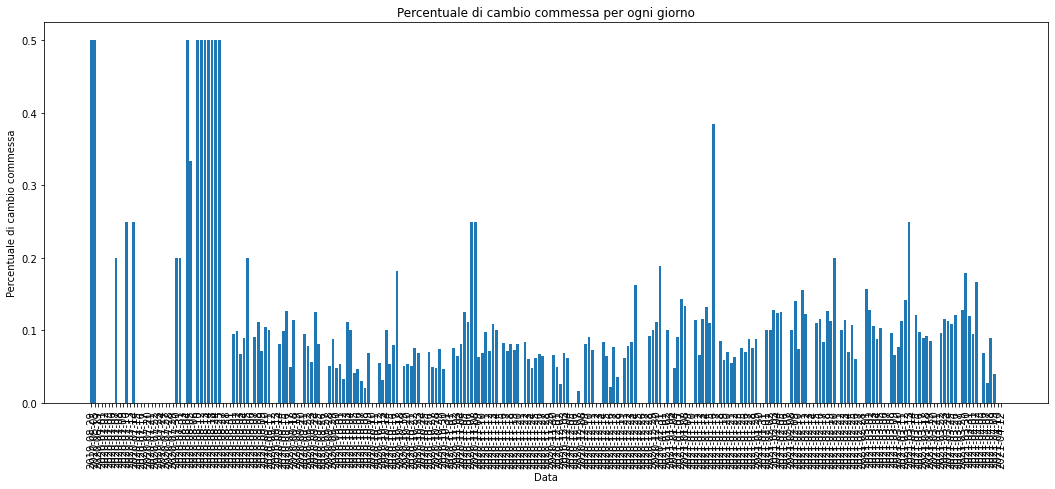

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

### evoluzione della percentuale di errore per alcune persone

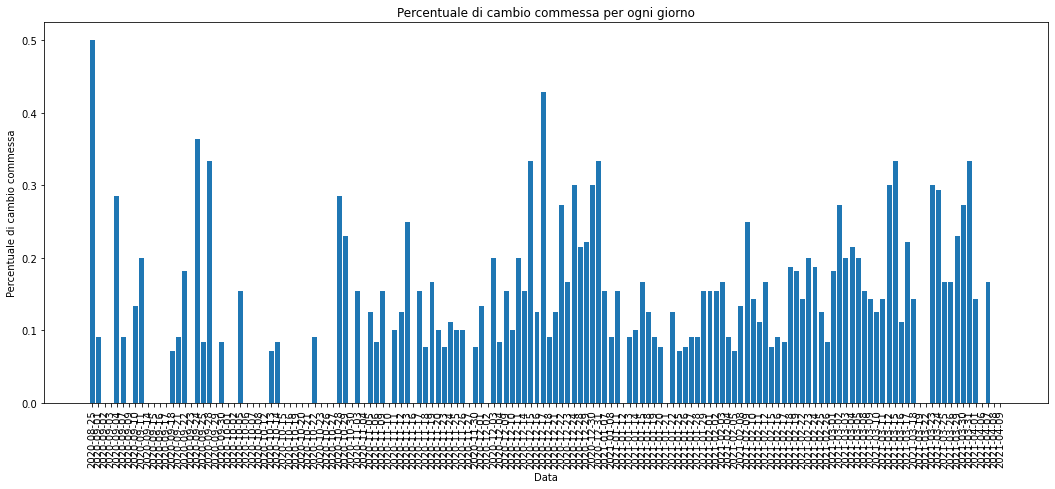

In [ ]:
data_group = data3[data3.resid==1445].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

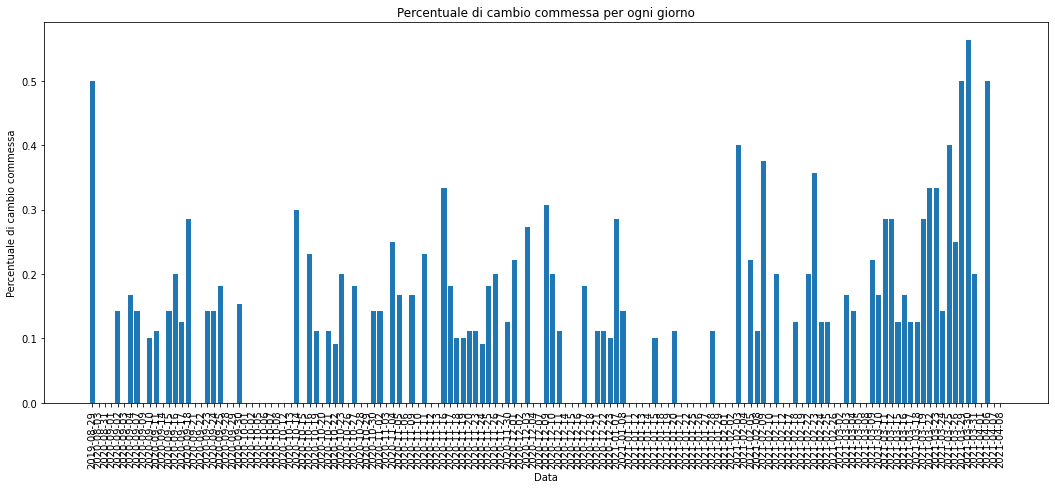

In [ ]:
data_group = data3[data3.resid==367].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

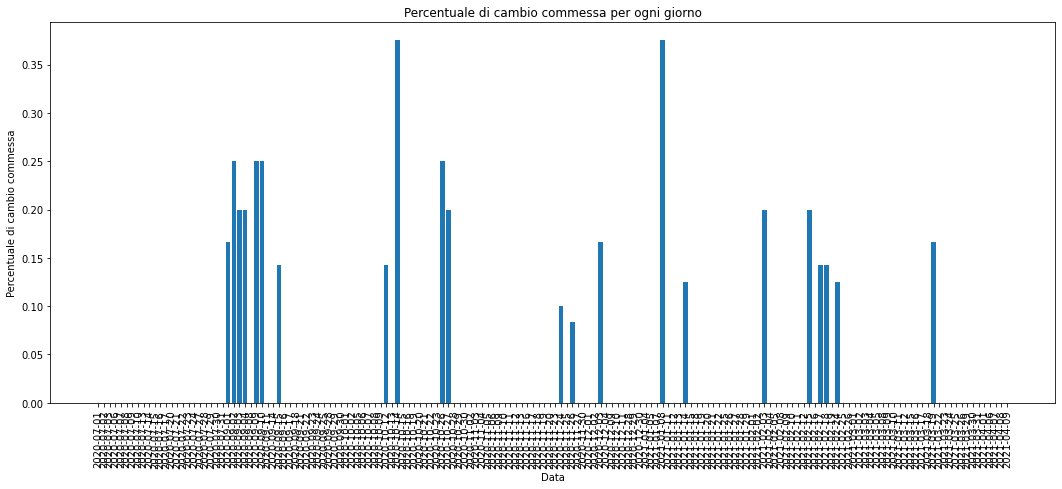

In [ ]:
data_group = data3[data3.resid==320].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

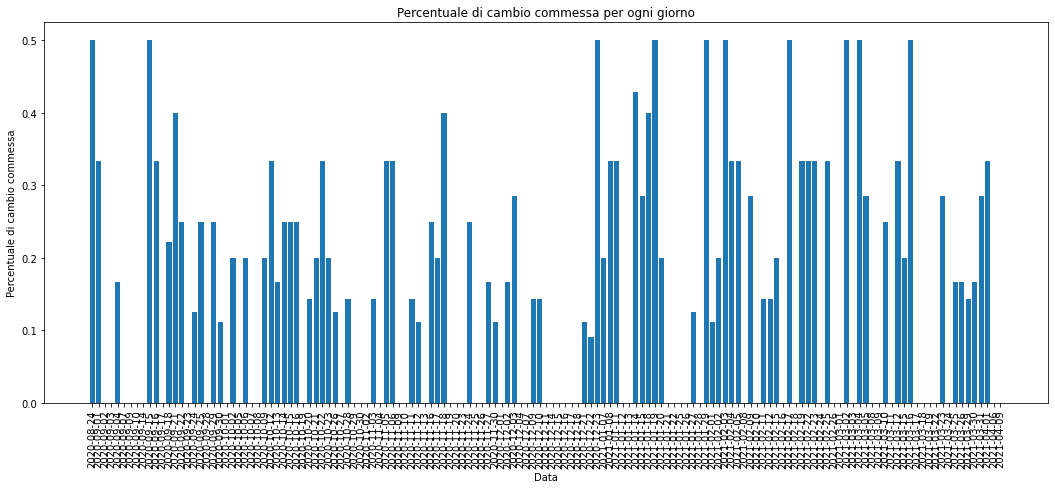

In [ ]:
data_group = data3[data3.resid==339].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

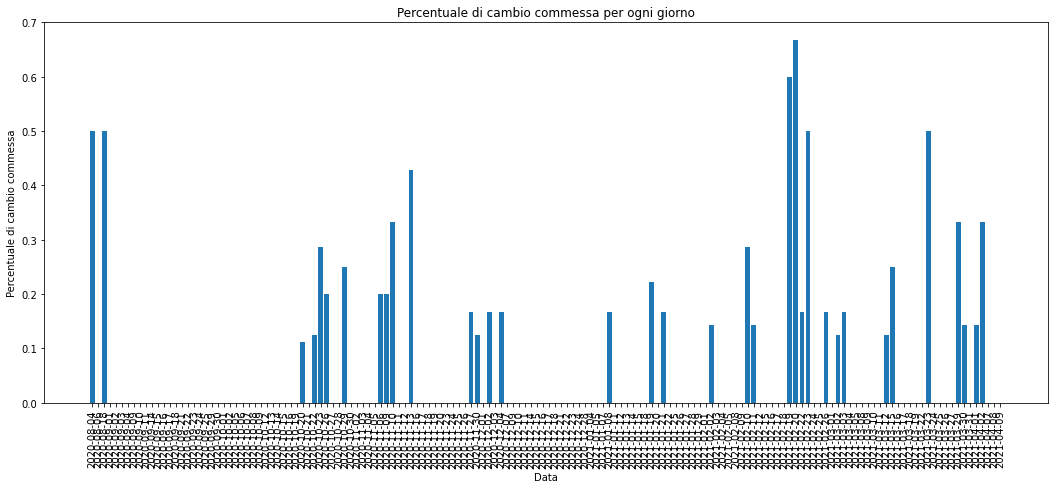

In [ ]:
data_group = data3[data3.resid==369].groupby(['jobtaskdt'])

result = []
for name, group in data_group:
    n_cambio = group[group.tipo_update == 'cambio_commessa'].shape[0]
    result.append((name, n_cambio/group.shape[0]))
    # print(name, n_cambio/group.shape[0])

# result = sorted(result, key=itemgetter(1), reverse=True)
result = sorted(result, key=itemgetter(0), reverse=False)

fig, ax = plt.subplots(figsize=(18,7))
ax.bar(range(len(result)), [r[1] for r in result])
ax.set_ylabel('Percentuale di cambio commessa')
ax.set_xlabel('Data')
ax.set_title(f'Percentuale di cambio commessa per ogni giorno')
ax.set_xticks(np.arange(len(result)))
ax.set_xticklabels([r[0] for r in result], rotation=90)
plt.show()

# Text Analysis

In [ ]:
data = pd.read_csv(datapath + 'dataset/data6.csv')
data[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)
data

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa
22581,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa
22582,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa
22583,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa


In [ ]:
data.dtypes

workdesc              object
jobid                 object
jobtaskid             object
resid                 object
area                  object
custid                object
qty                  float64
sede                  object
day                    int64
delay                  int64
flg_trasferta          int64
pay                    int64
flg_prepagato          int64
flg_straordinario      int64
tipo_update           object
dtype: object

## Analysis of the original text

Print the first 100 descriptions

In [ ]:
for i in range(100):
    # print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print()

Sophos AULSS7

Sophos AULSS7

Test e attivazione Journeys ATO UK ed ATO US.
Analisi metriche Lead Grading.

Call con team IT del cliente per fix problematica Tracker Domain

Analisi problematica configurazione Pardot Tracker Domain e proposta soluzione

Analisi problematiche di configurazione DNS evidenziate dal cliente

UNIFARCO JIRA SERVICE MANAGEMENT

Call con Unifarco per Presentazione Jira Service Management

Cliente FTCOOP
Call con cliente per specifiche DB Aurora + Stima sviluppo PowerBI

riunioen resp

allineamento con Maurizio per TechData

Comunicazioni interne personale Filanda

Migrazione test run di wf/wf11 da 10.15.2.8 ad ODA Nogarole

Ticket #10350391 - BI: DWH - Verifica utilizzo campi tabella F_GIACENZARTPDV (3)
Ticket #10339708 - BI: PROVVIGIONI - Mappatura flusso YCUBOA0F (5) Ticket #10350391 - BI: DWH - Verifica utilizzo campi tabella F_GIACENZARTPDV (3)
Ticket #10339708 - BI: PROVVIGIONI - Mappatura flusso YCUBOA0F (5)

controllo flussi mattutini controllo flussi m

Compute some statistics about the length of the descriptions provided




In [ ]:
def count_words(text):
    # text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    # noise_free_words = [word for word in words if word not in stop_words_punct and not word.isdigit()] 
    # noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    # noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return len(words)

In [ ]:
# data["cleaned_workdesc"] = 
original_words_v = data["workdesc"].apply(lambda s: count_words(s))
original_words_v.describe()

count    22585.000000
mean         8.217977
std         10.038510
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max        198.000000
Name: workdesc, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


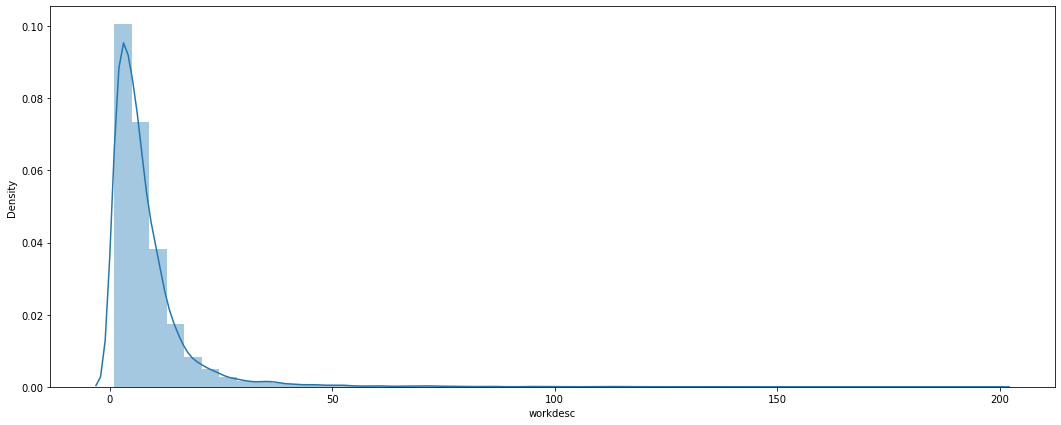

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
_ = sns.distplot(original_words_v)

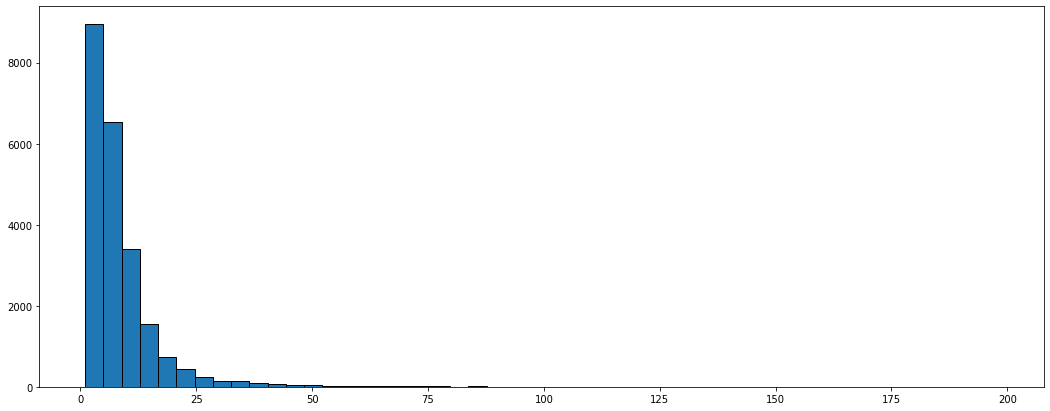

In [ ]:
fig, ax = plt.subplots(figsize=(18,7))
_ = ax.hist(original_words_v, bins=50, edgecolor = 'black')

Compute the total number of different words in the "dictionary"

In [ ]:
words_original = set()
# original_words.update([1,2,1,3])
# words_original
# data["workdesc"]
for i in range(len(data["workdesc"])):
    words_original.update(data["workdesc"][i].lower().split())
print(words_original)
print(f'Total number of different words: {len(words_original)}')

{'https://miriade.atlassian.net/browse/ina-408', 'carta/negozio', 'test+allineamento', 'italiano:', '215362', '"elements"', 'grazie', 'fasce', 'homepage', 'sistemazione', ',gli', '(correzione', 'eta', 'srlope-11', "l'abilitazione", '(ambiente', 'frankfurt', 'clivethome.com', 'sede', 'sdcs-2994', 's12', 'az0tsp-223', 'vecchio)', 'load_dwh_f_immessopdv', '(giulia)', 'diretta,', 'apk', 'mariadb', 'sdi-2600', '(nr.', 'iis', '#10331853', '-preparazione', '_', 'giro', 'developers', 'last', 'storici', 'qp_*', 'd.ronzani', 'center', '"cura', 's.c.p.a.', 'mimnuti', 'connesse', 'command', '10e02', 'venetooutdoor', 'connettività', 'lf', 'formatico', 'endo,', 'seminterrato', 'calendar', '23e25', 'p.s.:massimo', '2021:', '04', 'sentito', 'rhel7', '"media"', 'central.', 'sottoscrizioni', 'duplicate', 'srizzato@unicomm.it', '("inviato', '224235', 'tasca)', 'queste', 'trigger', 'criticità', 'assembler', 'nusico', 'flash', 'screnning', 'cdv', 'sdcd-1357', 'critical:', '03.15', '21.30', 'sdi-1752', 'r.m

So, the original text has more than 20k different terms. 

## Text cleaning

In [ ]:
# Define the ilst of stopwords (both english and italian) and also punctuation marks
stop_words = get_stop_words('it')
stop_words_en = get_stop_words('en')
print(stop_words)
print(stop_words_en)
print(list(punctuation))

# creazione della lista finale 
stop_words = stop_words + ["’"] 
stop_words_punct = stop_words + list(punctuation) + ["’"] 
stop_words_punct_eng = stop_words + stop_words_en + list(punctuation) + ["’"] 

['a', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'ad', 'adesso', 'agl', 'agli', 'ai', 'al', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri', 'altro', 'anche', 'ancora', 'avemmo', 'avendo', 'avere', 'avesse', 'avessero', 'avessi', 'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai', 'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò', 'avuta', 'avute', 'avuti', 'avuto', 'c', 'che', 'chi', 'ci', 'coi', 'col', 'come', 'con', 'contro', 'cui', 'da', 'dagl', 'dagli', 'dai', 'dal', 'dall', 'dalla', 'dalle', 'dallo', 'degl', 'degli', 'dei', 'del', 'dell', 'della', 'delle', 'dello', 'dentro', 'di', 'dov', 'dove', 'e', 'ebbe', 'ebbero', 'ebbi', 'ecco', 'ed', 'era', 'erano', 'eravamo', 'eravate', 'eri', 'ero', 'essendo', 'faccia', 'facciamo', 'facciano', 'facciate', 'faccio', 'facemmo', 'facendo', 'facesse', 'facessero', 'facessi', 'facessimo', 'faceste', 'facesti', 'facev

#### It stopwords

Compute the number of different words after removing punctuations and italian stopwords

In [ ]:
def clean_text_it(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
words_v_it = data["workdesc"].apply(lambda s: clean_text_it(s))
words_v_it

0                                            sophos aulss7
1                                            sophos aulss7
2        test attivazione journeys ato uk ato us analis...
3        call team it cliente fix problematica tracker ...
4        analisi problematica configurazione pardot tra...
                               ...                        
22580                         documentazione flussi kettle
22581                         documentazione flussi kettle
22582                         documentazione flusso kettle
22583    upgrade server qlikview installazione componen...
22584                sistemazione collegamento server qlik
Name: workdesc, Length: 22585, dtype: object

In [ ]:
words_it = set()
for i in range(len(words_v_it)):
    words_it.update(words_v_it[i].lower().split())
print(words_it)
print(f'Total number of different words: {len(words_it)}')

{'capabilities', 'twine', 'sbloccarla', 'sicuro', 'girare', 'picker', 'xcv', 'miglioramenti', 'grazie', 'importazione', 'schedulata', 'fasce', 'welcome', 'homepage', 'rispettano', 'entrati', 'capitolati', 'opt', 'qtaconsumiresidualivelli', 'testcasellacollaborativa', 'sistemazione', 'coach', 'eta', 'attiità', 'frankfurt', 'tasca', 'mirsci', 'bolzano', 'recapp', 'damiano', 'ses', 'unito', 'sede', 'antispoof', 'wiki', 'paloalto', 's12', 'accountment', 'autodesk', 'riuscita', 'fil', 'catlog', 'caso', 'intragrazione', 'margherita', 'intersystem', 'poteri', 'allargamento', 'wunderman', 'condcomm', 'certificato', 'amer', 'lotus', 'fluentd', 'csr', 'apk', 'mariadb', 'months', 'cross', 'teams', 'clone', 'mmg', 'maiuscolo', 'tuning', 'emr', 'grafica', 'bft', 'attesa', 'farmi', 'iis', 'oggetto', 'vedono', 'sintra', 'pcielo', 'quotes', 'revoca', 'transit', 'calaon', 'caludio', 'pfferta', 'carturan', 'caffe', 'ca', 'rvvm5002pw', 'tessuti', 'riposo', '9pcy8h2', 'transformation', 'giro', 'developers

#### It stopwords + additional punct

Compute the number of different words after removing punctuation and italian stopwords and additional punctuation

In [ ]:
def clean_text_itp(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
words_v_itp = data["workdesc"].apply(lambda s: clean_text_itp(s))
words_v_itp

0                                            sophos aulss7
1                                            sophos aulss7
2        test attivazione journeys ato uk ato us analis...
3        call team it cliente fix problematica tracker ...
4        analisi problematica configurazione pardot tra...
                               ...                        
22580                         documentazione flussi kettle
22581                         documentazione flussi kettle
22582                         documentazione flusso kettle
22583    upgrade server qlikview installazione componen...
22584                sistemazione collegamento server qlik
Name: workdesc, Length: 22585, dtype: object

In [ ]:
words_itp = set()
for i in range(len(words_v_itp)):
    words_itp.update(words_v_itp[i].lower().split())
print(words_itp)
print(f'Total number of different words: {len(words_itp)}')

{'capabilities', 'twine', 'sbloccarla', 'sicuro', 'girare', 'picker', 'xcv', 'miglioramenti', 'grazie', 'importazione', 'schedulata', 'fasce', 'welcome', 'homepage', 'rispettano', 'entrati', 'capitolati', 'opt', 'qtaconsumiresidualivelli', 'testcasellacollaborativa', 'sistemazione', 'coach', 'eta', 'attiità', 'frankfurt', 'tasca', 'mirsci', 'bolzano', 'recapp', 'damiano', 'ses', 'unito', 'sede', 'antispoof', 'wiki', 'paloalto', 's12', 'accountment', 'autodesk', 'riuscita', 'fil', 'catlog', 'caso', 'intragrazione', 'margherita', 'intersystem', 'poteri', 'allargamento', 'wunderman', 'condcomm', 'certificato', 'amer', 'lotus', 'fluentd', 'csr', 'apk', 'mariadb', 'months', 'cross', 'teams', 'clone', 'mmg', 'maiuscolo', 'tuning', 'emr', 'grafica', 'bft', 'attesa', 'farmi', 'iis', 'oggetto', 'vedono', 'sintra', 'pcielo', 'quotes', 'revoca', 'transit', 'calaon', 'caludio', 'pfferta', 'carturan', 'caffe', 'ca', 'rvvm5002pw', 'tessuti', 'riposo', '9pcy8h2', 'transformation', 'giro', 'developers

#### It + eng stopwords

Compute the number of different words after removing punctuations and both italian and english stopwords

In [ ]:
def clean_text_iteng(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
words_v_iteng = data["workdesc"].apply(lambda s: clean_text_iteng(s))
words_v_iteng

0                                            sophos aulss7
1                                            sophos aulss7
2        test attivazione journeys ato uk ato us analis...
3        call team cliente fix problematica tracker domain
4        analisi problematica configurazione pardot tra...
                               ...                        
22580                         documentazione flussi kettle
22581                         documentazione flussi kettle
22582                         documentazione flusso kettle
22583    upgrade server qlikview installazione componen...
22584                sistemazione collegamento server qlik
Name: workdesc, Length: 22585, dtype: object

In [ ]:
words_iteng = set()
for i in range(len(words_v_iteng)):
    words_iteng.update(words_v_iteng[i].lower().split())
print(words_iteng)
print(f'Total number of different words: {len(words_iteng)}')

{'capabilities', 'twine', 'sbloccarla', 'sicuro', 'girare', 'picker', 'xcv', 'miglioramenti', 'grazie', 'importazione', 'schedulata', 'fasce', 'welcome', 'homepage', 'rispettano', 'entrati', 'capitolati', 'opt', 'qtaconsumiresidualivelli', 'testcasellacollaborativa', 'sistemazione', 'coach', 'eta', 'attiità', 'frankfurt', 'tasca', 'mirsci', 'bolzano', 'recapp', 'damiano', 'ses', 'unito', 'sede', 'antispoof', 'wiki', 'paloalto', 's12', 'accountment', 'autodesk', 'riuscita', 'fil', 'catlog', 'caso', 'intragrazione', 'margherita', 'intersystem', 'poteri', 'allargamento', 'wunderman', 'condcomm', 'certificato', 'amer', 'lotus', 'fluentd', 'csr', 'apk', 'mariadb', 'months', 'cross', 'teams', 'clone', 'mmg', 'maiuscolo', 'tuning', 'emr', 'grafica', 'bft', 'attesa', 'farmi', 'iis', 'oggetto', 'vedono', 'sintra', 'pcielo', 'quotes', 'revoca', 'transit', 'calaon', 'caludio', 'pfferta', 'carturan', 'caffe', 'ca', 'rvvm5002pw', 'tessuti', 'riposo', '9pcy8h2', 'transformation', 'giro', 'developers

#### It + eng stopwords + urls

Compute the number of different words after removing punctuations and both italian and english stopwords

In [ ]:
def clean_text_iteng_url(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
words_v_iteng_url = data["workdesc"].apply(lambda s: clean_text_iteng_url(s))
# words_v_iteng_url
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(words_v_iteng_url[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- CLEANED ---
dichiarazione esclusività gara studio confronto

--- ORIGINAL ---
rev informativa per marketing
--- CLEANED ---
rev informativa marketing

--- ORIGINAL ---
fatturazione
--- CLEANED ---
fatturazione

--- ORIGINAL ---
studio osint, webint e GDPR
--- CLEANED ---
studio osint webint gdpr

--- ORIGINAL ---
rev accordi infragruppo di nomina a responsabile
--- CLEANED ---
rev accordi infragruppo nomina responsabile

--- ORIGINAL ---
Presentazione gare ulss 7 e Logzio
--- CLEANED ---
presentazione gare ulss logzio

--- ORIGINAL ---
BFT iot e BFT parking call confronto progetti 
--- CLEANED ---
bft iot bft parking call confronto progetti

--- ORIGINAL ---
rvecultura e maxmara denodo
--- CLEANED ---
rvecultura maxmara denodo

--- ORIGINAL ---
call con sonepar
--- CLEANED ---
call sonepar

--- ORIGINAL ---
revisione e implementazione valutazione del rischio + formazione sulla metodologia
--- CLEANED ---
revisione implementazione va

In [ ]:
words_iteng_url = set()
for i in range(len(words_v_iteng_url)):
    words_iteng_url.update(words_v_iteng_url[i].lower().split())
print(words_iteng_url)
print(f'Total number of different words: {len(words_iteng_url)}')

{'capabilities', 'twine', 'sbloccarla', 'sicuro', 'girare', 'picker', 'xcv', 'miglioramenti', 'grazie', 'importazione', 'schedulata', 'fasce', 'welcome', 'homepage', 'rispettano', 'entrati', 'capitolati', 'opt', 'qtaconsumiresidualivelli', 'testcasellacollaborativa', 'sistemazione', 'coach', 'eta', 'attiità', 'frankfurt', 'tasca', 'mirsci', 'bolzano', 'recapp', 'damiano', 'ses', 'unito', 'sede', 'antispoof', 'wiki', 'paloalto', 's12', 'accountment', 'autodesk', 'riuscita', 'fil', 'catlog', 'caso', 'intragrazione', 'margherita', 'intersystem', 'poteri', 'allargamento', 'wunderman', 'condcomm', 'certificato', 'amer', 'lotus', 'fluentd', 'csr', 'apk', 'mariadb', 'months', 'cross', 'teams', 'clone', 'mmg', 'maiuscolo', 'tuning', 'emr', 'grafica', 'bft', 'attesa', 'farmi', 'iis', 'oggetto', 'vedono', 'sintra', 'pcielo', 'quotes', 'revoca', 'transit', 'calaon', 'caludio', 'pfferta', 'carturan', 'caffe', 'ca', 'rvvm5002pw', 'tessuti', 'riposo', '9pcy8h2', 'transformation', 'giro', 'developers

#### It + eng stopwords + urls + mail

Compute the number of different words after removing punctuations and both italian and english stopwords

In [ ]:
def clean_text_iteng_url_mail(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("(\S*@\S*\s)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_text = " ".join(noise_free_words) 
    return noise_free_text

In [ ]:
words_v_iteng_url_mail = data["workdesc"].apply(lambda s: clean_text_iteng_url_mail(s))
# words_v_iteng_url
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(words_v_iteng_url_mail[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- CLEANED ---
dichiarazione esclusività gara studio confronto

--- ORIGINAL ---
rev informativa per marketing
--- CLEANED ---
rev informativa marketing

--- ORIGINAL ---
fatturazione
--- CLEANED ---
fatturazione

--- ORIGINAL ---
studio osint, webint e GDPR
--- CLEANED ---
studio osint webint gdpr

--- ORIGINAL ---
rev accordi infragruppo di nomina a responsabile
--- CLEANED ---
rev accordi infragruppo nomina responsabile

--- ORIGINAL ---
Presentazione gare ulss 7 e Logzio
--- CLEANED ---
presentazione gare ulss logzio

--- ORIGINAL ---
BFT iot e BFT parking call confronto progetti 
--- CLEANED ---
bft iot bft parking call confronto progetti

--- ORIGINAL ---
rvecultura e maxmara denodo
--- CLEANED ---
rvecultura maxmara denodo

--- ORIGINAL ---
call con sonepar
--- CLEANED ---
call sonepar

--- ORIGINAL ---
revisione e implementazione valutazione del rischio + formazione sulla metodologia
--- CLEANED ---
revisione implementazione va

In [ ]:
words_iteng_url_mail = set()
for i in range(len(words_v_iteng_url_mail)):
    words_iteng_url_mail.update(words_v_iteng_url_mail[i].lower().split())
print(words_iteng_url_mail)
print(f'Total number of different words: {len(words_iteng_url_mail)}')

{'2h', 'analizzando', 'opera', 'rda', 'user600o', 'dalquery', 'myp3', 'samba', 'stuls', 'highlights', 'tunnel2', 'sorte', 'carel', 'riello', 'gdpr', 'riguardanti', 'seo', 'erogazione', 'destinazione', 'servicedesk', 'aovr', 'kube', 'pubblicati', 'estrarre', 'valore', 'spetta', 'suapgate', 'legato', 'collisgroup', '47annodomini', 'uk', 'platinum', 'control', 'intellettuale', 'approvati', 'cielo', 'diagnostica', 'update', 'avocato', 'car38', 'descriferestordforn', 'giacenzartpdv', 'midstandup', 'aumentata', 'd5prod', 'lavorato', 'val', 'roberta', 'review20', 'benintra', 'soave', 'personali', 'geocodifica', 'revisone', 'datacol', 'analizzato', 'bernkopf', 'almeno', 'scalata', 'carte', 'repliche', 'viveracqua', 'vp', 'anticipato', 'standardizzazione', 'pgadmin4', 'passa', 'richiedi', 'aggiuntiva', 'codmagazdest', 'sostenibile', 'aggirare', 'el', 'stornoordforn', 'garante', 'decoding', 'vendite', 'azr', 'twineapp', 'wmi', 'plans', 'wms', 'contesto', 'meccanismo', 'km', 'testato', 'corp', 'r

#### Stemming

In [ ]:
stemmer = SnowballStemmer("italian")

def clean_text(text):
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return noise_free_text

In [ ]:
data["cleaned_workdesc"] = data["workdesc"].apply(lambda s: clean_text(s))
data

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,cleaned_workdesc
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa,sophos aulss7
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa,sophos aulss7
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato,test attiv journeys ato uk ato us analis metri...
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato,call team client fix problemat tracker domain
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato,analis problemat configur pardot tracker domai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa,document fluss kettl
22581,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa,document fluss kettl
22582,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa,document fluss kettl
22583,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa,upgrad server qlikview install component python


In [ ]:
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(data.cleaned_workdesc[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- CLEANED ---
dichiar esclus gar stud confront

--- ORIGINAL ---
rev informativa per marketing
--- CLEANED ---
rev inform marketing

--- ORIGINAL ---
fatturazione
--- CLEANED ---
fattur

--- ORIGINAL ---
studio osint, webint e GDPR
--- CLEANED ---
stud osint webint gdpr

--- ORIGINAL ---
rev accordi infragruppo di nomina a responsabile
--- CLEANED ---
rev accord infragrupp nomin respons

--- ORIGINAL ---
Presentazione gare ulss 7 e Logzio
--- CLEANED ---
present gar ulss logz

--- ORIGINAL ---
BFT iot e BFT parking call confronto progetti 
--- CLEANED ---
bft iot bft parking call confront progett

--- ORIGINAL ---
rvecultura e maxmara denodo
--- CLEANED ---
rvecultur maxmar denod

--- ORIGINAL ---
call con sonepar
--- CLEANED ---
call sonep

--- ORIGINAL ---
revisione e implementazione valutazione del rischio + formazione sulla metodologia
--- CLEANED ---
revision implement valut risc formazion metodolog

--- ORIGINAL ---
allineamento

Let's compute some statistics after cleaning the text

In [ ]:
stems_v = data["cleaned_workdesc"].apply(lambda s: count_words(s))
stems_v.describe()

count    22585.000000
mean         6.388931
std          7.449736
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        152.000000
Name: cleaned_workdesc, dtype: float64

In [ ]:
stems = set()
for i in range(len(data["cleaned_workdesc"])):
    stems.update(data["cleaned_workdesc"][i].lower().split())
print(stems)
print(f'Total number of different words: {len(stems)}')

{'capabilities', 'quaranten', 'picker', 'xcv', 'adozion', 'propriet', 'opt', 'pieranton', 'eta', 'andat', 'frankfurt', 'salvatgg', 'recapp', 'ses', 'conclus', 'predisposizion', 'antispoof', 'billett', 's12', 'accountment', 'autodesk', 'fil', 'catlog', 'strateg', 'casist', 'leandr', 'cooper', 'healthresearc', 'intersystem', 'loredan', 'wunderman', 'condcomm', 'concert', 'amer', 'leas', 'lotus', 'fluentd', 'csr', 'apk', 'telecam', 'aggiungent', 'mariadb', 'months', 'cross', 'teams', 'disatt', 'mmg', 'diabet', 'tuning', 'emr', 'sourc', 'bft', 'ventennal', 'iis', 'strorinar', 'quotes', 'transit', 'aziendazer', 'calaon', 'verones', 'carturan', 'caffe', 'ca', 'ennialuc', 'rvvm5002pw', 'voc', '9pcy8h2', 'transformation', 'developers', 'jdk', 'last', 'discors', 'packag', 'gg', 'insufficient', '20can', 'tde', 'healthinnovationchalleng', 'mep', 'handl', 'sell', 'center', 'lnk', 'vivipass', 'installazioen', 'chiss', 'annachiar', 'orchestr', 'logic', 'twineapp', 'spaziatur', 'command', '10e02', 'i

#### Stemming - url - mail

In [ ]:
stemmer = SnowballStemmer("italian")

def clean_text(text):
    text = re.sub("(\w+:\/\/\S+)", " ", text)
    text = re.sub("(\S*@\S*\s)", " ", text)
    text = re.sub("[\.\,\!\?\:\;\-\=\'\...\"\@\#\_!#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]", " ", text)
    words = text.lower()
    words = words.split()
    # noise_free_words = [word for word in words if word not in stop_words_punct] 
    # noise_free_words = [word for word in words if word not in stop_words and not word.isdigit()] 
    noise_free_words = [word for word in words if word not in stop_words_punct_eng and not word.isdigit()] 
    noise_free_words = [stemmer.stem(w) for w in noise_free_words]
    noise_free_text = " ".join(noise_free_words) 
    # return noise_free_words
    return noise_free_text

In [ ]:
data["cleaned_workdesc"] = data["workdesc"].apply(lambda s: clean_text(s))
data

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,cleaned_workdesc
0,Sophos AULSS7,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa,sophos aulss7
1,Sophos AULSS7,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa,sophos aulss7
2,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato,test attiv journeys ato uk ato us analis metri...
3,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato,call team client fix problemat tracker domain
4,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato,analis problemat configur pardot tracker domai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa,document fluss kettl
22581,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa,document fluss kettl
22582,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa,document fluss kettl
22583,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa,upgrad server qlikview install component python


In [ ]:
for i in range(1000):
    print('--- ORIGINAL ---')
    print(data.workdesc[i])
    print('--- CLEANED ---')
    print(data.cleaned_workdesc[i])
    print()

Output streaming troncato alle ultime 5000 righe.
--- CLEANED ---
dichiar esclus gar stud confront

--- ORIGINAL ---
rev informativa per marketing
--- CLEANED ---
rev inform marketing

--- ORIGINAL ---
fatturazione
--- CLEANED ---
fattur

--- ORIGINAL ---
studio osint, webint e GDPR
--- CLEANED ---
stud osint webint gdpr

--- ORIGINAL ---
rev accordi infragruppo di nomina a responsabile
--- CLEANED ---
rev accord infragrupp nomin respons

--- ORIGINAL ---
Presentazione gare ulss 7 e Logzio
--- CLEANED ---
present gar ulss logz

--- ORIGINAL ---
BFT iot e BFT parking call confronto progetti 
--- CLEANED ---
bft iot bft parking call confront progett

--- ORIGINAL ---
rvecultura e maxmara denodo
--- CLEANED ---
rvecultur maxmar denod

--- ORIGINAL ---
call con sonepar
--- CLEANED ---
call sonep

--- ORIGINAL ---
revisione e implementazione valutazione del rischio + formazione sulla metodologia
--- CLEANED ---
revision implement valut risc formazion metodolog

--- ORIGINAL ---
allineamento

Let's compute some statistics after cleaning the text

In [ ]:
stems_v = data["cleaned_workdesc"].apply(lambda s: count_words(s))
stems_v.describe()

count    22585.000000
mean         6.284569
std          7.274549
min          0.000000
25%          3.000000
50%          4.000000
75%          8.000000
max        152.000000
Name: cleaned_workdesc, dtype: float64

In [ ]:
stems = set()
for i in range(len(data["cleaned_workdesc"])):
    stems.update(data["cleaned_workdesc"][i].lower().split())
print(stems)
print(f'Total number of different words: {len(stems)}')

{'2h', 'rda', 'circ', 'dalquery', 'myp3', 'searc', 'stuls', 'highlights', 'tunnel2', 'carel', 'gdpr', 'bastoncin', 'slav', 'seo', 'servicedesk', 'voc', 'aovr', 'collisgroup', 'uk', 'platinum', 'control', 'padov', 'normat', 'car38', 'descriferestordforn', 'giacenzartpdv', 'midstandup', 'perven', 'd5prod', 'val', 'review20', 'rigett', 'derom', 'datacol', 'bernkopf', 'togniziol', 'vp', 'pgadmin4', 'codmagazdest', 'convert', 'el', 'stornoordforn', 'zeeb', 'decoding', 'estrapol', 'azr', 'anal', 'twineapp', 'wmi', 'scontrin', 'ten', 'plans', 'wms', 'cuff', 'km', 'corp', 'ottic', 'tac', 'starter', 'contab', 'sic', '1677your', 'zookeeper', 'caratt', 'retevendcod', 'friction', 'agganc', 'meet', 'mmg', 'ked', 'multipath', 'vincol', 'sql', 'checklist', 'nic', 'paid', 'tomcat', 'campagn', 'dirv', 'lifecycl', 'working', 'alfabet', 'minor', 'y5fboa0f', 'keyuser', 'footer', 'machin', '°', 'mirnas01', 'alphsregrh01', 'hprd', 'scadenz', 'arretr', 'c04', 'tooltip', 'ons', 'kb5001028', 'semil', 'implic',

In [ ]:
data.to_csv(datapath + 'dataset/data7.csv', index=False)

## Analysis of cleaned text

In [ ]:
tot_stems = []
for d in data.cleaned_workdesc:
    tot_stems = tot_stems + d.split()
tot_stems[:10]

['sophos',
 'aulss7',
 'sophos',
 'aulss7',
 'test',
 'attiv',
 'journeys',
 'ato',
 'uk',
 'ato']

In [ ]:
print(f'Total number of stems counted with multiplicity: {len(tot_stems)}')
print(f'Total number of distinct stems: {len(set(tot_stems))}')

Total number of stems counted with multiplicity: 141937
Total number of distinct stems: 8314


In [ ]:
count_word = Counter(tot_stems)

In [ ]:
# Less frequent stems
less_freq = dict(sorted(count_word.items(), key=lambda item: item[1], reverse=False))
less_freq

{'journeys': 1,
 'grading': 1,
 'riunioen': 1,
 'techd': 1,
 'wf11': 1,
 'nogarol': 1,
 'datacatalog': 1,
 'boardding': 1,
 'zeplin': 1,
 'vica01': 1,
 'vica02': 1,
 'vica03': 1,
 'vil01': 1,
 'vil02': 1,
 'preparzion': 1,
 'plant': 1,
 'std': 1,
 'wild': 1,
 'vac1': 1,
 'auotm': 1,
 'calerndar': 1,
 'leads': 1,
 'fatur': 1,
 'osint': 1,
 'webint': 1,
 'infragrupp': 1,
 'rvecultur': 1,
 'maxmar': 1,
 'sonep': 1,
 't3a': 1,
 'riemission': 1,
 'smtcollector': 1,
 'talent4gig': 1,
 'bas01': 1,
 'bas02': 1,
 'basof1': 1,
 'basof2': 1,
 'basof3': 1,
 'sch05': 1,
 'riccolleg': 1,
 'desider': 1,
 'quotidian': 1,
 'dataflows': 1,
 'aprile⋅11': 1,
 '00pm': 1,
 '©': 1,
 'harmout': 1,
 'dominiofrechell': 1,
 'brendol': 1,
 'mosaic': 1,
 'fond': 1,
 'legittim': 1,
 'aggir': 1,
 'disclaimer': 1,
 'maant': 1,
 'gratu': 1,
 'libs': 1,
 'strarodianr': 1,
 'aod': 1,
 'openlookeng': 1,
 'biag': 1,
 'internetstores': 1,
 'upport': 1,
 'fonderiedimontors': 1,
 'trevisan': 1,
 'cu': 1,
 'hit': 1,
 'knonote

In [ ]:
# More frequent stems
most_freq = dict(sorted(count_word.items(), key=lambda item: item[1], reverse=True))
most_freq

{'ticket': 3343,
 'gestion': 2162,
 'allin': 1830,
 'progett': 1606,
 'aws': 1583,
 'bi': 1561,
 'attiv': 1548,
 'call': 1440,
 'miriad': 1401,
 'sr': 1353,
 'formazion': 1101,
 'sdcs': 1002,
 'test': 987,
 'analis': 987,
 'nuov': 972,
 'incident': 903,
 'verif': 887,
 'problem': 851,
 'support': 837,
 'client': 772,
 'prepar': 732,
 'creazion': 732,
 'svilupp': 710,
 'dat': 704,
 'tkt': 702,
 'salesforc': 683,
 'cors': 632,
 'intern': 625,
 'aggiorn': 622,
 'controll': 606,
 'presid': 605,
 'configur': 598,
 'fluss': 581,
 'document': 569,
 'cloud': 561,
 'sdi': 551,
 'riunion': 551,
 'utent': 537,
 'produzion': 532,
 'stud': 496,
 'richiest': 494,
 'aggiunt': 478,
 'error': 474,
 'migrazion': 452,
 'rilasc': 417,
 'present': 412,
 'modif': 411,
 'ambient': 408,
 'sistem': 405,
 'jir': 401,
 'report': 397,
 'account': 392,
 'db': 388,
 'unicomm': 380,
 'mail': 378,
 'lavor': 374,
 'googl': 372,
 'commercial': 364,
 'plenar': 352,
 'marketing': 349,
 'webin': 348,
 'offic': 343,
 'revi

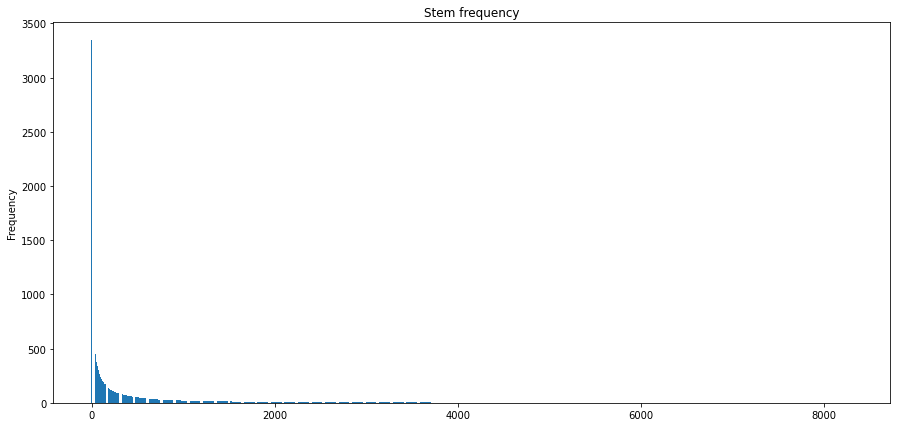

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(len(most_freq)), most_freq.values())
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
# ax.set_xticks(np.arange(len(most_freq)))
# ax.set_xticklabels(i)
plt.show()

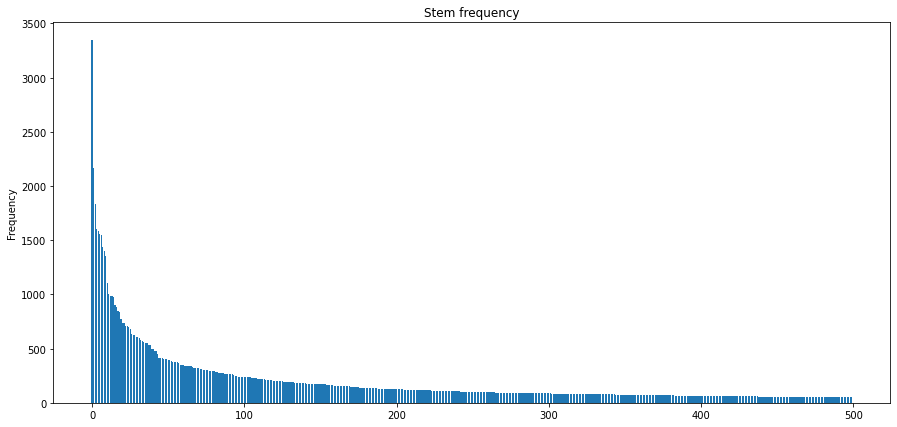

In [ ]:
# Frequency of the 500 most frequent stems

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(500), list(most_freq.values())[:500])
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
# ax.set_xticks(np.arange(500))
# ax.set_xticklabels(i)
plt.show()

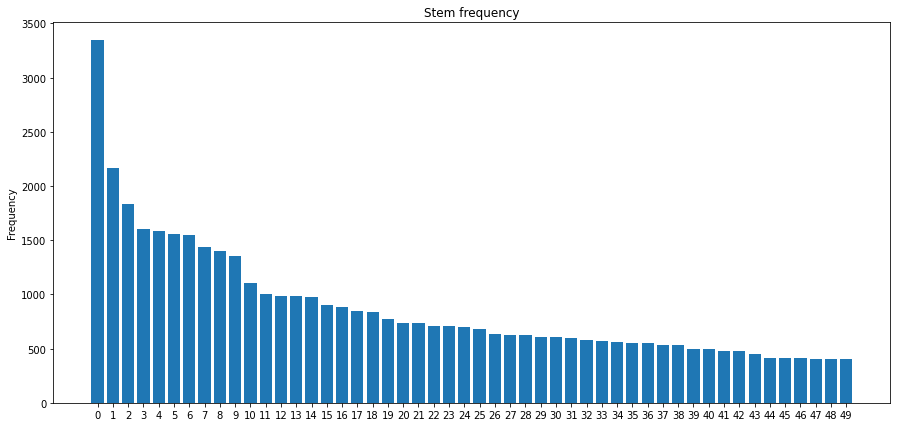

In [ ]:
# Frequency of the 50 most frequent stems

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(50), list(most_freq.values())[:50])
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
ax.set_xticks(np.arange(50))
# ax.set_xticklabels(i)
plt.show()

In [ ]:
# On average, a stem appears in 17 rapportini
pd.Series(most_freq.values()).describe()

count    8314.000000
mean       17.072047
std        86.036861
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      3343.000000
dtype: float64

In [ ]:
# A common choice is to drop the stems which are present in less than 5% of the documents.
# Compute 5 % of the number of documents
0.05 * len(data)

1129.25

So, using this idea, we should get rid of the terms with a frequency smaller than 1129 documents.

However, in this case, the stems are much less frequent. Let's check some quantiles of the distribution in our case

In [ ]:
# Only 10 stems are present in more than 1101 documents (~5% of texts)
# The other way around: the stems present in more than 1101 documents are only 10
list(most_freq.values())[10]

1101

In [ ]:
# Only 50 stems are present in more than 397 documents
list(most_freq.values())[50]

397

In [ ]:
# Only 100 stems are present in more than 240 documents
list(most_freq.values())[100]

240

In [ ]:
# Only 300 stems are present in more than 86 documents
list(most_freq.values())[300]

86

In [ ]:
# Only 500 stems are present in more than 50 documents
list(most_freq.values())[500]

50

In [ ]:
# Only 750 stems are present in more than 30 documents
list(most_freq.values())[750]

30

In [ ]:
list(most_freq.values())[1000]

21

Change perspective: count the frequency of each frequence (LOL)

In [ ]:
s = pd.Series(count_word.values())
s

0        238
1         12
2        987
3       1548
4          1
        ... 
8309       1
8310       1
8311       1
8312       1
8313       1
Length: 8314, dtype: int64

In [ ]:
s.value_counts()

1       3379
2       1210
3        617
4        405
5        254
        ... 
108        1
100        1
84         1
903        1
1583       1
Length: 275, dtype: int64

In [ ]:
sum(s.value_counts())

8314

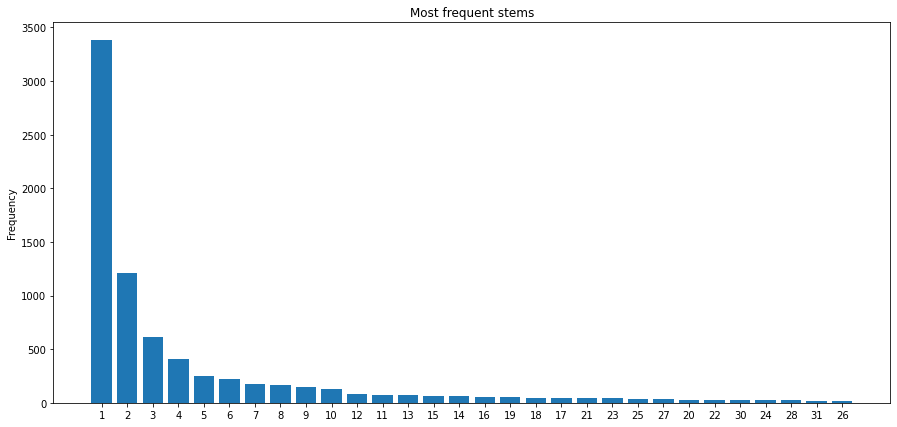

In [ ]:
vc = s.value_counts()

v = vc[:30].values
i = vc[:30].index

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(30), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Most frequent stems')
ax.set_xticks(np.arange(30))
ax.set_xticklabels(i)
plt.show()

There are 3379 terms that are present in only 1 document

There are 1210 terms that are present in only 2 documents...

#### Class distintion

In [ ]:
desc_app = data.cleaned_workdesc[data.tipo_update == 'approvato']
app = []
for d in desc_app:
    app = app + d.split()
# [d.split() for d in desc_app]
app[:10]

['test',
 'attiv',
 'journeys',
 'ato',
 'uk',
 'ato',
 'us',
 'analis',
 'metric',
 'lead']

In [ ]:
desc_cambio = data.cleaned_workdesc[data.tipo_update == 'cambio_commessa']
cambio = []
for d in desc_cambio:
    cambio = cambio + d.split()
# [d.split() for d in desc_app]
cambio[:10]

['sophos',
 'aulss7',
 'sophos',
 'aulss7',
 'ricerc',
 'soluzion',
 'integr',
 'typeform',
 'wordpress',
 'python']

In [ ]:
stems_app = set(app)
len(stems_app)

7968

In [ ]:
stems_cambio = set(cambio)
len(stems_cambio)

2322

In [ ]:
most_freq_s = pd.Series(most_freq)
top300 = set(most_freq_s[:300].index)
top500 = set(most_freq_s[:500].index)
top750 = set(most_freq_s[:750].index)

In [ ]:
print(f'Among the 300 most frequent stems, {len(top300 & stems_app)} are present in the approvato class')
print(f'Among the 500 most frequent stems, {len(top500 & stems_app)} are present in the approvato class')
print(f'Among the 750 most frequent stems, {len(top750 & stems_app)} are present in the approvato class')

Among the 300 most frequent stems, 300 are present in the approvato class
Among the 500 most frequent stems, 500 are present in the approvato class
Among the 750 most frequent stems, 750 are present in the approvato class


In [ ]:
print(f'Among the 300 most frequent stems, {len(top300 & stems_cambio)} are present in the cambio_commessa class')
print(f'Among the 500 most frequent stems, {len(top500 & stems_cambio)} are present in the cambio_commessa class')
print(f'Among the 750 most frequent stems, {len(top750 & stems_cambio)} are present in the cambio_commessa class')

Among the 300 most frequent stems, 282 are present in the cambio_commessa class
Among the 500 most frequent stems, 465 are present in the cambio_commessa class
Among the 750 most frequent stems, 669 are present in the cambio_commessa class


In [ ]:
count_word_app = Counter(app)
count_word_cambio = Counter(cambio)

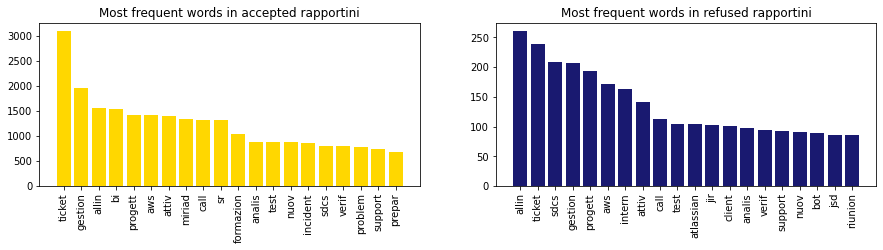

In [ ]:
N = 20

plt.figure(figsize=(15, 3))

plt.subplot(121)
plt.title("Most frequent words in accepted rapportini".format(N))
plt.bar(*zip(*count_word_app.most_common(N)), color="gold")
plt.xticks(rotation="vertical")

plt.subplot(122)
plt.title("Most frequent words in refused rapportini".format(N))
plt.bar(*zip(*count_word_cambio.most_common(N)), color="midnightblue")
plt.xticks(rotation="vertical")

plt.show()

In [ ]:
most_freq_s[most_freq_s>1000]

ticket       3343
gestion      2162
allin        1830
progett      1606
aws          1583
bi           1561
attiv        1548
call         1440
miriad       1401
sr           1353
formazion    1101
sdcs         1002
dtype: int64

In [ ]:
len(list(set(cambio) - set(app)))

346

In [ ]:
only_cambio = most_freq_s[list(set(cambio) - set(app))]
only_cambio

ricar       1
modelled    1
together    1
psf         2
parol       1
           ..
vb          1
2da         1
mirad       1
tenov       1
r5          1
Length: 346, dtype: int64

In [ ]:
only_cambio.value_counts()

1    293
2     32
3     12
4      7
9      1
7      1
dtype: int64

In [ ]:
sum(only_cambio.value_counts())

346

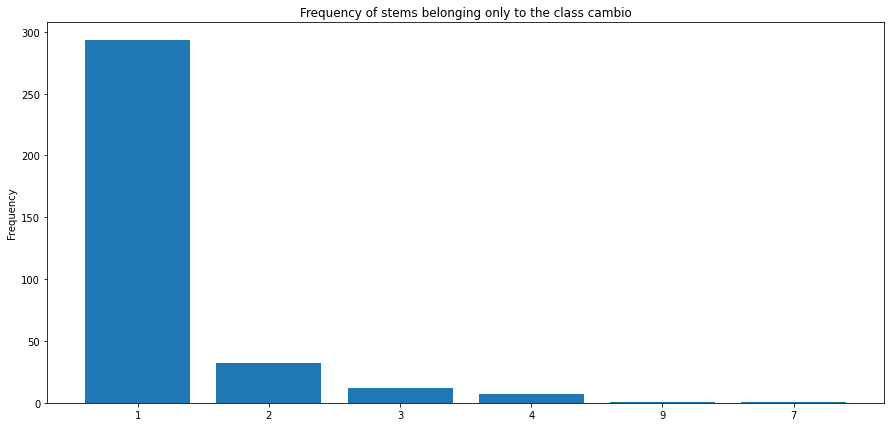

In [ ]:
vc = only_cambio.value_counts()

v = vc[:6].values
i = vc[:6].index

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(6), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Frequency of stems belonging only to the class cambio')
ax.set_xticks(np.arange(6))
ax.set_xticklabels(i)
plt.show()

### Wordcloud

In [ ]:
MAX_WORDS = 100
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1

plt.show()

wc_pos = WordCloud(
    # mask=MASK,
    max_words=MAX_WORDS, 
    background_color="darkblue",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="PuRd"
).generate_from_frequencies(count_word_app)

wc_neg = WordCloud(
    # mask=MASK[:, ::-1, :],
    max_words=MAX_WORDS,
    background_color="black",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="Wistia"
).generate_from_frequencies(count_word_cambio)
MAX_WORDS = 50
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1


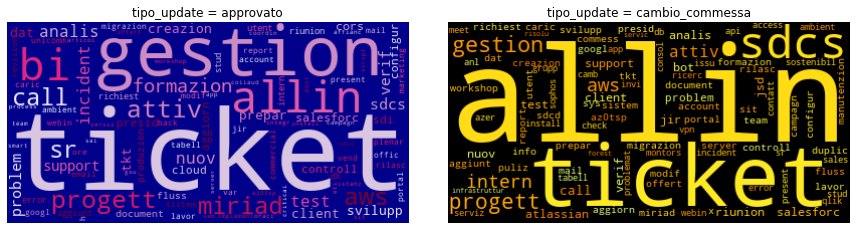

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('tipo_update = approvato')
plt.axis("off")

plt.subplot(122)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('tipo_update = cambio_commessa')
plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Some terms are very frequent for both classes, and this was predictable since allo refused rapportini have also a version accepted with the same text, but a different job_id.

## Analysis of cleaned - old

In [ ]:
desc_app = data.cleaned_workdesc[data.tipo_update == 'approvato']
app = []
for d in desc_app:
    app = app + d.split()
# [d.split() for d in desc_app]
app[:10]

In [ ]:
desc_cambio = data.cleaned_workdesc[data.tipo_update == 'cambio_commessa']
cambio = []
for d in desc_cambio:
    cambio = cambio + d.split()
# [d.split() for d in desc_app]
cambio[:10]

['prevend',
 'prim',
 'incontr',
 'approfond',
 'massim',
 'biag',
 'internetstores',
 'com',
 'ricerc',
 'soluzion']

In [ ]:
len(set(app))

8663

In [ ]:
len(set(cambio))

2405

In [ ]:
count_word_app = Counter(app)
count_word_cambio = Counter(cambio)

In [ ]:
# sorted(count_word_app.values(), reverse=True)
less_freq = dict(sorted(count_word_app.items(), key=lambda item: item[1], reverse=False))
less_freq

{'journeys': 1,
 'grading': 1,
 'riunioen': 1,
 'techd': 1,
 'wf11': 1,
 'nogarol': 1,
 'datacatalog': 1,
 'boardding': 1,
 'zeplin': 1,
 'vica01': 1,
 'vica02': 1,
 'vica03': 1,
 'vil01': 1,
 'vil02': 1,
 'preparzion': 1,
 'plant': 1,
 'std': 1,
 'wild': 1,
 'vac1': 1,
 'purchasing': 1,
 'auotm': 1,
 'calerndar': 1,
 'leads': 1,
 'fatur': 1,
 'osint': 1,
 'webint': 1,
 'infragrupp': 1,
 'rvecultur': 1,
 'maxmar': 1,
 'sonep': 1,
 't3a': 1,
 'riemission': 1,
 'smtcollector': 1,
 'talent4gig': 1,
 'bas01': 1,
 'bas02': 1,
 'basof1': 1,
 'basof2': 1,
 'basof3': 1,
 'sch05': 1,
 'riccolleg': 1,
 'desider': 1,
 'quotidian': 1,
 'dataflows': 1,
 'aprile⋅11': 1,
 '00pm': 1,
 '©': 1,
 'harmout': 1,
 'dominiofrechell': 1,
 'brendol': 1,
 'mosaic': 1,
 'fond': 1,
 'legittim': 1,
 'aggir': 1,
 'disclaimer': 1,
 'maant': 1,
 'gratu': 1,
 'libs': 1,
 'aod': 1,
 'strarodianr': 1,
 'openlookeng': 1,
 'biag': 1,
 'internetstores': 1,
 'upport': 1,
 'fonderiedimontors': 1,
 'tarquin': 1,
 'antoniett':

In [ ]:
# sorted(count_word_app.values(), reverse=True)
most_freq = dict(sorted(count_word_app.items(), key=lambda item: item[1], reverse=True))
most_freq

{'ticket': 3349,
 'gestion': 2164,
 'allin': 1823,
 'progett': 1607,
 'aws': 1596,
 'bi': 1561,
 'attiv': 1557,
 'miriad': 1551,
 'call': 1445,
 'sr': 1351,
 'formazion': 1100,
 'sdcs': 1040,
 'analis': 991,
 'test': 987,
 'nuov': 970,
 'incident': 901,
 'verif': 890,
 'support': 861,
 'problem': 852,
 'client': 771,
 'it': 743,
 'prepar': 733,
 'creazion': 731,
 'svilupp': 707,
 'dat': 704,
 'tkt': 701,
 'salesforc': 686,
 'cors': 634,
 'aggiorn': 623,
 'intern': 618,
 'controll': 608,
 'presid': 607,
 'configur': 603,
 'fluss': 582,
 'document': 569,
 'cloud': 563,
 'sdi': 554,
 'riunion': 549,
 'utent': 540,
 'produzion': 532,
 'stud': 493,
 'richiest': 493,
 'aggiunt': 479,
 'error': 474,
 'migrazion': 455,
 'rilasc': 419,
 'jir': 411,
 'present': 411,
 'modif': 411,
 'sistem': 408,
 'ambient': 407,
 'report': 398,
 'db': 390,
 'account': 387,
 'unicomm': 383,
 'googl': 381,
 'mail': 378,
 'lavor': 370,
 'commercial': 364,
 'plenar': 351,
 'webin': 351,
 'atlassian': 350,
 'marketi

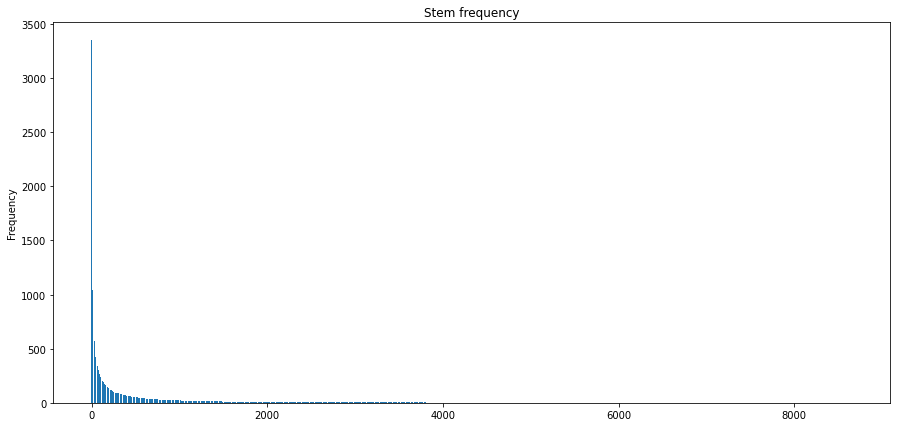

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(len(most_freq)), most_freq.values())
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
# ax.set_xticks(np.arange(len(most_freq)))
# ax.set_xticklabels(i)
plt.show()

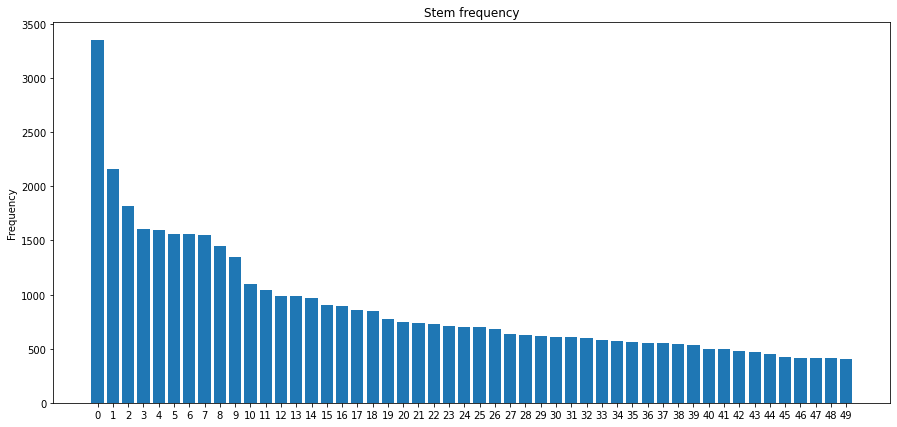

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(50), list(most_freq.values())[:50])
ax.set_ylabel('Frequency')
ax.set_title(f'Stem frequency')
ax.set_xticks(np.arange(50))
# ax.set_xticklabels(i)
plt.show()

In [ ]:
pd.Series(most_freq.values()).describe()

count    8663.000000
mean       16.884220
std        85.415849
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      3349.000000
dtype: float64

In [ ]:
# Compute 5 % of the number of documents
0.05 * len(data)

1234.15

In [ ]:
# 50 stems are present in more than 407 documents
list(most_freq.values())[50]

407

In [ ]:
# 100 stems are present in more than 243 documents
list(most_freq.values())[100]

243

In [ ]:
list(most_freq.values())[300]

89

In [ ]:
list(most_freq.values())[500]

52

In [ ]:
list(most_freq.values())[750]

31

In [ ]:
list(most_freq.values())[1000]

22

In [ ]:
s = pd.Series(count_word_app.values())
s

0        987
1       1557
2          1
3          3
4          4
        ... 
8658       2
8659       1
8660       1
8661       1
8662       1
Length: 8663, dtype: int64

In [ ]:
s.value_counts()

1       3567
2       1273
3        632
4        407
5        262
        ... 
987        1
771        1
731        1
707        1
1823       1
Length: 283, dtype: int64

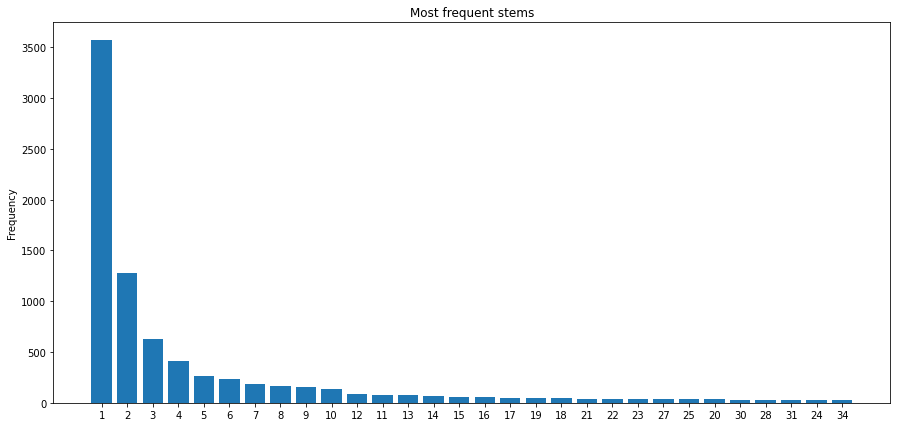

In [ ]:
vc = s.value_counts()

v = vc[:30].values
i = vc[:30].index

fig, ax = plt.subplots(figsize=(15,7))
ax.bar(range(30), v)
ax.set_ylabel('Frequency')
ax.set_title(f'Most frequent stems')
ax.set_xticks(np.arange(30))
ax.set_xticklabels(i)
plt.show()

There are 3567 terms that are present in only 1 document

There are 1273 terms that are present in only 2 documents...

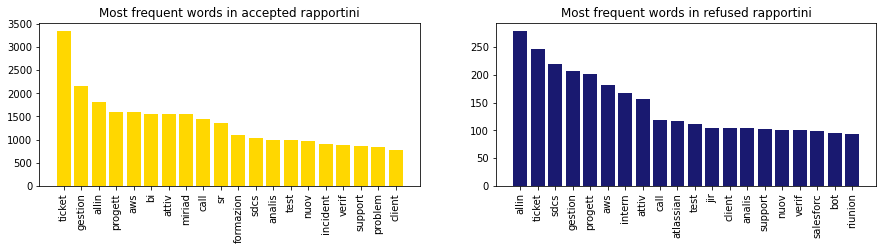

In [ ]:
N = 20

plt.figure(figsize=(15, 3))

plt.subplot(121)
plt.title("Most frequent words in accepted rapportini".format(N))
plt.bar(*zip(*count_word_app.most_common(N)), color="gold")
plt.xticks(rotation="vertical")

plt.subplot(122)
plt.title("Most frequent words in refused rapportini".format(N))
plt.bar(*zip(*count_word_cambio.most_common(N)), color="midnightblue")
plt.xticks(rotation="vertical")

plt.show()

In [ ]:
MAX_WORDS = 100
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1

plt.show()

wc_pos = WordCloud(
    # mask=MASK,
    max_words=MAX_WORDS, 
    background_color="darkblue",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="PuRd"
).generate_from_frequencies(count_word_app)

wc_neg = WordCloud(
    # mask=MASK[:, ::-1, :],
    max_words=MAX_WORDS,
    background_color="black",
    max_font_size=MAX_FONT_SIZE,
    relative_scaling=RELATIVE_SCALING,
    colormap="Wistia"
).generate_from_frequencies(count_word_cambio)
MAX_WORDS = 50
MAX_FONT_SIZE = 200
RELATIVE_SCALING = 1


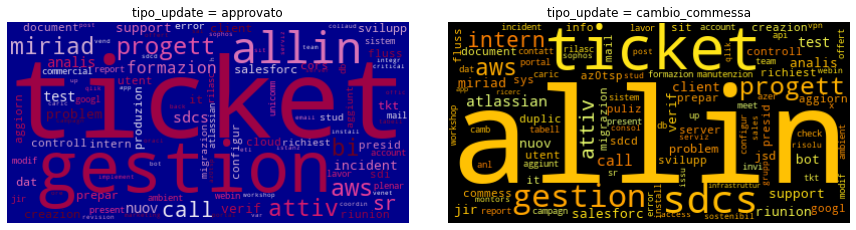

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('tipo_update = approvato')
plt.axis("off")

plt.subplot(122)
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('tipo_update = cambio_commessa')
plt.axis("off")

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0)
plt.show()

Some terms are very frequent for both classes 

## BOW

### CountVectorizer

In [ ]:
def count_vectorizer(data, max_features=None, n_min=1, n_max=1, min_df=1, max_df=1.0):
    cv = CountVectorizer(
        # lowercase = True, 
        #  stop_words = 'english', 
         ngram_range = (n_min, n_max),     # (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,1) only bigrams
         min_df = min_df, # example: 0.01 -> eliminazione delle parole minori 1%
         max_df = max_df,
         max_features = max_features
        #  tokenizer = token.tokenize
        )

    text_counts = cv.fit_transform(data['cleaned_workdesc'])
    return text_counts

In [ ]:
# prova
datap = data.copy()
datap

,workdesc,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,cleaned_workdesc
0,Test e attivazione Journeys ATO UK ed ATO US.\...,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato,test attiv journeys ato uk ato us analis metri...
1,Call con team IT del cliente per fix problemat...,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato,call team it client fix problemat tracker domain
2,Analisi problematica configurazione Pardot Tra...,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato,analis problemat configur pardot tracker domai...
3,Analisi problematiche di configurazione DNS ev...,3273,22859,1455,BI,21250,0.5,6.0,274,0,0,1,0,0,approvato,analis problemat configur dns evidenz client
4,UNIFARCO JIRA SERVICE MANAGEMENT,3080,22479,322,DBA,4187,1.5,6.0,282,0,0,0,0,0,approvato,unifarc jir servic management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24678,documentazione flussi kettle,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa,document fluss kettl
24679,documentazione flussi kettle,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa,document fluss kettl
24680,Documentazione flusso kettle,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa,document fluss kettl
24681,Upgrade Server QlikVIew\nInstallazione compone...,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa,upgrad server qlikview install component python


In [ ]:
cv = CountVectorizer(
    max_features = 500
    # lowercase = True, 
    #  stop_words = 'english', 
    #  ngram_range = (1,1),     # unigrams, we can change it
    #  tokenizer = token.tokenize
    )

text_counts = cv.fit_transform(datap['cleaned_workdesc'])
text_counts

<24683x500 sparse matrix of type '<class 'numpy.int64'>'
	with 96977 stored elements in Compressed Sparse Row format>

In [ ]:
# # If I need to convert it into a dense matrix:
# text_counts_dense = text_counts.todense()
# text_counts_dense

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

The matrix obtained this way is very high dimensional.

### TF-IDF 

In [ ]:
def tfidf(data, max_features = None, n_min=1, n_max=1, min_df=1, max_df=1.0):
    tf = TfidfVectorizer(
        # lowercase = True, 
        #  stop_words = 'english', 
         ngram_range = (n_min, n_max),     # (1,1) means only unigrams, (1,2) means unigrams and bigrams, (1,1) only bigrams
         min_df = min_df, # example: 0.01 -> eliminazione delle parole minori 1%
         max_df = max_df,
         max_features = max_features 
        #  tokenizer = token.tokenize
        )
    
    text_tf = tf.fit_transform(data['cleaned_workdesc'])

    return text_tf

In [ ]:
tf = TfidfVectorizer(
    max_features = 500
)

text_tf = tf.fit_transform(datap['cleaned_workdesc'])
text_tf

<24683x500 sparse matrix of type '<class 'numpy.float64'>'
	with 96977 stored elements in Compressed Sparse Row format>

## Hande categorical variables

In [ ]:
data = pd.read_csv(datapath + 'dataset/data7.csv')
data[['jobid','jobtaskid', 'resid', 'custid', 'sede']] = data[['jobid','jobtaskid', 'resid', 'custid', 'sede']].astype(str)
data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']] = data[['flg_trasferta','pay', 'flg_prepagato', 'flg_straordinario']].astype(int)
data = data.drop(['workdesc'], inplace=False, axis=1)
data

,jobid,jobtaskid,resid,area,custid,qty,sede,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,cleaned_workdesc
0,98,268,339,SISTEMISTI,4187,5.5,2.0,284,1,0,0,0,0,cambio_commessa,sophos aulss7
1,98,268,339,SISTEMISTI,4187,6.0,6.0,283,2,0,0,0,0,cambio_commessa,sophos aulss7
2,3273,22859,1455,BI,21250,1.5,6.0,282,0,0,1,0,0,approvato,test attiv journeys ato uk ato us analis metri...
3,3273,22859,1455,BI,21250,0.5,6.0,281,0,0,1,0,0,approvato,call team client fix problemat tracker domain
4,3273,22859,1455,BI,21250,0.5,6.0,279,0,0,1,0,0,approvato,analis problemat configur pardot tracker domai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,305,797,1424,BI,4212,1.5,6.0,77,0,0,1,0,0,cambio_commessa,document fluss kettl
22581,305,797,1424,BI,4212,4.0,6.0,72,3,0,1,0,0,cambio_commessa,document fluss kettl
22582,305,797,1424,BI,4212,8.0,6.0,69,2,0,1,0,0,cambio_commessa,document fluss kettl
22583,305,797,1391,BI,4212,8.0,6.0,71,0,0,1,0,0,cambio_commessa,upgrad server qlikview install component python


In [ ]:
 data.columns

Index(['jobid', 'jobtaskid', 'resid', 'area', 'custid', 'qty', 'sede', 'day',
       'delay', 'flg_trasferta', 'pay', 'flg_prepagato', 'flg_straordinario',
       'tipo_update', 'cleaned_workdesc'],
      dtype='object')

### One-hot encoding

In order to handle categorical variables, a common strategy is to use one-hot encoding. NB: this is not the only possibility, and sometimes, other strategies could be better 

In [ ]:
categorical_features = [col for col in data.columns if not is_numeric_dtype(data[col]) and col != 'tipo_update' and col != 'cleaned_workdesc']
categorical_features

['jobid', 'jobtaskid', 'resid', 'area', 'custid', 'sede']

In [ ]:
# In pandas we can achieve easily one-hot encoding using the 'get_dummies()' function
categorical_features = [col for col in data.columns if not is_numeric_dtype(data[col]) and col != 'tipo_update' and col != 'workdesc' and col != 'cleaned_workdesc']
data_with_dummies = pd.get_dummies(data, columns = categorical_features)
data_with_dummies.head()

# here we don't remove one of the new boolean colun for each categorical variable...
# if we will find some problems, we will do it

,qty,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,tipo_update,cleaned_workdesc,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,...,custid_4317,custid_4326,custid_4340,custid_4343,custid_4361,custid_4370,custid_4375,custid_4379,custid_4391,custid_44,custid_4404,custid_4410,custid_4414,custid_4415,custid_4429,custid_4430,custid_4435,custid_4439,custid_4447,custid_4449,custid_4453,custid_4461,custid_4466,custid_4469,custid_4475,custid_4480,custid_4484,custid_48,custid_59,custid_62,custid_9,sede_1.0,sede_2.0,sede_3.0,sede_4.0,sede_5.0,sede_6.0,sede_7.0,sede_8.0,sede_9.0
0,5.5,284,1,0,0,0,0,cambio_commessa,sophos aulss7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6.0,283,2,0,0,0,0,cambio_commessa,sophos aulss7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1.5,282,0,0,1,0,0,approvato,test attiv journeys ato uk ato us analis metri...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.5,281,0,0,1,0,0,approvato,call team client fix problemat tracker domain,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.5,279,0,0,1,0,0,approvato,analis problemat configur pardot tracker domai...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Just as a convention, I prefer to place the column to be predicted as the last one.
columns = data_with_dummies.columns.tolist()

# Popping out 'tipo_update' from the list and insert it back at the end.
columns.insert(len(columns), columns.pop(columns.index('cleaned_workdesc')))
columns.insert(len(columns), columns.pop(columns.index('tipo_update')))

# columns.pop(columns.index('workdesc'))
# columns.pop(columns.index('cleaned_workdesc'))

# Let's refactor the DataFrame using this new column index
data_with_dummies = data_with_dummies.loc[:, columns]
data_with_dummies#.head()

,qty,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,jobid_2580,jobid_2598,...,custid_4340,custid_4343,custid_4361,custid_4370,custid_4375,custid_4379,custid_4391,custid_44,custid_4404,custid_4410,custid_4414,custid_4415,custid_4429,custid_4430,custid_4435,custid_4439,custid_4447,custid_4449,custid_4453,custid_4461,custid_4466,custid_4469,custid_4475,custid_4480,custid_4484,custid_48,custid_59,custid_62,custid_9,sede_1.0,sede_2.0,sede_3.0,sede_4.0,sede_5.0,sede_6.0,sede_7.0,sede_8.0,sede_9.0,cleaned_workdesc,tipo_update
0,5.5,284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,sophos aulss7,cambio_commessa
1,6.0,283,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,sophos aulss7,cambio_commessa
2,1.5,282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,test attiv journeys ato uk ato us analis metri...,approvato
3,0.5,281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,call team client fix problemat tracker domain,approvato
4,0.5,279,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,analis problemat configur pardot tracker domai...,approvato
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22580,1.5,77,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,document fluss kettl,cambio_commessa
22581,4.0,72,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,document fluss kettl,cambio_commessa
22582,8.0,69,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,document fluss kettl,cambio_commessa
22583,8.0,71,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,upgrad server qlikview install component python,cambio_commessa


## Encoding Label

In [ ]:
y_labels = ['cambio_commessa', 'approvato']

In [ ]:
# One-hot encoding option
data_with_dummies.tipo_update = data_with_dummies.tipo_update.map(lambda x: 0 if x=='approvato' else 1)
data_with_dummies.head()

,qty,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,jobid_2580,jobid_2598,...,custid_4340,custid_4343,custid_4361,custid_4370,custid_4375,custid_4379,custid_4391,custid_44,custid_4404,custid_4410,custid_4414,custid_4415,custid_4429,custid_4430,custid_4435,custid_4439,custid_4447,custid_4449,custid_4453,custid_4461,custid_4466,custid_4469,custid_4475,custid_4480,custid_4484,custid_48,custid_59,custid_62,custid_9,sede_1.0,sede_2.0,sede_3.0,sede_4.0,sede_5.0,sede_6.0,sede_7.0,sede_8.0,sede_9.0,cleaned_workdesc,tipo_update
0,5.5,284,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,sophos aulss7,1
1,6.0,283,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,sophos aulss7,1
2,1.5,282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,test attiv journeys ato uk ato us analis metri...,0
3,0.5,281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,call team client fix problemat tracker domain,0
4,0.5,279,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,analis problemat configur pardot tracker domai...,0


In [ ]:
data_with_dummies.to_csv(datapath + 'dataset/data8.csv', index=False)

## Save X and y

In [ ]:
# Feature matrix X is composed of all the columns except 'tipo_update' (i.e., the target class label)
X = data_with_dummies.iloc[:, :-1]
X.head()

,qty,day,delay,flg_trasferta,pay,flg_prepagato,flg_straordinario,jobid_100,jobid_107,jobid_110,jobid_118,jobid_119,jobid_123,jobid_125,jobid_126,jobid_135,jobid_157,jobid_158,jobid_173,jobid_174,jobid_175,jobid_177,jobid_178,jobid_179,jobid_187,jobid_203,jobid_209,jobid_210,jobid_227,jobid_231,jobid_2457,jobid_2488,jobid_2509,jobid_2516,jobid_2528,jobid_2534,jobid_2538,jobid_2579,jobid_2580,jobid_2598,...,custid_4317,custid_4326,custid_4340,custid_4343,custid_4361,custid_4370,custid_4375,custid_4379,custid_4391,custid_44,custid_4404,custid_4410,custid_4414,custid_4415,custid_4429,custid_4430,custid_4435,custid_4439,custid_4447,custid_4449,custid_4453,custid_4461,custid_4466,custid_4469,custid_4475,custid_4480,custid_4484,custid_48,custid_59,custid_62,custid_9,sede_1.0,sede_2.0,sede_3.0,sede_4.0,sede_5.0,sede_6.0,sede_7.0,sede_8.0,sede_9.0
0,1.5,282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.5,281,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.5,279,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.5,274,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1.5,282,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
X_np = np.array(X)
X_np

array([[  1.5, 282. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0.5, 281. ,   0. , ...,   0. ,   0. ,   0. ],
       [  0.5, 279. ,   0. , ...,   0. ,   0. ,   0. ],
       ...,
       [  8. ,  69. ,   2. , ...,   0. ,   0. ,   0. ],
       [  8. ,  71. ,   0. , ...,   0. ,   0. ,   0. ],
       [  1. ,  68. ,   2. , ...,   0. ,   0. ,   0. ]])

In [ ]:
X_np.shape

(24683, 1264)

In [ ]:
 X_s = sparse.csr_matrix(X_np, dtype='int64')
 X_s

<24683x1264 sparse matrix of type '<class 'numpy.longlong'>'
	with 223847 stored elements in Compressed Sparse Row format>

In [ ]:
# Similarly, we want to extract the target class column vector y
y = data_with_dummies.tipo_update
y.head()

0    0
1    0
2    0
3    0
4    0
Name: tipo_update, dtype: int64

## Splitting the Dataset

Let's split our dataset with scikit-learn 'train_test_split' function.
We want the training set to account for 60% of the original dataset, whilst the validation and test set to account for 20% each.
Additionally, we would like to take advantage of stratified sampling,
so as to obtain the same target distribution in all sets.


In [ ]:
def prepare_dataset(X_s, vectorized):
    # Combine BOW variables
    X_sparse = hstack((X_s, vectorized))
    # Divide the dataset into training, validation and test sets
    X_train, X_vt, y_train, y_vt = train_test_split(X_sparse, y, test_size=0.4, random_state=1, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, test_size=0.5, random_state=1, stratify=y_vt)
    X_train_val = vstack((X_train, X_val))
    y_train_val = hstack((y_train, y_val))
    print("Training Set shape: {}".format(X_train.shape))
    print("Validation Set shape: {}".format(X_val.shape))
    print("Test Set shape: {}".format(X_test.shape))
    return X_train, y_train, X_val, X_test, y_val, y_test, X_train_val, y_train_val

In [ ]:
X_train, y_train, X_val, X_test, y_val, y_test, X_train_val, y_train_val = prepare_dataset(X_s, text_counts)

Training Set shape: (14809, 1764)
Validation Set shape: (4937, 1764)
Test Set shape: (4937, 1764)


In [ ]:
classes, class_count = np.unique(y_train, return_counts=True)
classesv, class_countv = np.unique(y_val, return_counts=True)
classest, class_countt = np.unique(y_test, return_counts=True)
pd.DataFrame((classes, class_count, class_countv, class_countt), columns=['approvato', 'cambio_commessa'], index=['Label', 'Trainining', 'Validation', 'Test'])

,approvato,cambio_commessa
Label,0,1
Trainining,13541,1268
Validation,4514,423
Test,4514,423


In [ ]:
4514/(4514+423)

0.9143204375126595

The dataset is highly unbalanced. For the moment, I do not take any specific counter-measure (under-sampling, over-sampling, ...), but I simply considers different metrics for the model evaluation.